In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

In [3]:
churn = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [61]:
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [62]:
churn = churn.drop(['customerID'], axis=1)

In [66]:
churn1 = churn.drop_duplicates()
churn1

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7021 rows x 20 columns]

# # Data Analysis

In [67]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


# Number of male and females

In [68]:
churn1['gender'].value_counts()

Male      3541
Female    3480
Name: gender, dtype: int64

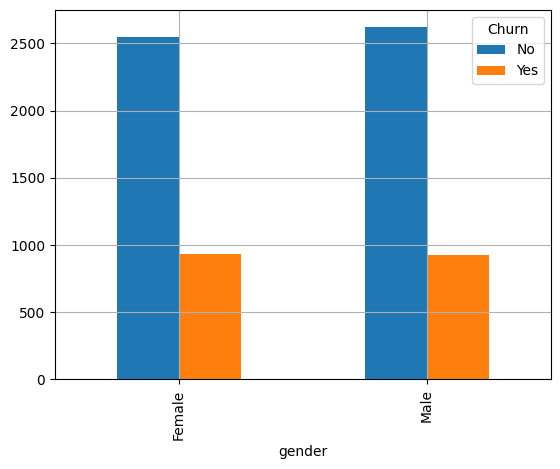

In [69]:
pd.crosstab(churn1['gender'], churn1['Churn']).plot(kind='bar')
plt.grid(True)

In [70]:
pd.crosstab(churn1['gender'], churn1['Churn']) 

Churn     No  Yes
gender           
Female  2546  934
Male    2618  923

# # Dependents

In [71]:
churn1['Dependents'].value_counts()

No     4911
Yes    2110
Name: Dependents, dtype: int64

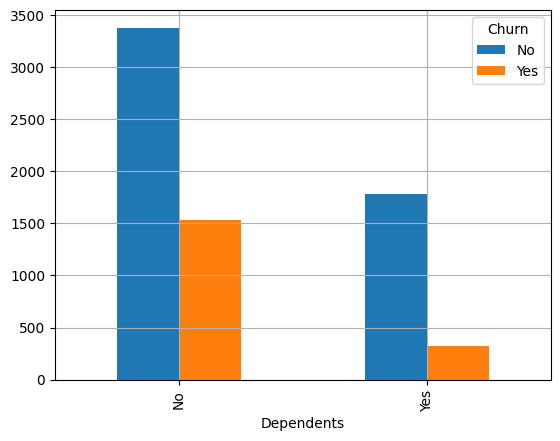

In [72]:
pd.crosstab(churn1['Dependents'], churn1['Churn']).plot(kind='bar')
plt.grid(True)

In [74]:
pd.crosstab(churn1['Dependents'], churn1['Churn'])


Churn         No   Yes
Dependents            
No          3380  1531
Yes         1784   326

# # Phone Service

In [75]:
churn1['PhoneService'].value_counts()

Yes    6339
No      682
Name: PhoneService, dtype: int64

<Axes: ylabel='PhoneService'>

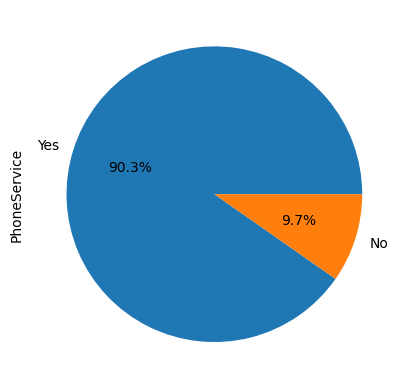

In [76]:
churn1['PhoneService'].value_counts().plot(kind='pie', autopct='%1.1f%%')

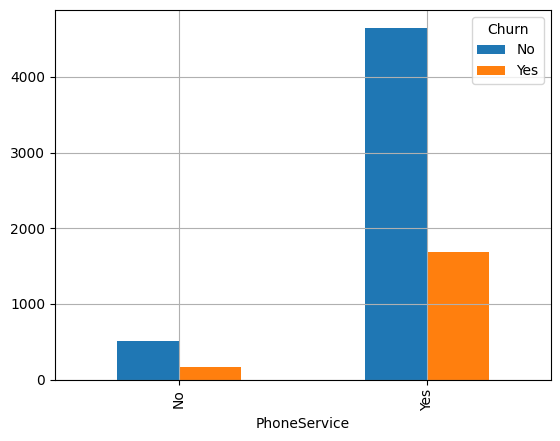

In [77]:
pd.crosstab(churn1['PhoneService'], churn1['Churn']).plot(kind='bar')
plt.grid(True)

In [78]:
pd.crosstab(churn1['PhoneService'], churn1['Churn'])

Churn           No   Yes
PhoneService            
No             512   170
Yes           4652  1687

# # Multiple Lines

In [79]:
churn1['MultipleLines'].value_counts()

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<Axes: ylabel='MultipleLines'>

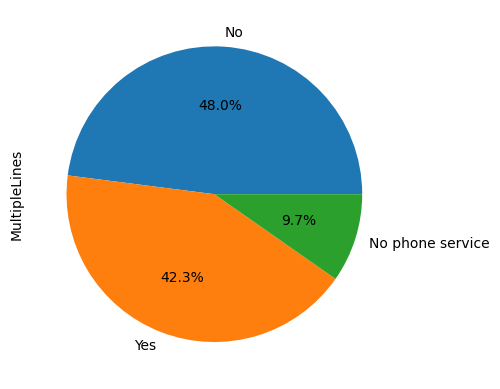

In [80]:
churn1['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='MultipleLines'>

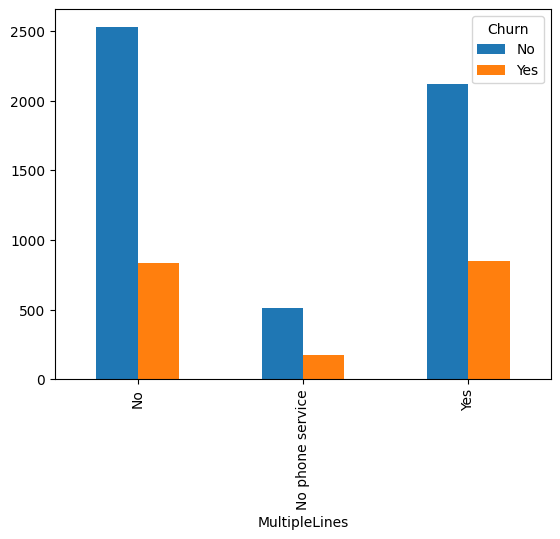

In [83]:
pd.crosstab(churn1['MultipleLines'], churn1['Churn']).plot(kind='bar')

#  # InternetService 

In [87]:
churn1['InternetService'].value_counts()

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64

<Axes: ylabel='InternetService'>

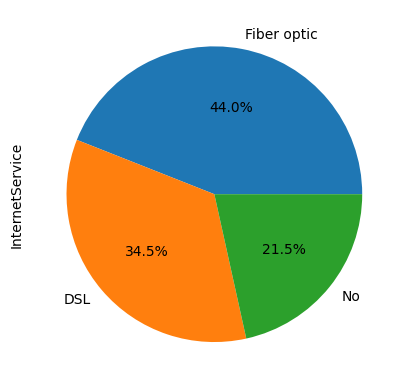

In [88]:
churn1['InternetService'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [89]:
pd.crosstab(churn1['InternetService'], churn1['Churn'])

Churn              No   Yes
InternetService            
DSL              1962   457
Fiber optic      1799  1291
No               1403   109

array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

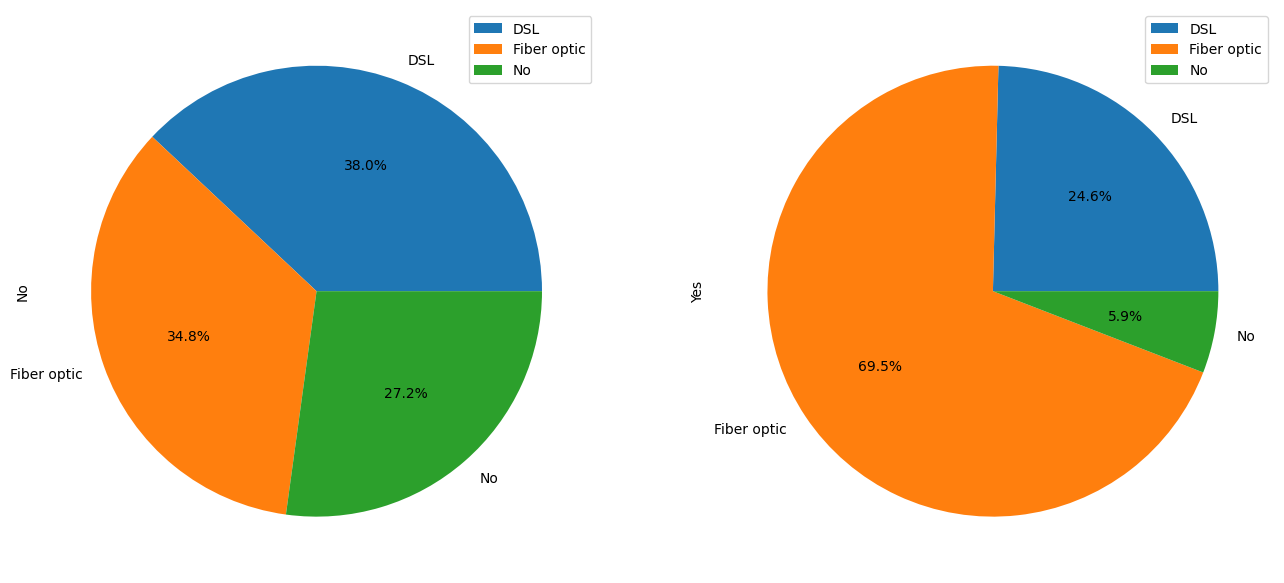

In [90]:
pd.crosstab(churn1['InternetService'], churn1['Churn']).plot(kind='pie', subplots=True, autopct = '%1.1f%%', figsize=(16,12))

# # OnlineSecurity

array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

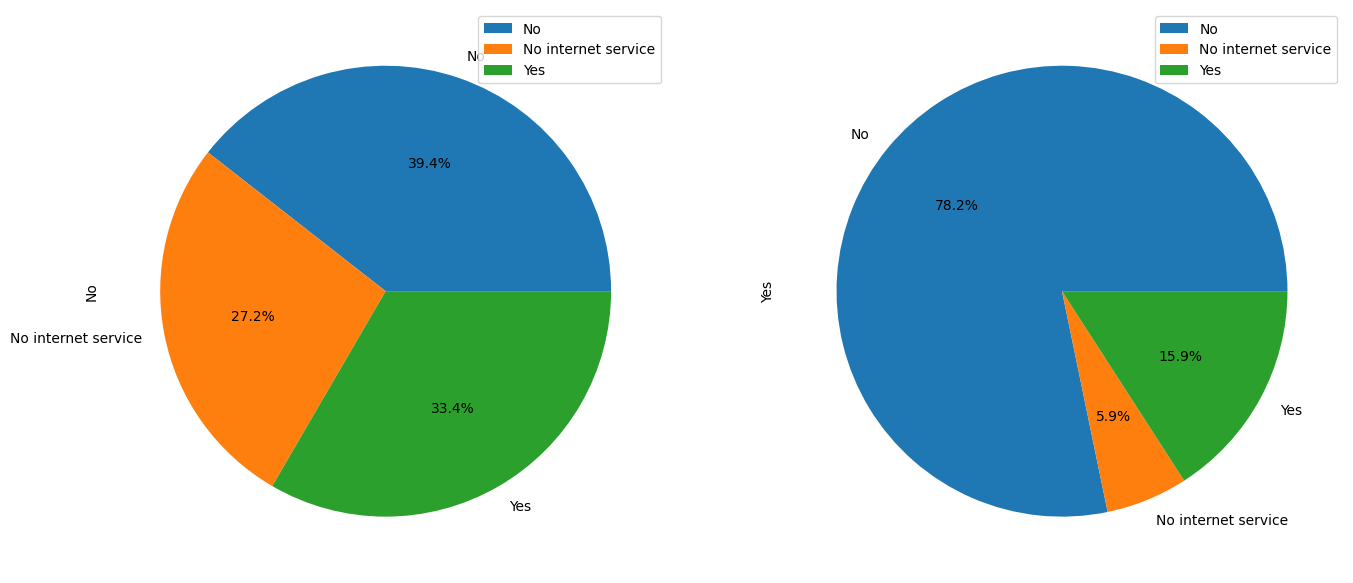

In [91]:
pd.crosstab(churn1['OnlineSecurity'], churn1['Churn']).plot(kind='pie', subplots=True, autopct = '%1.1f%%', figsize=(16,12))

# Online Backup and Churn

In [93]:
pd.crosstab(churn1['OnlineBackup'], churn1['Churn'])

Churn                  No   Yes
OnlineBackup                   
No                   1855  1225
No internet service  1403   109
Yes                  1906   523

array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

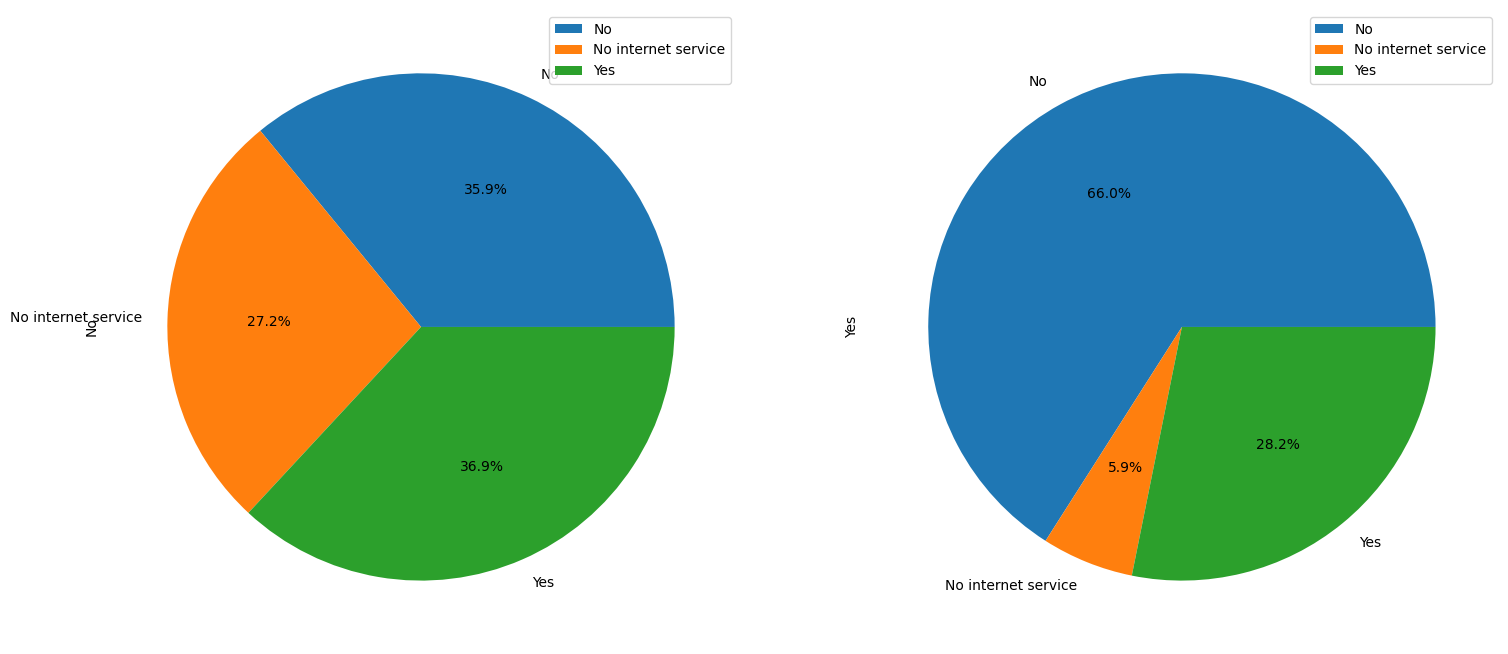

In [94]:
pd.crosstab(churn1['OnlineBackup'], churn1['Churn']).plot(kind='pie', subplots=True, autopct = '%1.1f%%', figsize=(18,14))

# # Contract

In [100]:
pd.crosstab(churn1['Contract'], churn1['Churn']) / len(churn1)*100

Churn                  No        Yes
Contract                            
Month-to-month  31.476998  23.401225
One year        18.615582   2.364336
Two year        23.458197   0.683663

<Axes: >

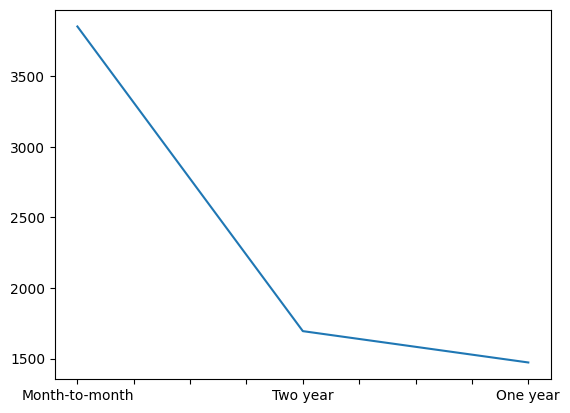

In [98]:
churn1['Contract'].value_counts().plot()

# # DeviceProtection

In [101]:
churn1['DeviceProtection'].value_counts()

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64

<Axes: ylabel='DeviceProtection'>

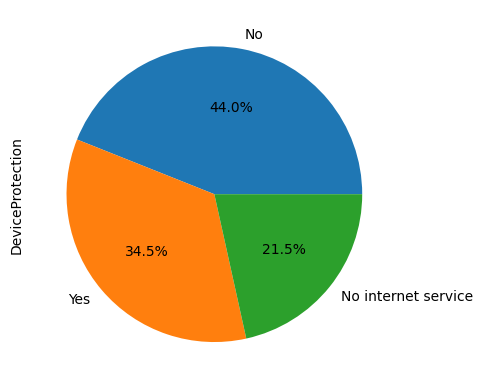

In [102]:
churn1['DeviceProtection'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [104]:
pd.crosstab(churn1['DeviceProtection'], churn1['Churn'])

Churn                  No   Yes
DeviceProtection               
No                   1884  1203
No internet service  1403   109
Yes                  1877   545

# # TechSupport

In [105]:
churn1['TechSupport'].value_counts()

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64

<Axes: ylabel='TechSupport'>

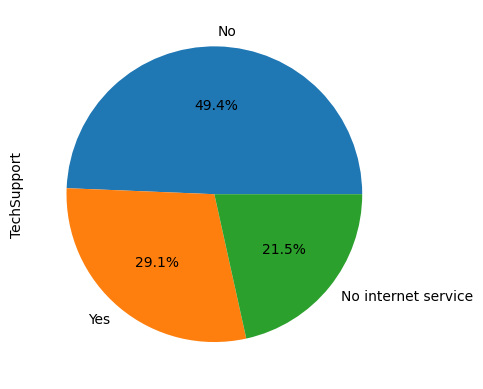

In [106]:
churn1['TechSupport'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [107]:
pd.crosstab(churn1['TechSupport'], churn1['Churn'])

Churn                  No   Yes
TechSupport                    
No                   2027  1438
No internet service  1403   109
Yes                  1734   310

# # StreamingTV

In [108]:
churn1['StreamingTV'].value_counts()

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64

<Axes: ylabel='StreamingTV'>

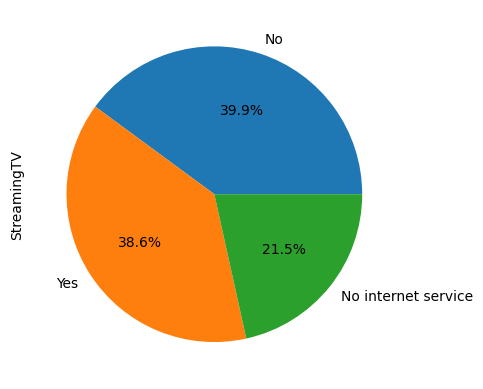

In [109]:
churn1['StreamingTV'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [110]:
pd.crosstab(churn1['StreamingTV'], churn1['Churn'])

Churn                  No  Yes
StreamingTV                   
No                   1868  934
No internet service  1403  109
Yes                  1893  814

# # StreamingMovies

In [111]:
churn1['StreamingMovies'].value_counts()

No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64

<Axes: ylabel='StreamingMovies'>

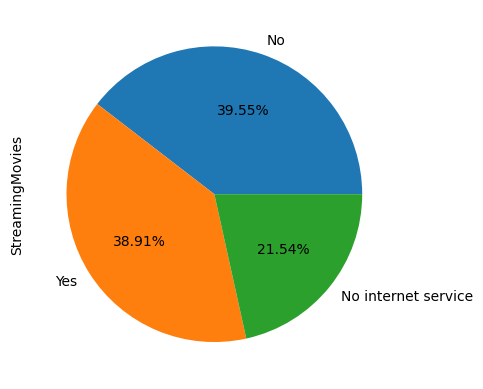

In [112]:
churn1['StreamingMovies'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [113]:
pd.crosstab(churn1['StreamingMovies'], churn1['Churn'])

Churn                  No  Yes
StreamingMovies               
No                   1847  930
No internet service  1403  109
Yes                  1914  818

# # Paperless Billing vs churn rate

In [114]:
pd.crosstab(churn1['PaperlessBilling'], churn1['Churn'])

Churn               No   Yes
PaperlessBilling            
No                2394   466
Yes               2770  1391

array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

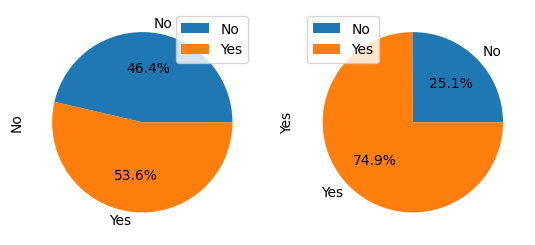

In [115]:
pd.crosstab(churn1['PaperlessBilling'], churn1['Churn']).plot(kind='pie', subplots=True, autopct = '%4.1f%%')

# PaymentMethod vs Churn

In [116]:
pd.crosstab(churn1['PaymentMethod'], churn1['Churn'])

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1065
Mailed check               1294   302

array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

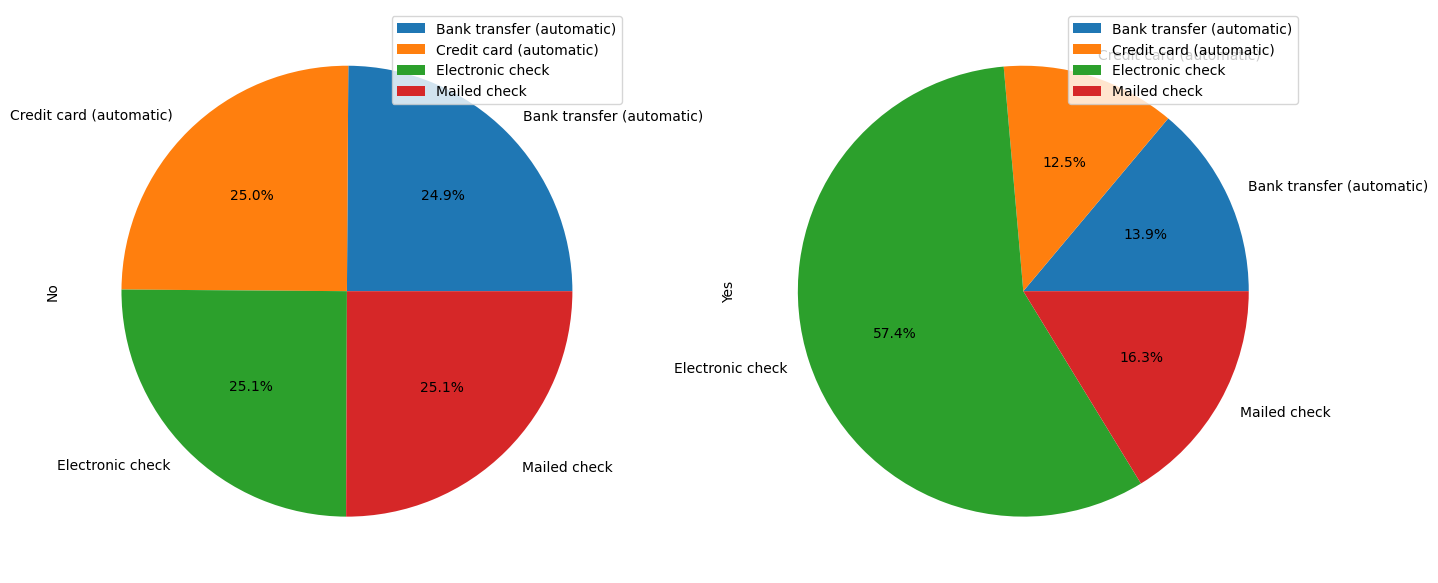

In [117]:
cross_tab = pd.crosstab(churn1['PaymentMethod'], churn1['Churn']).plot(kind='pie', subplots=True, autopct='%2.1f%%', figsize=(16,12))
cross_tab

# Univariate analysis

# Gender

<Axes: xlabel='gender', ylabel='count'>

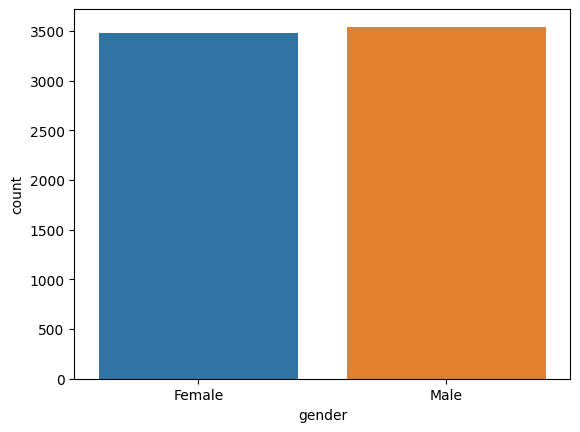

In [118]:
sns.countplot(data=churn1, x='gender')

# SeniorCitizen

<Axes: xlabel='SeniorCitizen', ylabel='count'>

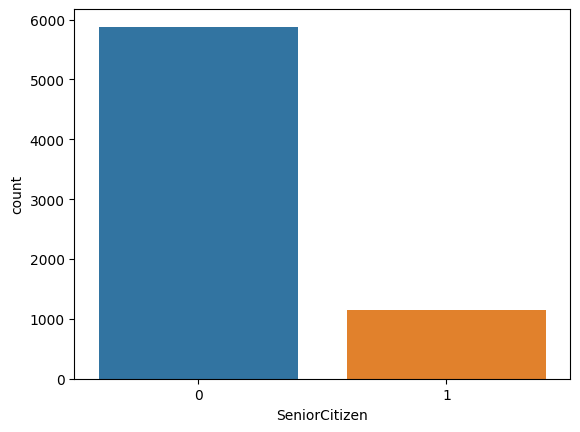

In [119]:
sns.countplot(data=churn1, x='SeniorCitizen')

# DeviceProtection

<Axes: xlabel='DeviceProtection', ylabel='count'>

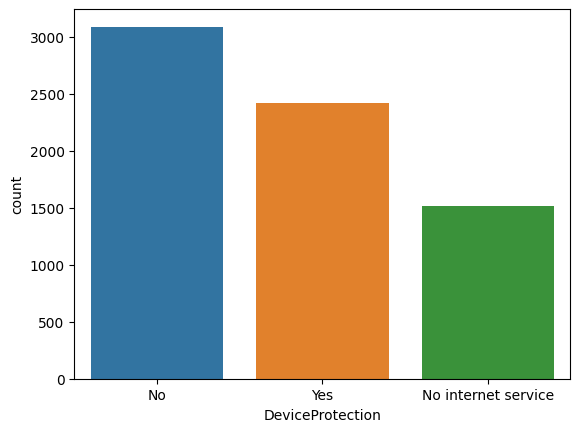

In [121]:
sns.countplot(data=churn1, x='DeviceProtection')

# InternetService

<Axes: xlabel='InternetService', ylabel='count'>

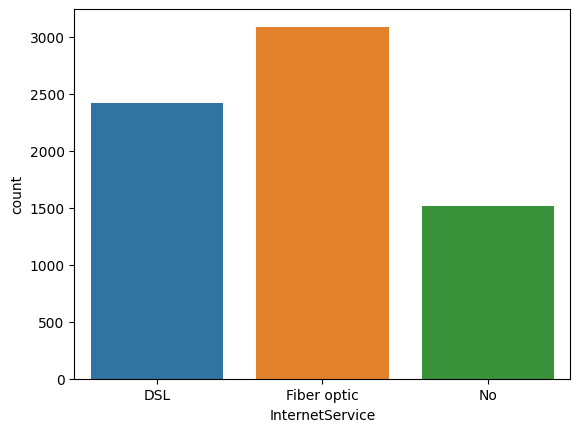

In [122]:
sns.countplot(data=churn1, x='InternetService')

# Contract

<Axes: xlabel='Contract', ylabel='count'>

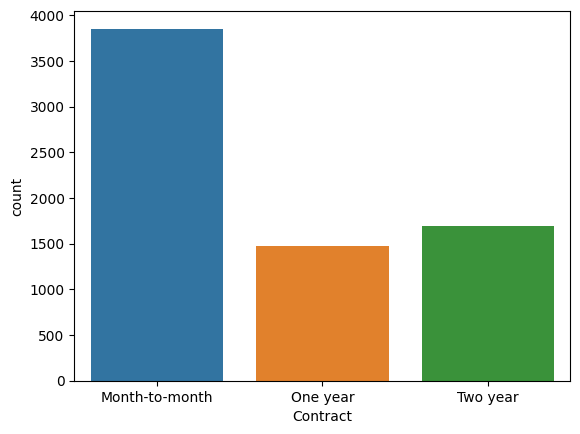

In [124]:
sns.countplot(data=churn1, x='Contract')

# MonthlyCharges

Text(0.5, 0, 'MonthlyCharges')

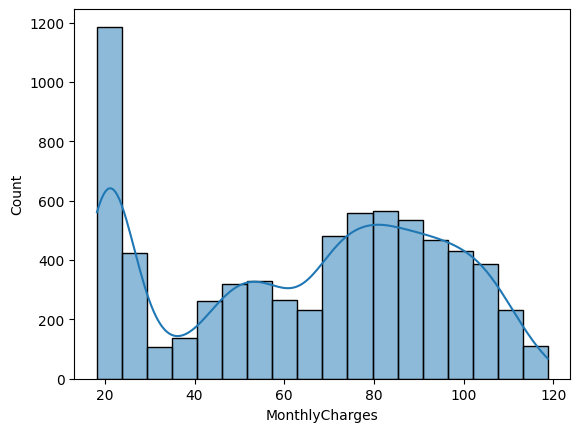

In [120]:
sns.histplot(data=churn1, x='MonthlyCharges', kde=True)
plt.xlabel('MonthlyCharges')

# StreamingTV

<Axes: xlabel='StreamingTV', ylabel='Count'>

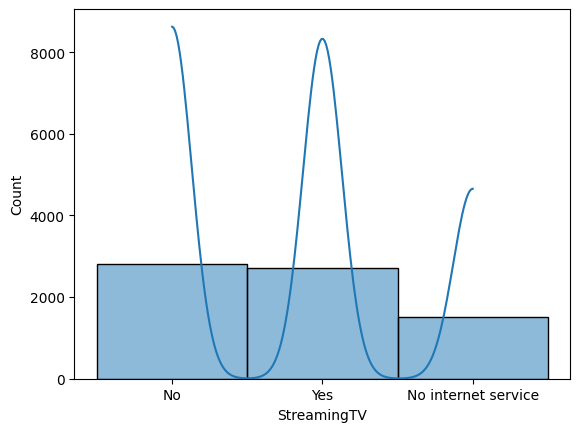

In [123]:
sns.histplot(data=churn1, x='StreamingTV', kde=True)

In [250]:
churn1['StreamingTV'].value_counts()

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64

# Multivariate Analysis

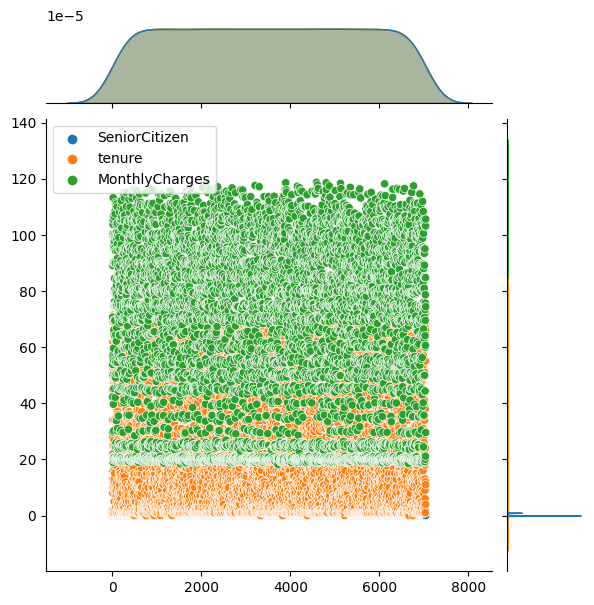

In [254]:
sns.jointplot(data=churn1)

# as you can see tensure and montly_charges data point is overlapping 

C:\Users\ravin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1444: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  group.join(ax, diag_axes[0])


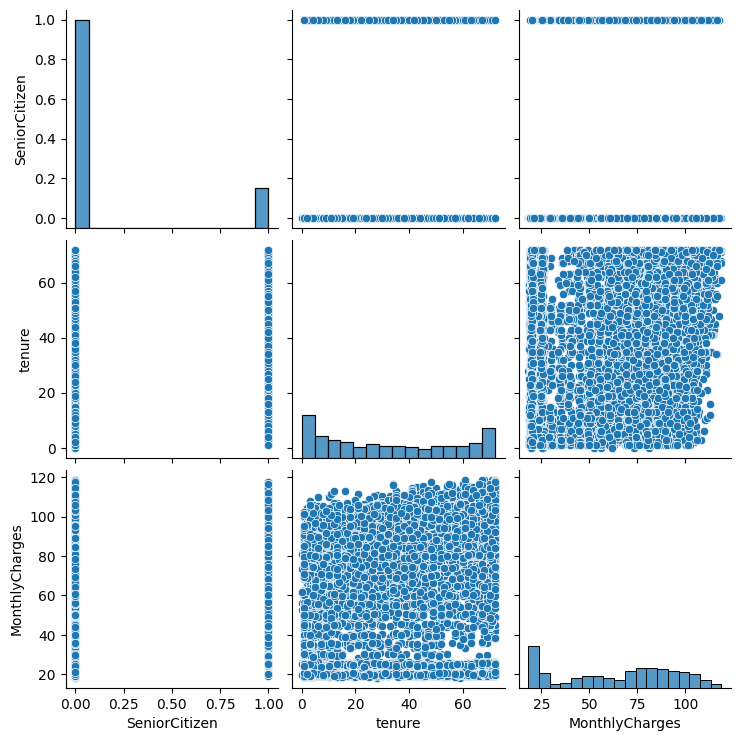

In [259]:
g = sns.pairplot(data=churn1)
g

# Data Preparation

In [125]:
cate = [i for i in churn1.columns if churn1[i].dtype =='object']
categorical = churn1[cate]

In [126]:
categorical.head(10)

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   
5  Female      No         No          Yes               Yes     Fiber optic   
6    Male      No        Yes          Yes               Yes     Fiber optic   
7  Female      No         No           No  No phone service             DSL   
8  Female     Yes         No          Yes               Yes     Fiber optic   
9    Male      No        Yes          Yes                No             DSL   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   
5             No           No              Yes          No         Yes   
6             No          Yes               No          No         Yes   
7            Yes           No               No          No          No   
8             No           No              Yes         Yes         Yes   
9            Yes          Yes               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   
5             Yes  Month-to-month              Yes           Electronic check   
6              No  Month-to-month              Yes    Credit card (automatic)   
7              No  Month-to-month               No               Mailed check   
8             Yes  Month-to-month              Yes           Electronic check   
9              No        One year               No  Bank transfer (automatic)   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes  
5        820.5   Yes  
6       1949.4    No  
7        301.9    No  
8      3046.05   Yes  
9      3487.95    No

In [127]:
num = [i for i in churn1.columns if churn1[i].dtype !='object']
numerical = churn1[num]
numerical

SeniorCitizen  tenure  MonthlyCharges
0                 0       1           29.85
1                 0      34           56.95
2                 0       2           53.85
3                 0      45           42.30
4                 0       2           70.70
...             ...     ...             ...
7038              0      24           84.80
7039              0      72          103.20
7040              0      11           29.60
7041              1       4           74.40
7042              0      66          105.65

[7021 rows x 3 columns]

# Encoding 

In [128]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [129]:
columns = ['Dependents','gender','Partner','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

ohes = categorical[columns]

In [130]:
ohes

Dependents  gender Partner PhoneService OnlineSecurity OnlineBackup  \
0            No  Female     Yes           No             No          Yes   
1            No    Male      No          Yes            Yes           No   
2            No    Male      No          Yes            Yes          Yes   
3            No    Male      No           No            Yes           No   
4            No  Female      No          Yes             No           No   
...         ...     ...     ...          ...            ...          ...   
7038        Yes    Male     Yes          Yes            Yes           No   
7039        Yes  Female     Yes          Yes             No          Yes   
7040        Yes  Female     Yes           No            Yes           No   
7041         No    Male     Yes          Yes             No           No   
7042         No    Male      No          Yes            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies PaperlessBilling  
0                  No          No          No              No              Yes  
1                 Yes          No          No              No               No  
2                  No          No          No              No              Yes  
3                 Yes         Yes          No              No               No  
4                  No          No          No              No              Yes  
...               ...         ...         ...             ...              ...  
7038              Yes         Yes         Yes             Yes              Yes  
7039              Yes          No         Yes             Yes              Yes  
7040               No          No          No              No              Yes  
7041               No          No          No              No              Yes  
7042              Yes         Yes         Yes             Yes              Yes  

[7021 rows x 11 columns]

# OneHotEncoder

In [131]:
ohe = OneHotEncoder(drop='first')

encoded_ohe = pd.DataFrame(ohe.fit_transform(ohes).toarray())
encoded_ohe

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2     0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7016  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   
7017  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0   
7018  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7019  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7020  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   

       14   15   16  
0     0.0  0.0  1.0  
1     0.0  0.0  0.0  
2     0.0  0.0  1.0  
3     0.0  0.0  0.0  
4     0.0  0.0  1.0  
...   ...  ...  ...  
7016  0.0  1.0  1.0  
7017  0.0  1.0  1.0  
7018  0.0  0.0  1.0  
7019  0.0  0.0  1.0  
7020  0.0  1.0  1.0  

[7021 rows x 17 columns]

# Label Encoder

In [132]:
le = LabelEncoder()

Target = le.fit_transform(categorical['Churn'])
Target   

array([0, 0, 1, ..., 0, 1, 0])

# Binary Encoder

In [133]:
column = ['Contract','PaymentMethod','MultipleLines','InternetService']

In [134]:
encoder = ce.BinaryEncoder(cols=column)

encodedb = pd.DataFrame(encoder.fit_transform(categorical))

In [135]:
final0 = encodedb.drop(['Churn','Dependents','gender','Partner','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'], axis=1)

In [136]:
final0['churn'] = Target 

In [137]:
final0

MultipleLines_0  MultipleLines_1  InternetService_0  InternetService_1  \
0                   0                1                  0                  1   
1                   1                0                  0                  1   
2                   1                0                  0                  1   
3                   0                1                  0                  1   
4                   1                0                  1                  0   
...               ...              ...                ...                ...   
7038                1                1                  0                  1   
7039                1                1                  1                  0   
7040                0                1                  0                  1   
7041                1                1                  1                  0   
7042                1                0                  1                  0   

      Contract_0  Contract_1  PaymentMethod_0  PaymentMethod_1  \
0              0           1                0                0   
1              1           0                0                1   
2              0           1                0                1   
3              1           0                0                1   
4              0           1                0                0   
...          ...         ...              ...              ...   
7038           1           0                0                1   
7039           1           0                1                0   
7040           0           1                0                0   
7041           0           1                0                1   
7042           1           1                0                1   

      PaymentMethod_2 TotalCharges  churn  
0                   1        29.85      0  
1                   0       1889.5      0  
2                   0       108.15      1  
3                   1      1840.75      0  
4                   1       151.65      1  
...               ...          ...    ...  
7038                0       1990.5      0  
7039                0       7362.9      0  
7040                1       346.45      0  
7041                0        306.6      1  
7042                1       6844.5      0  

[7021 rows x 11 columns]

# # Merge encoded and numerical columns

In [138]:
encoded = pd.merge(encoded_ohe, final0, right_index=True, left_index=True)

In [139]:
merged = pd.merge(numerical, encoded, left_index = True, right_index = True)

In [140]:
merged

SeniorCitizen  tenure  MonthlyCharges    0    1    2    3    4    5  \
0                 0       1           29.85  0.0  0.0  1.0  0.0  0.0  0.0   
1                 0      34           56.95  0.0  1.0  0.0  1.0  0.0  1.0   
2                 0       2           53.85  0.0  1.0  0.0  1.0  0.0  1.0   
3                 0      45           42.30  0.0  1.0  0.0  0.0  0.0  1.0   
4                 0       2           70.70  0.0  0.0  0.0  1.0  0.0  0.0   
...             ...     ...             ...  ...  ...  ...  ...  ...  ...   
7016              0       1           49.95  1.0  1.0  1.0  1.0  0.0  1.0   
7017              0      51           20.65  1.0  0.0  1.0  1.0  0.0  0.0   
7018              0       1           70.65  1.0  0.0  1.0  0.0  0.0  1.0   
7019              0      39           20.15  0.0  1.0  1.0  1.0  0.0  0.0   
7020              0      12           19.20  0.0  1.0  0.0  1.0  0.0  1.0   

        6  ...  MultipleLines_1  InternetService_0  InternetService_1  \
0     0.0  ...                1                  0                  1   
1     0.0  ...                0                  0                  1   
2     0.0  ...                0                  0                  1   
3     0.0  ...                1                  0                  1   
4     0.0  ...                0                  1                  0   
...   ...  ...              ...                ...                ...   
7016  0.0  ...                0                  0                  1   
7017  0.0  ...                0                  1                  1   
7018  0.0  ...                0                  1                  0   
7019  0.0  ...                0                  1                  1   
7020  0.0  ...                0                  1                  1   

      Contract_0  Contract_1  PaymentMethod_0  PaymentMethod_1  \
0              0           1                0                0   
1              1           0                0                1   
2              0           1                0                1   
3              1           0                0                1   
4              0           1                0                0   
...          ...         ...              ...              ...   
7016           0           1                0                0   
7017           1           1                0                1   
7018           0           1                0                1   
7019           1           1                0                1   
7020           0           1                0                0   

      PaymentMethod_2  TotalCharges  churn  
0                   1         29.85      0  
1                   0        1889.5      0  
2                   0        108.15      1  
3                   1       1840.75      0  
4                   1        151.65      1  
...               ...           ...    ...  
7016                1         49.95      0  
7017                1       1020.75      0  
7018                0         70.65      1  
7019                0           826      0  
7020                1           239      0  

[6999 rows x 31 columns]

In [141]:
merged['TotalCharges'] = pd.to_numeric(merged['TotalCharges'], errors='coerce')
merged1 = merged

In [142]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7020
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SeniorCitizen      6999 non-null   int64  
 1   tenure             6999 non-null   int64  
 2   MonthlyCharges     6999 non-null   float64
 3   0                  6999 non-null   float64
 4   1                  6999 non-null   float64
 5   2                  6999 non-null   float64
 6   3                  6999 non-null   float64
 7   4                  6999 non-null   float64
 8   5                  6999 non-null   float64
 9   6                  6999 non-null   float64
 10  7                  6999 non-null   float64
 11  8                  6999 non-null   float64
 12  9                  6999 non-null   float64
 13  10                 6999 non-null   float64
 14  11                 6999 non-null   float64
 15  12                 6999 non-null   float64
 16  13                 6999 

# # Skewness of data

In [143]:
merged1.skew()

SeniorCitizen        1.832017
tenure               0.235202
MonthlyCharges      -0.223294
0                    0.872836
1                   -0.018007
2                    0.063197
3                   -2.726437
4                    1.389599
5                    0.940162
6                    1.389599
7                    0.647385
8                    1.389599
9                    0.652036
10                   1.389599
11                   0.918703
12                   1.389599
13                   0.470675
14                   1.389599
15                   0.453371
16                  -0.379045
MultipleLines_0     -2.723678
MultipleLines_1     -0.080379
InternetService_0   -0.655364
InternetService_1   -0.242126
Contract_0           0.195569
Contract_1          -1.427242
PaymentMethod_0      1.375226
PaymentMethod_1      0.212406
PaymentMethod_2     -0.224625
TotalCharges         0.958676
churn                1.067458
dtype: float64

# Kurtosis check

In [144]:
merged1.kurtosis()

SeniorCitizen        1.356675
tenure              -1.387373
MonthlyCharges      -1.255181
0                   -1.238511
1                   -2.000247
2                   -1.996577
3                    5.435009
4                   -0.069034
5                   -1.116415
6                   -0.069034
7                   -1.581344
8                   -0.069034
9                   -1.575299
10                  -0.069034
11                  -1.156315
12                  -0.069034
13                  -1.778974
14                  -0.069034
15                  -1.794967
16                  -1.856855
MultipleLines_0      5.419971
MultipleLines_1     -1.994109
InternetService_0   -1.570947
InternetService_1   -1.941930
Contract_0          -1.962314
Contract_1           0.037029
PaymentMethod_0     -0.108785
PaymentMethod_1     -1.955443
PaymentMethod_2     -1.950101
TotalCharges        -0.236167
churn               -0.860779
dtype: float64

# Outliers Detection and removal

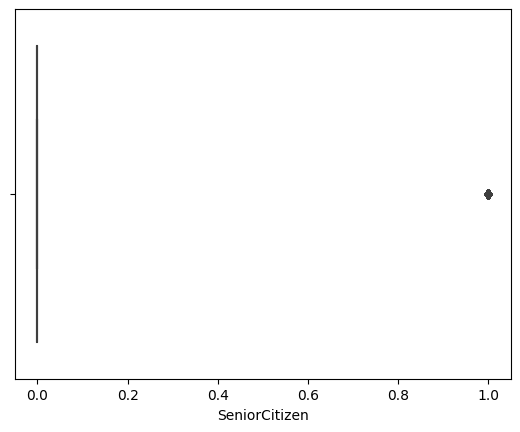

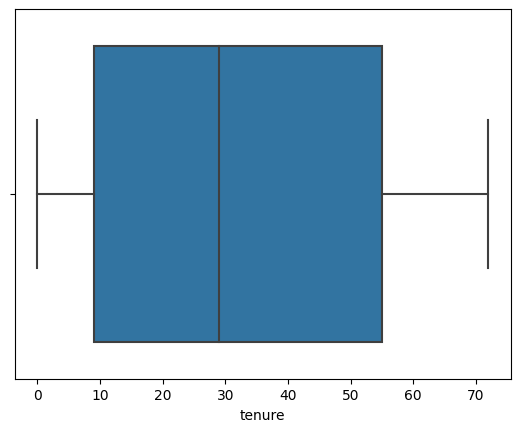

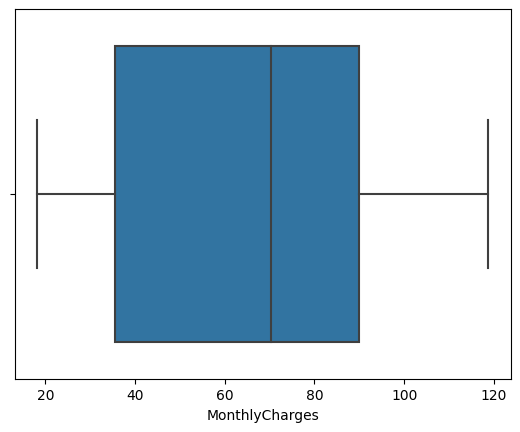

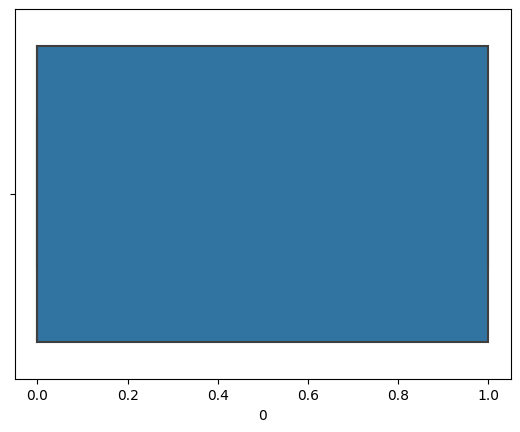

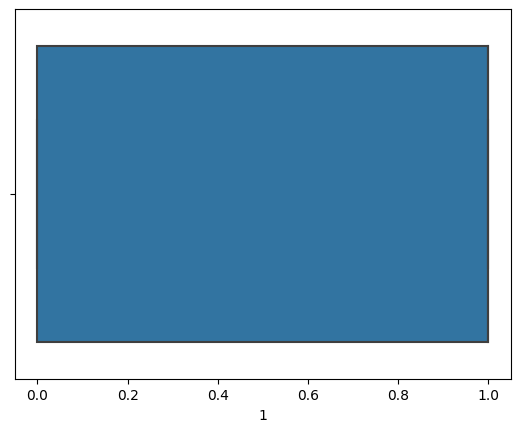

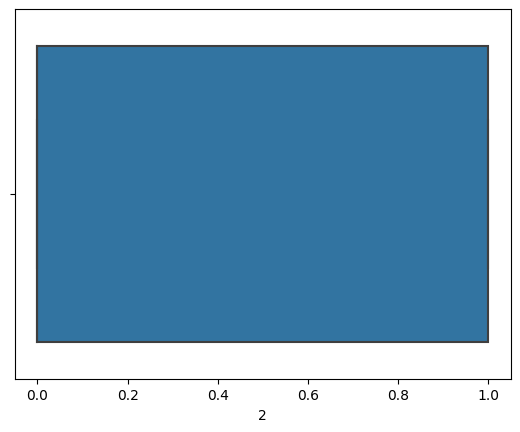

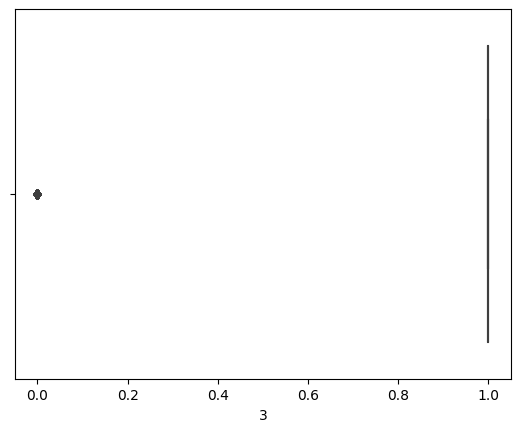

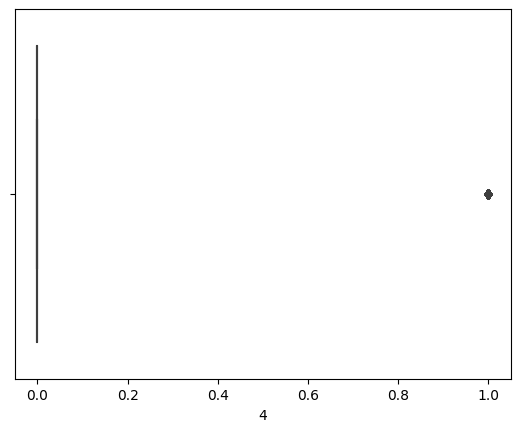

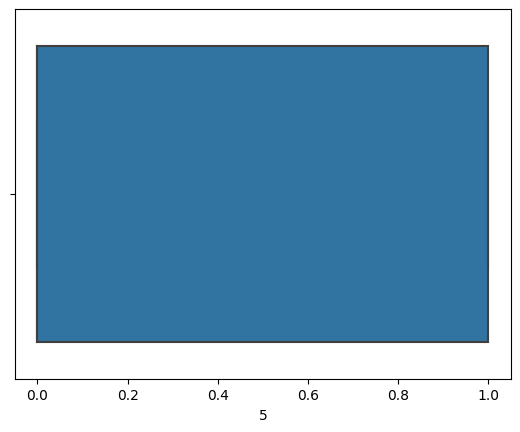

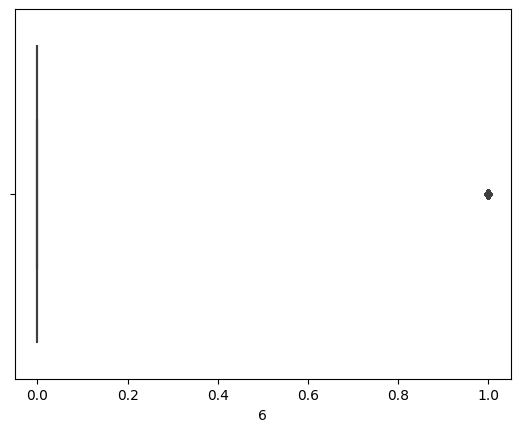

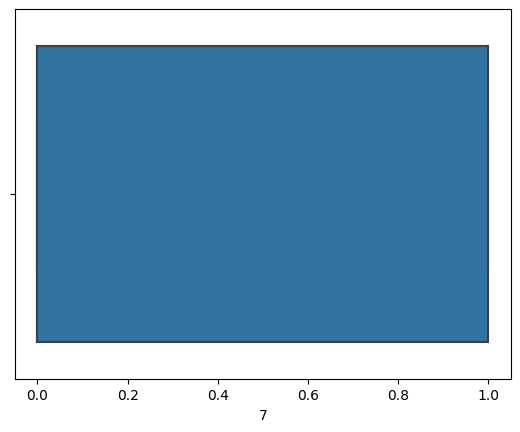

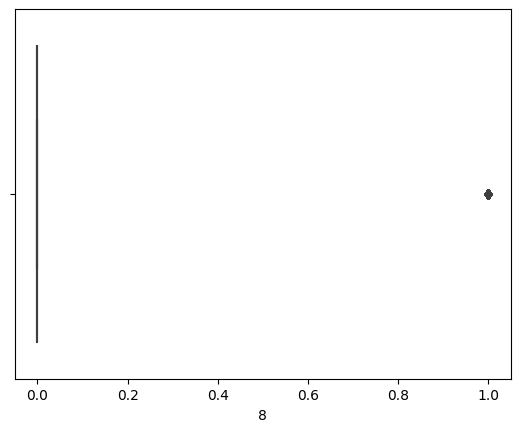

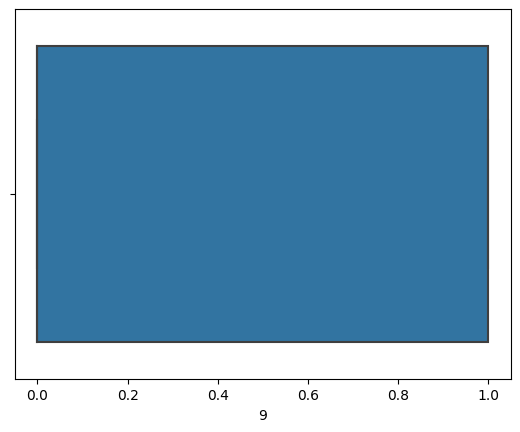

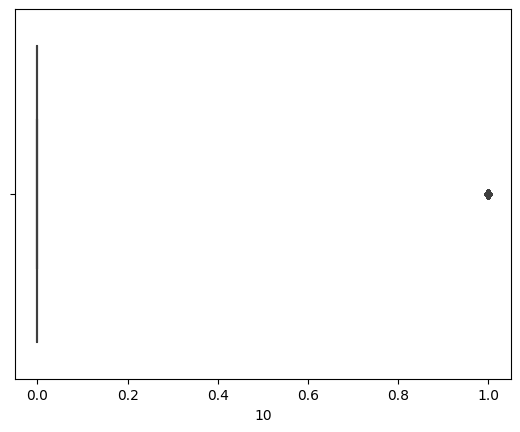

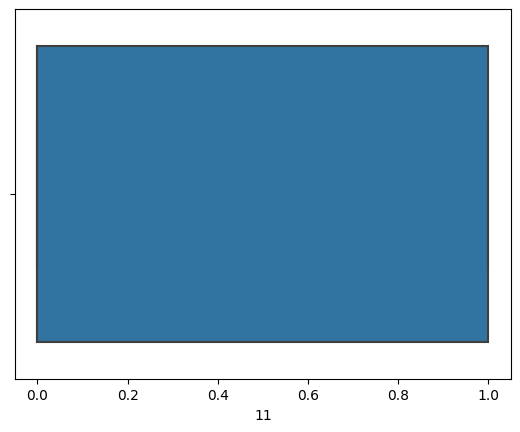

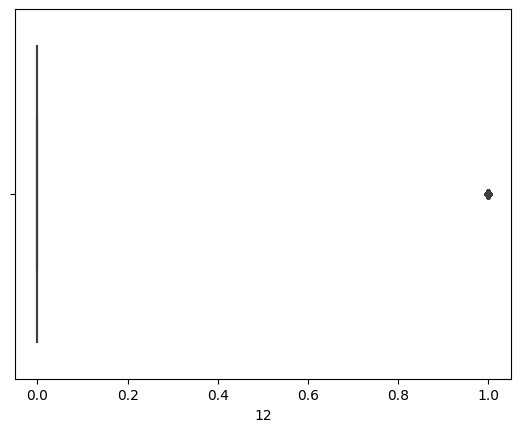

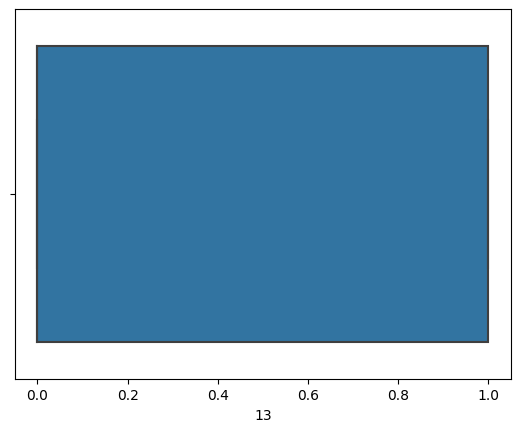

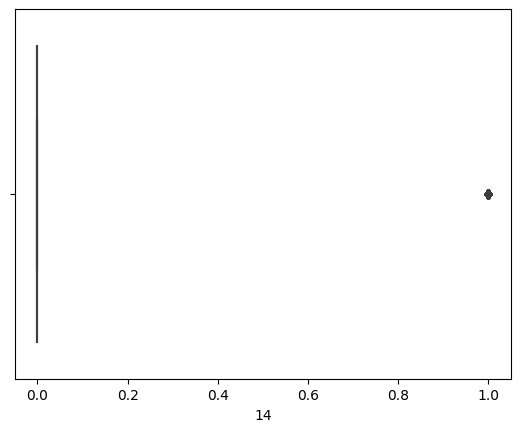

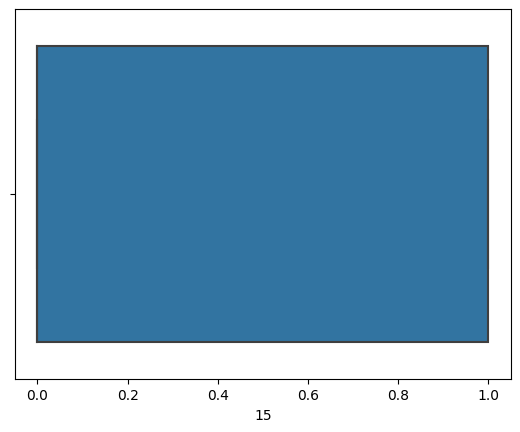

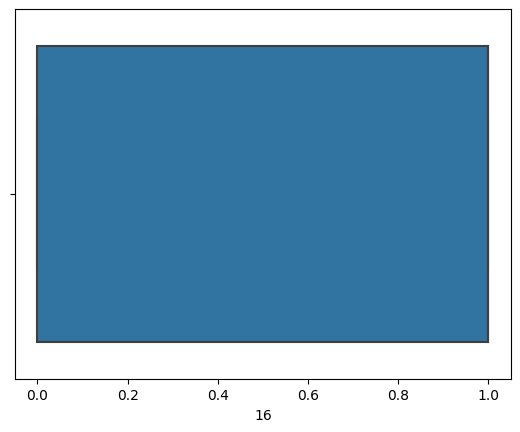

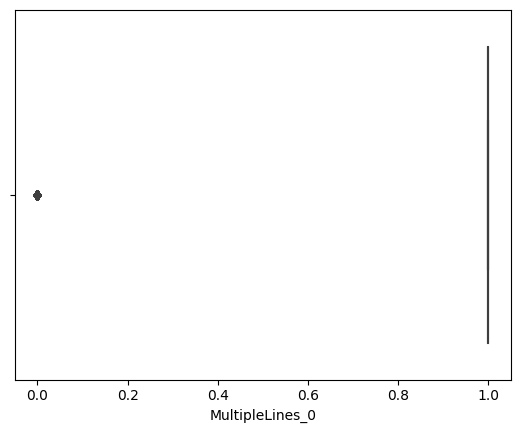

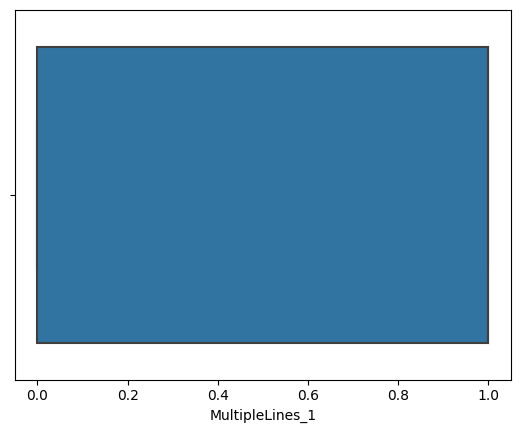

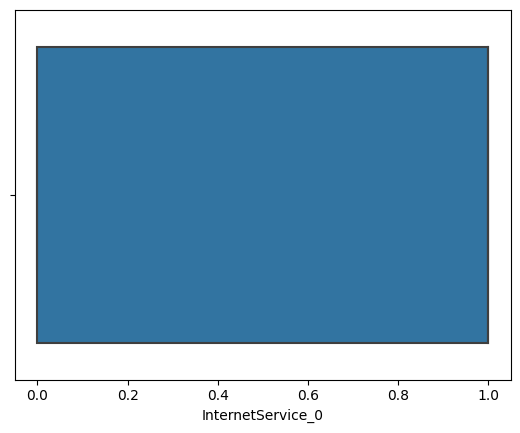

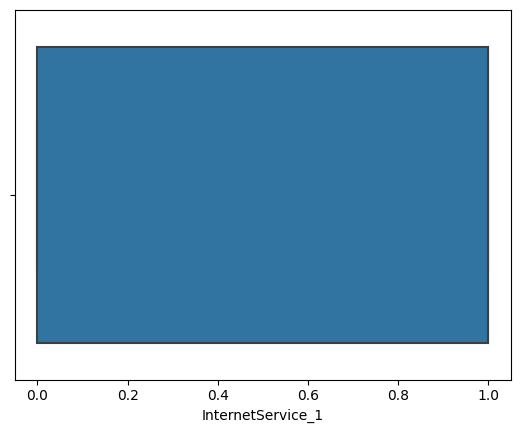

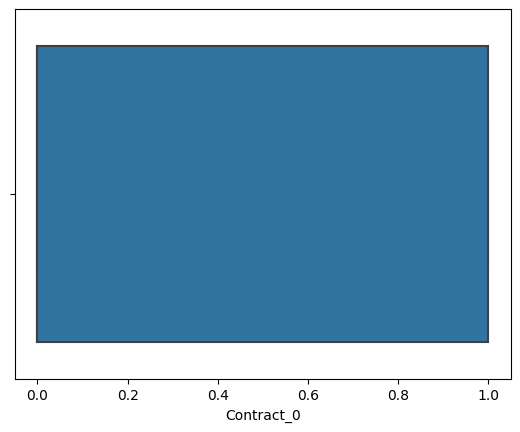

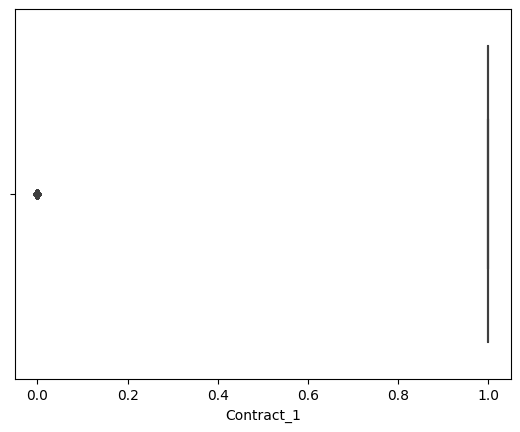

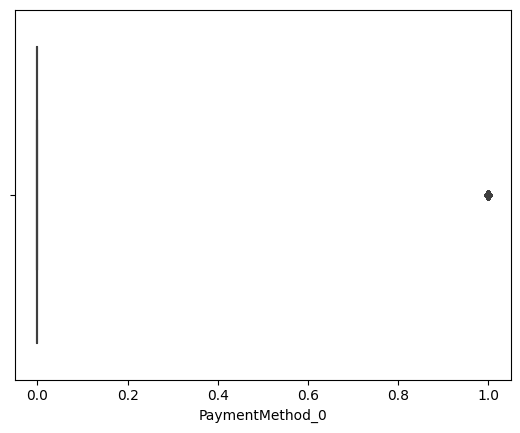

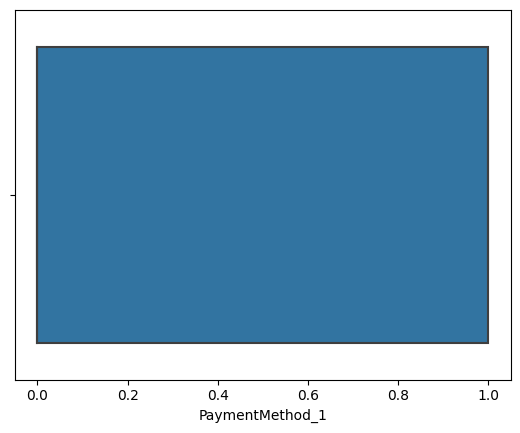

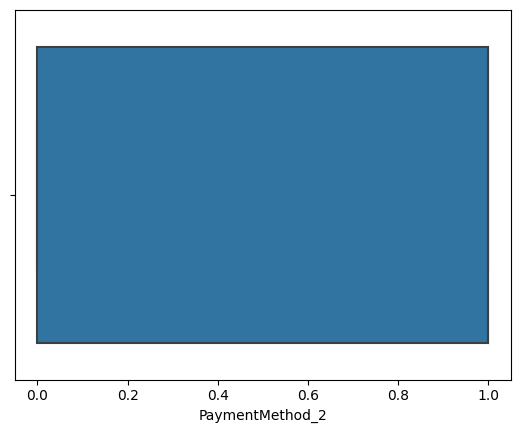

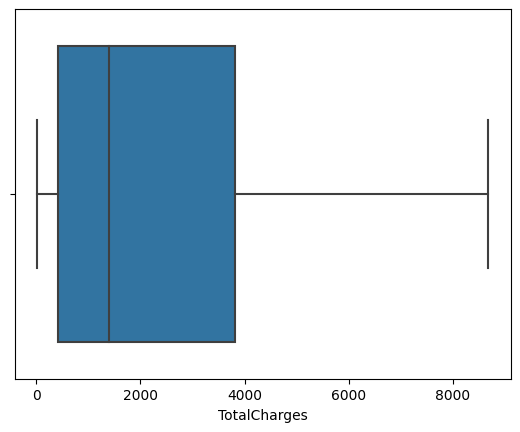

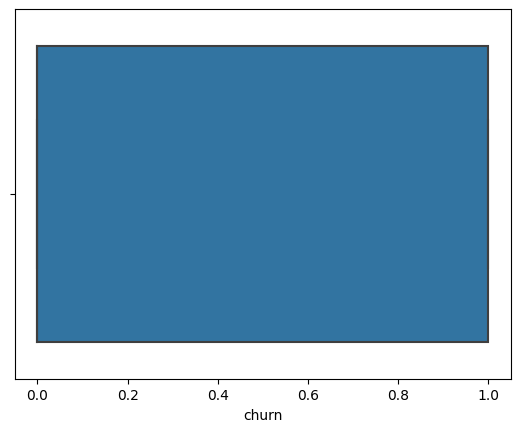

In [145]:
for i in merged1.columns:
    sns.boxplot(data=merged1, x=i)
    plt.show()

In [146]:
for i in merged1.columns:
    q75 = merged1[i].quantile(0.75)
    q25 = merged1[i].quantile(0.25)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    lower = q25 - 1.5 *iqr
    print('...........')
    print(i)
    print(upper)
    print(lower)
    print('...............')

...........
SeniorCitizen
0.0
0.0
...............
...........
tenure
124.0
-60.0
...............
...........
MonthlyCharges
171.27500000000003
-45.725000000000016
...............
...........
0
2.5
-1.5
...............
...........
1
2.5
-1.5
...............
...........
2
2.5
-1.5
...............
...........
3
1.0
1.0
...............
...........
4
0.0
0.0
...............
...........
5
2.5
-1.5
...............
...........
6
0.0
0.0
...............
...........
7
2.5
-1.5
...............
...........
8
0.0
0.0
...............
...........
9
2.5
-1.5
...............
...........
10
0.0
0.0
...............
...........
11
2.5
-1.5
...............
...........
12
0.0
0.0
...............
...........
13
2.5
-1.5
...............
...........
14
0.0
0.0
...............
...........
15
2.5
-1.5
...............
...........
16
2.5
-1.5
...............
...........
MultipleLines_0
1.0
1.0
...............
...........
MultipleLines_1
2.5
-1.5
...............
...........
InternetService_0
2.5
-1.5
..............

In [150]:
merged2 = merged1[merged1['MonthlyCharges'] <= 171.275]
merged3 = merged2[merged2['TotalCharges'] <= 8906.125]
merged4 = merged3[merged3['tenure'] <= 124.0]

In [155]:
Merged = merged4.reset_index()
Merged1 = Merged.drop(['index'], axis=1)

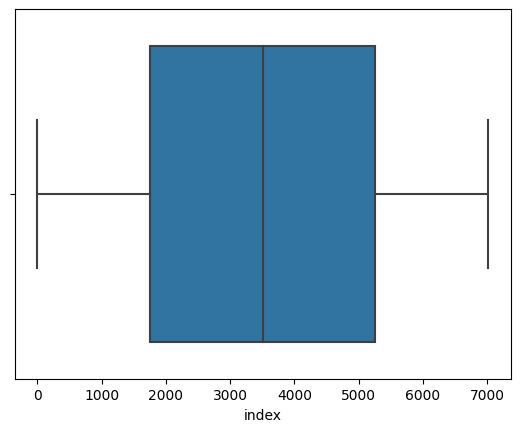

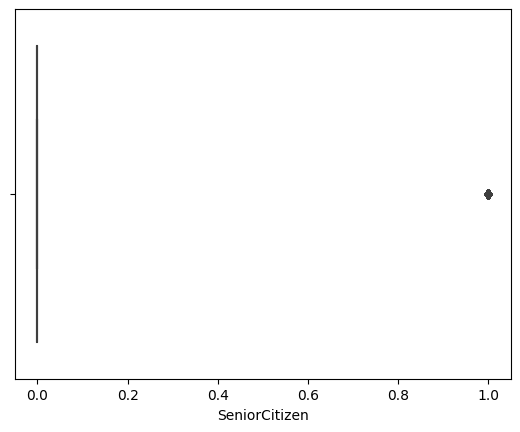

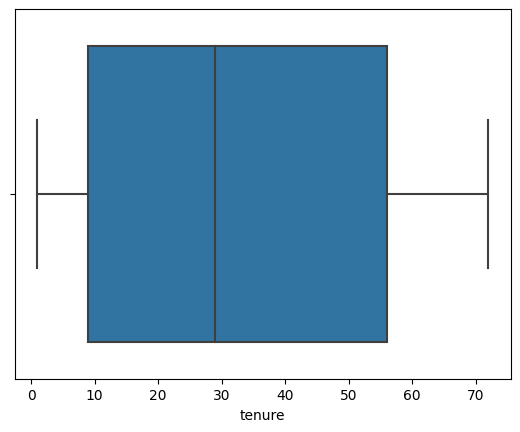

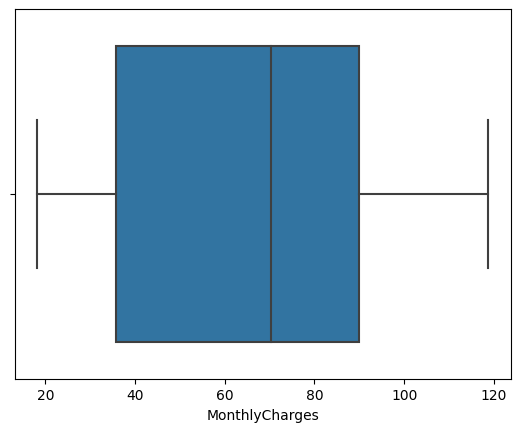

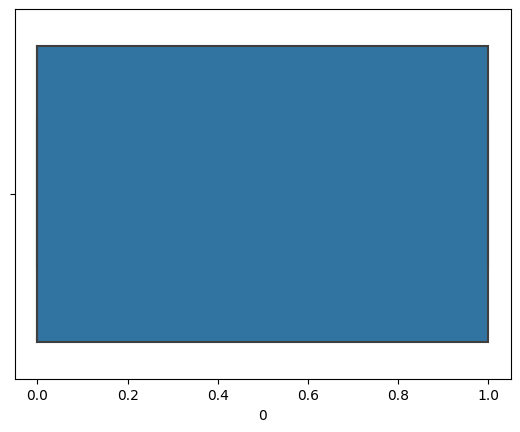

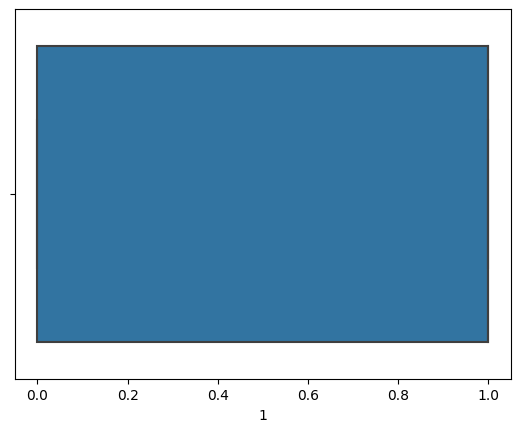

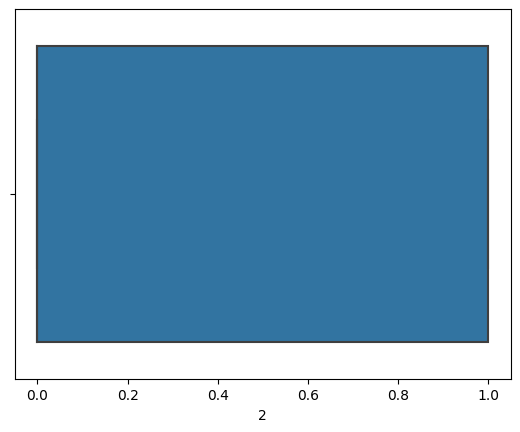

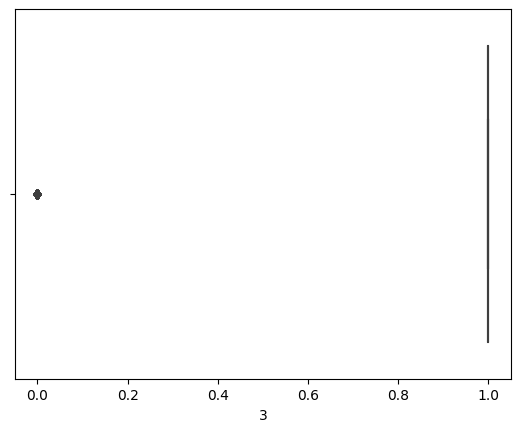

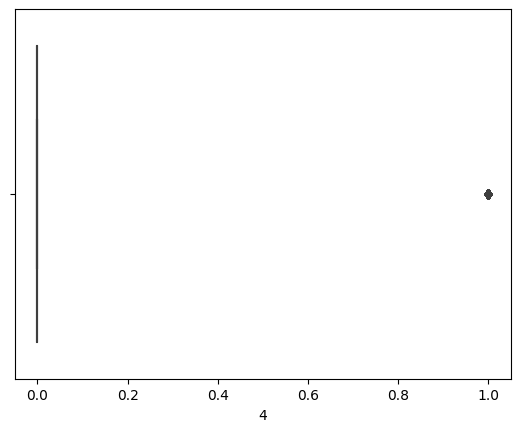

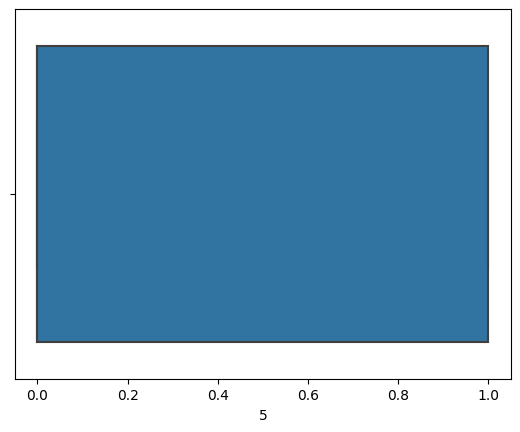

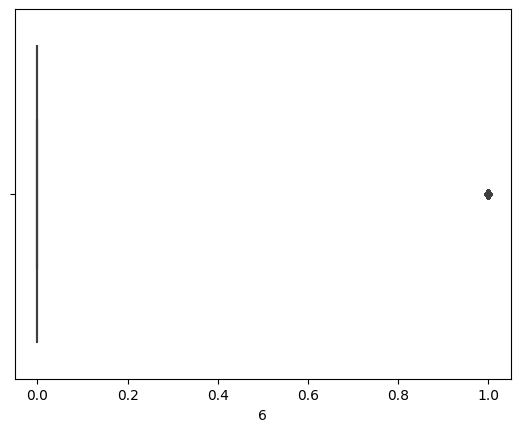

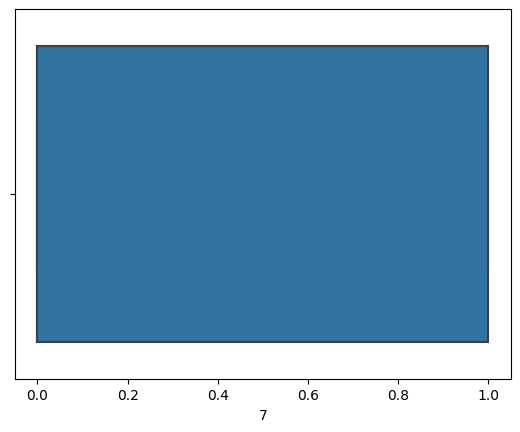

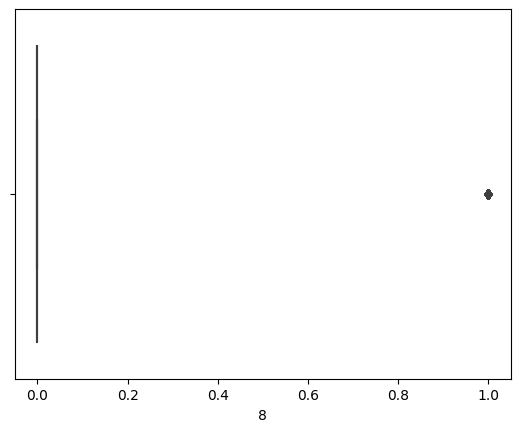

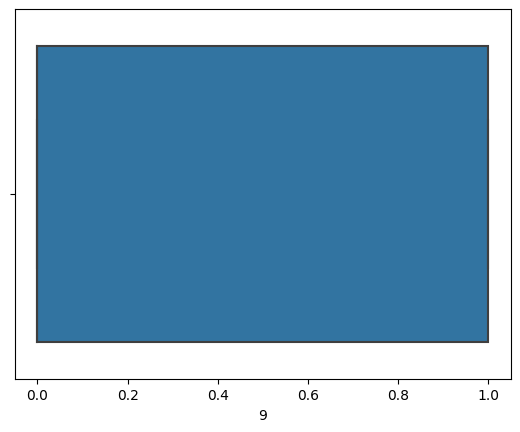

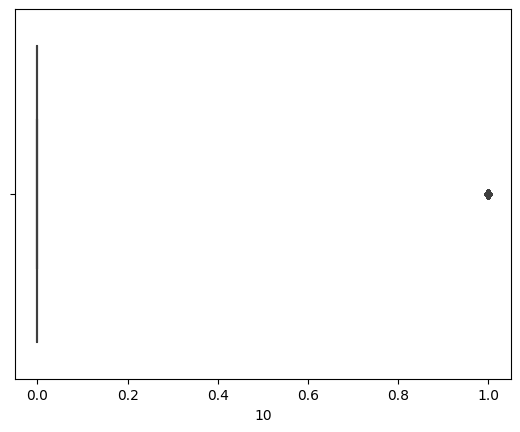

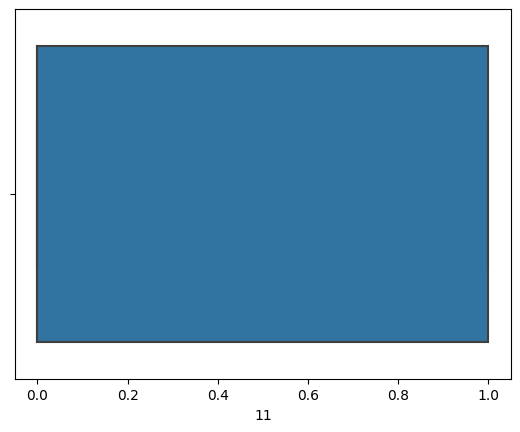

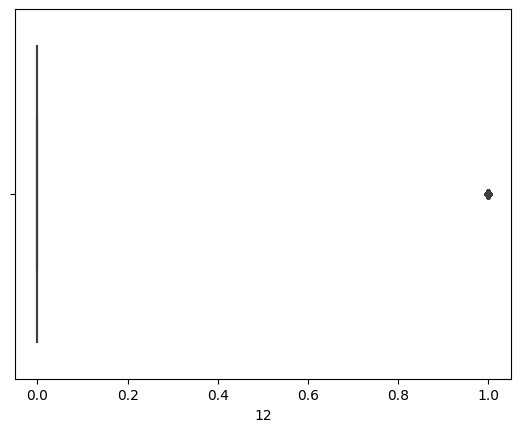

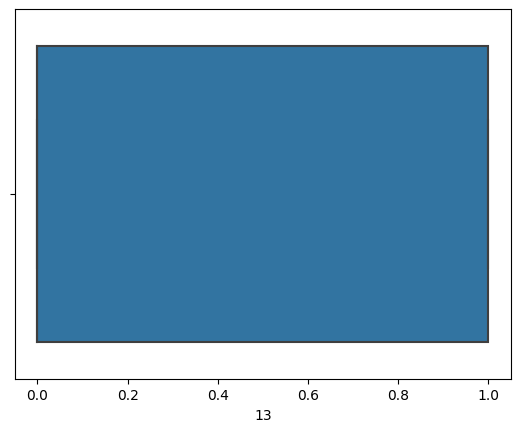

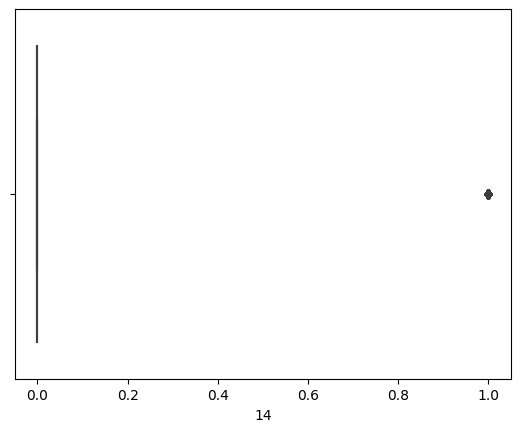

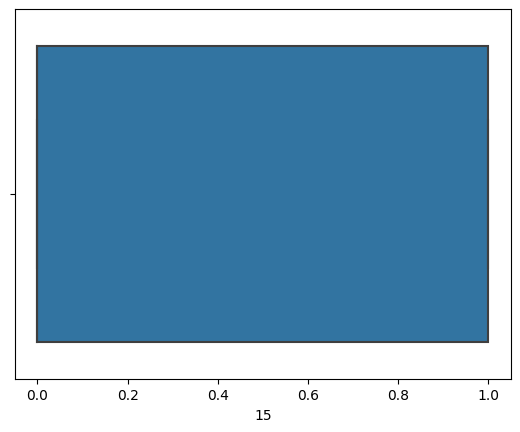

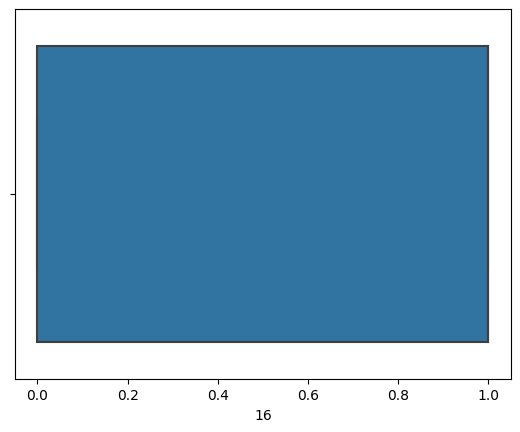

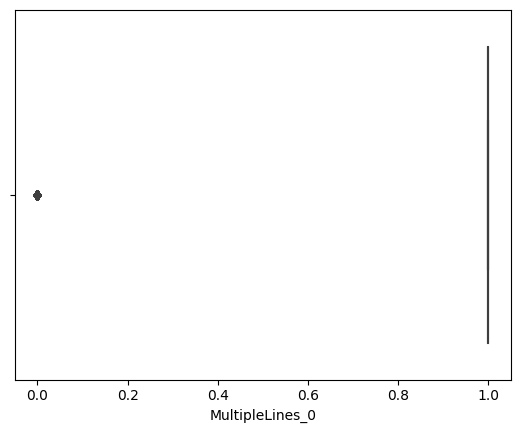

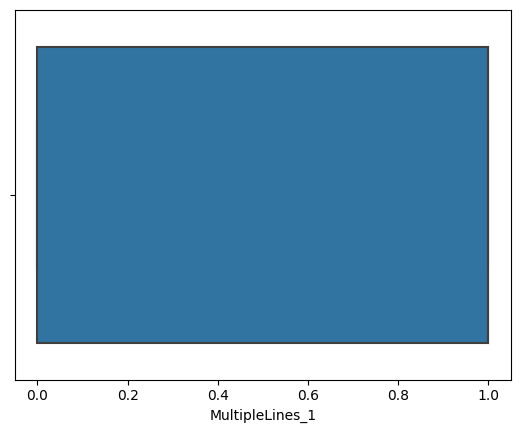

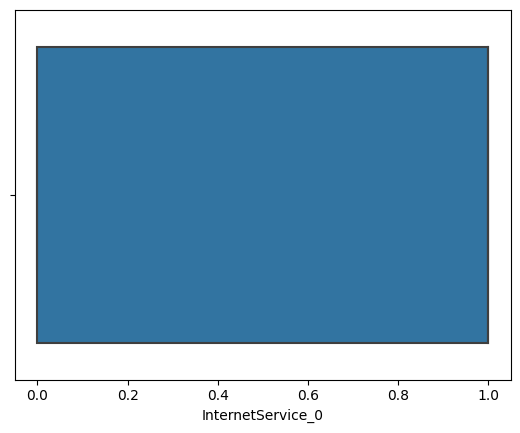

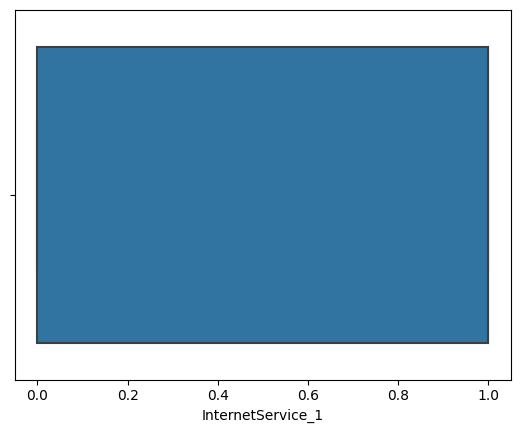

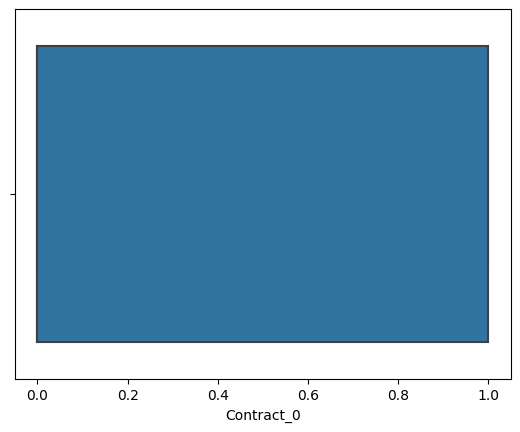

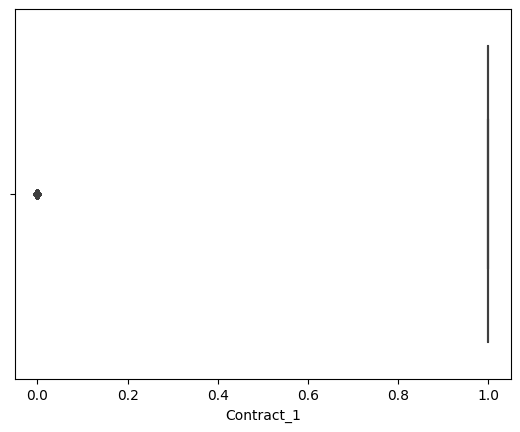

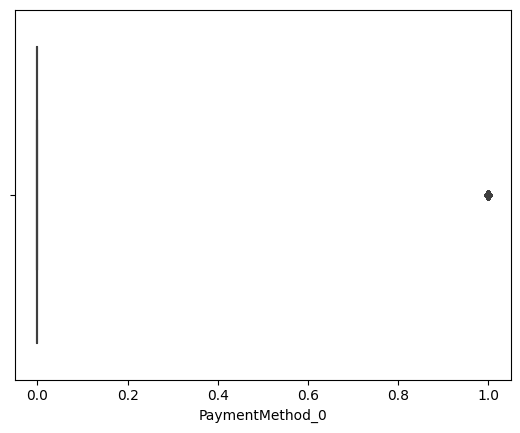

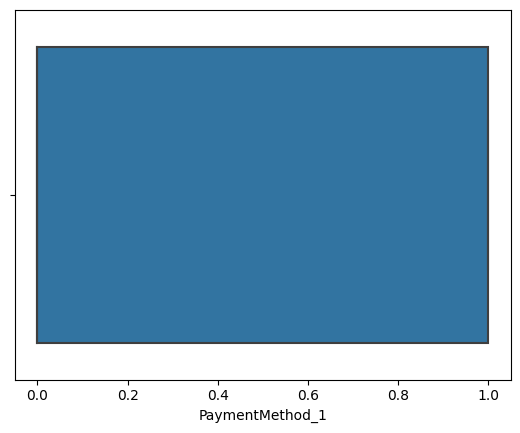

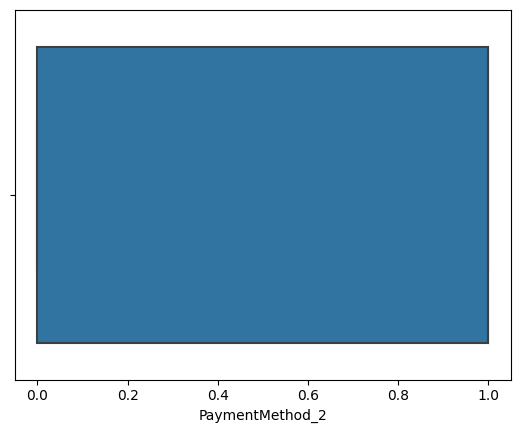

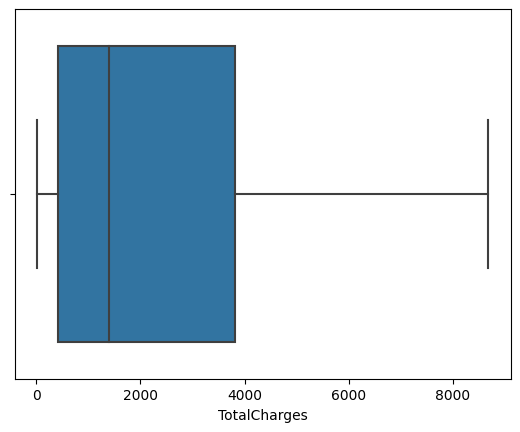

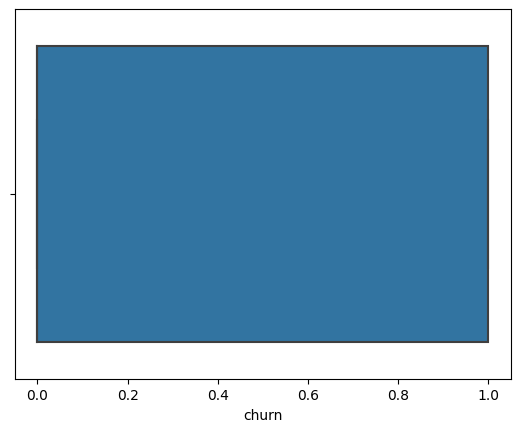

In [156]:
for i in Merged.columns:
    sns.boxplot(data=Merged, x=i)
    plt.show()

# Loss of Data 

In [154]:
33 / 7043 *100

0.46855033366463156

# # Final Dataset

In [260]:
x = Merged1.drop(['churn'], axis=1)
y = Merged1['churn']

In [261]:
x

SeniorCitizen  tenure  MonthlyCharges    0    1    2    3    4    5  \
0                 0       1           29.85  0.0  0.0  1.0  0.0  0.0  0.0   
1                 0      34           56.95  0.0  1.0  0.0  1.0  0.0  1.0   
2                 0       2           53.85  0.0  1.0  0.0  1.0  0.0  1.0   
3                 0      45           42.30  0.0  1.0  0.0  0.0  0.0  1.0   
4                 0       2           70.70  0.0  0.0  0.0  1.0  0.0  0.0   
...             ...     ...             ...  ...  ...  ...  ...  ...  ...   
6983              0       1           49.95  1.0  1.0  1.0  1.0  0.0  1.0   
6984              0      51           20.65  1.0  0.0  1.0  1.0  0.0  0.0   
6985              0       1           70.65  1.0  0.0  1.0  0.0  0.0  1.0   
6986              0      39           20.15  0.0  1.0  1.0  1.0  0.0  0.0   
6987              0      12           19.20  0.0  1.0  0.0  1.0  0.0  1.0   

        6  ...  MultipleLines_0  MultipleLines_1  InternetService_0  \
0     0.0  ...                0                1                  0   
1     0.0  ...                1                0                  0   
2     0.0  ...                1                0                  0   
3     0.0  ...                0                1                  0   
4     0.0  ...                1                0                  1   
...   ...  ...              ...              ...                ...   
6983  0.0  ...                1                0                  0   
6984  0.0  ...                1                0                  1   
6985  0.0  ...                1                0                  1   
6986  0.0  ...                1                0                  1   
6987  0.0  ...                1                0                  1   

      InternetService_1  Contract_0  Contract_1  PaymentMethod_0  \
0                     1           0           1                0   
1                     1           1           0                0   
2                     1           0           1                0   
3                     1           1           0                0   
4                     0           0           1                0   
...                 ...         ...         ...              ...   
6983                  1           0           1                0   
6984                  1           1           1                0   
6985                  0           0           1                0   
6986                  1           1           1                0   
6987                  1           0           1                0   

      PaymentMethod_1  PaymentMethod_2  TotalCharges  
0                   0                1         29.85  
1                   1                0       1889.50  
2                   1                0        108.15  
3                   1                1       1840.75  
4                   0                1        151.65  
...               ...              ...           ...  
6983                0                1         49.95  
6984                1                1       1020.75  
6985                1                0         70.65  
6986                1                0        826.00  
6987                0                1        239.00  

[6988 rows x 30 columns]

# distribution of data

In [262]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

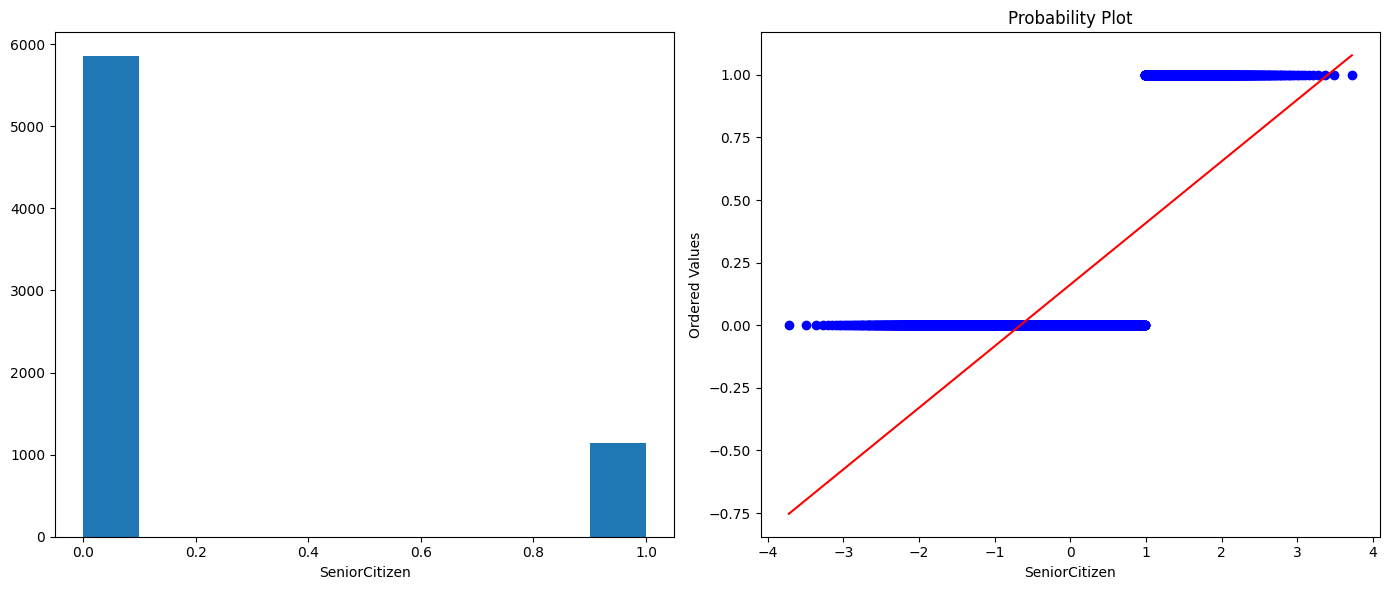

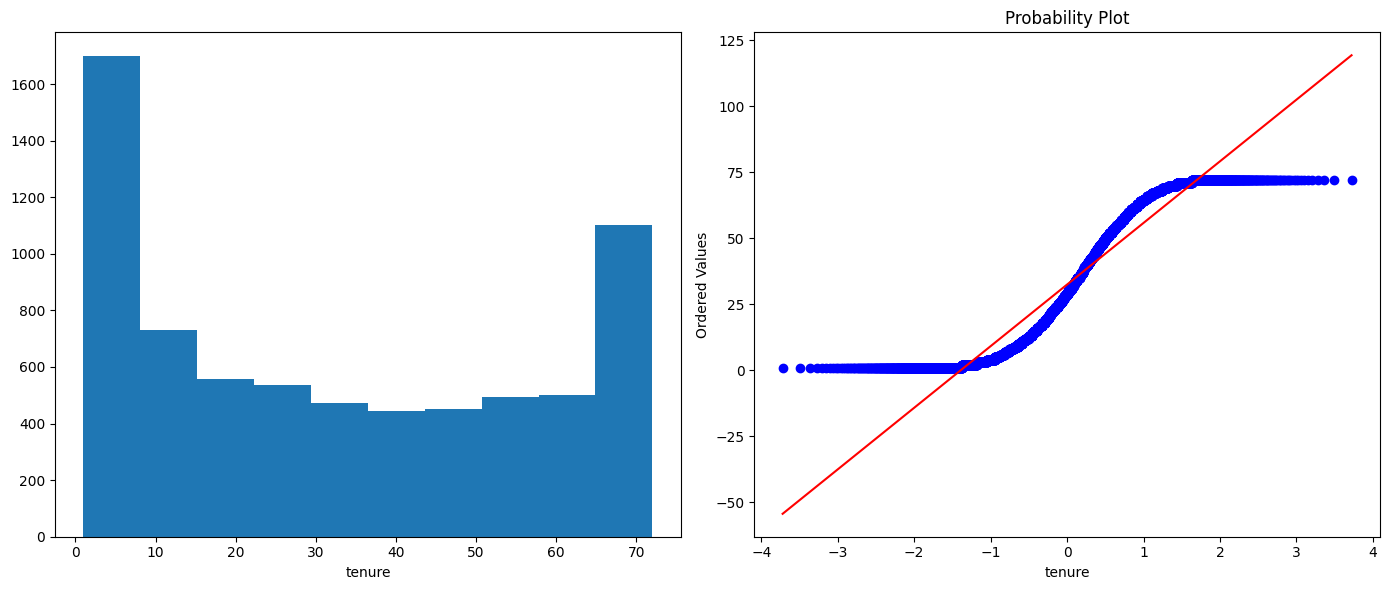

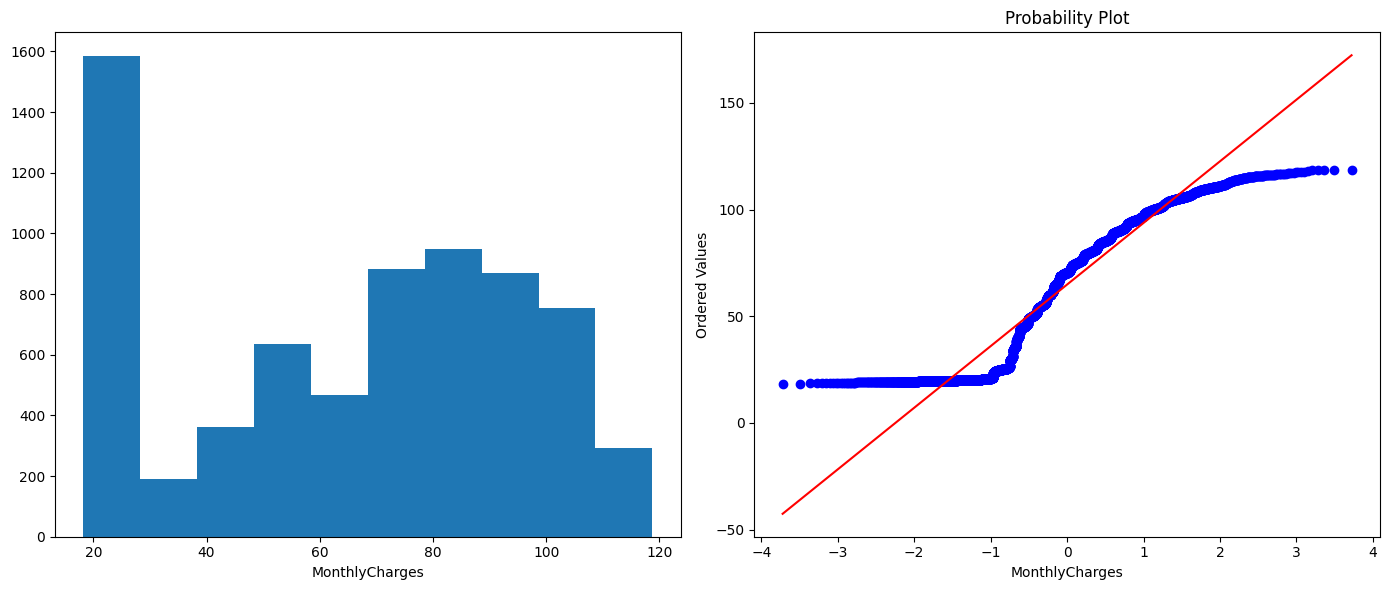

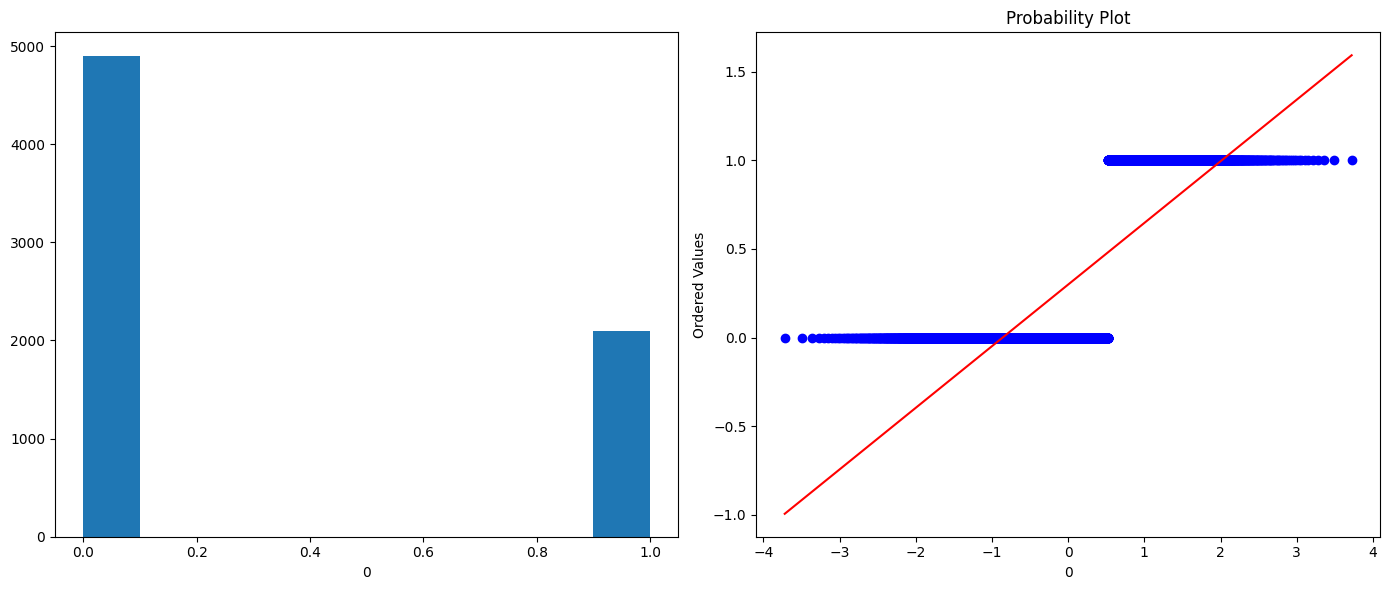

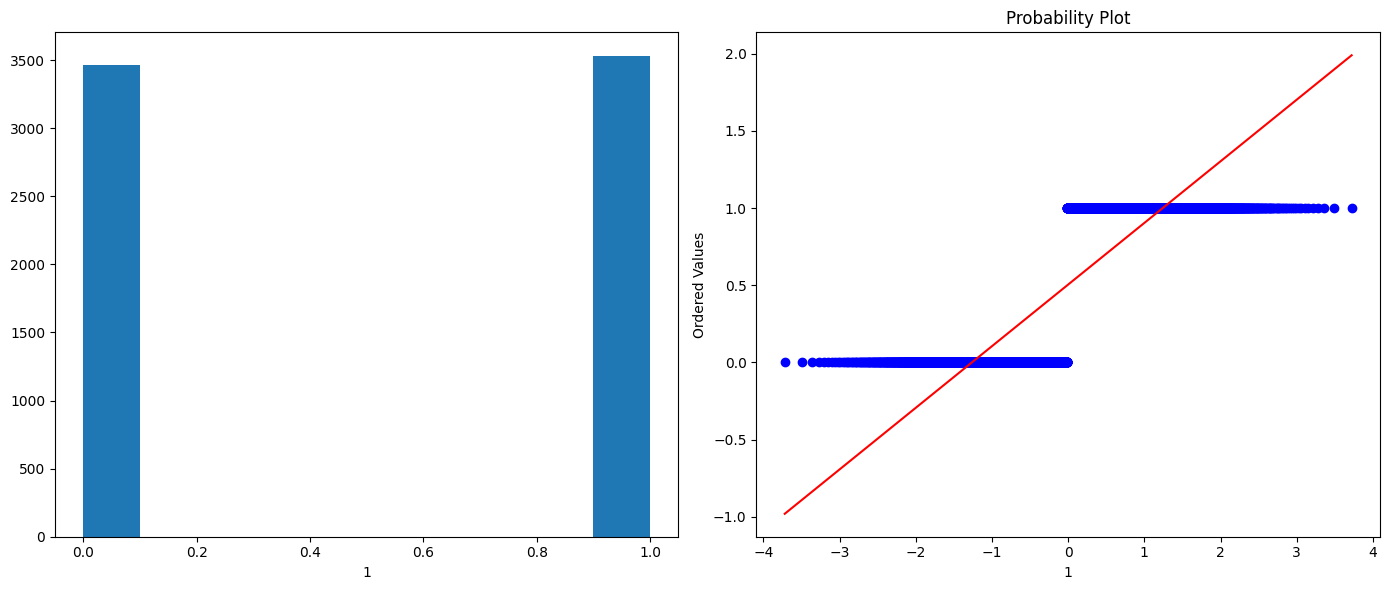

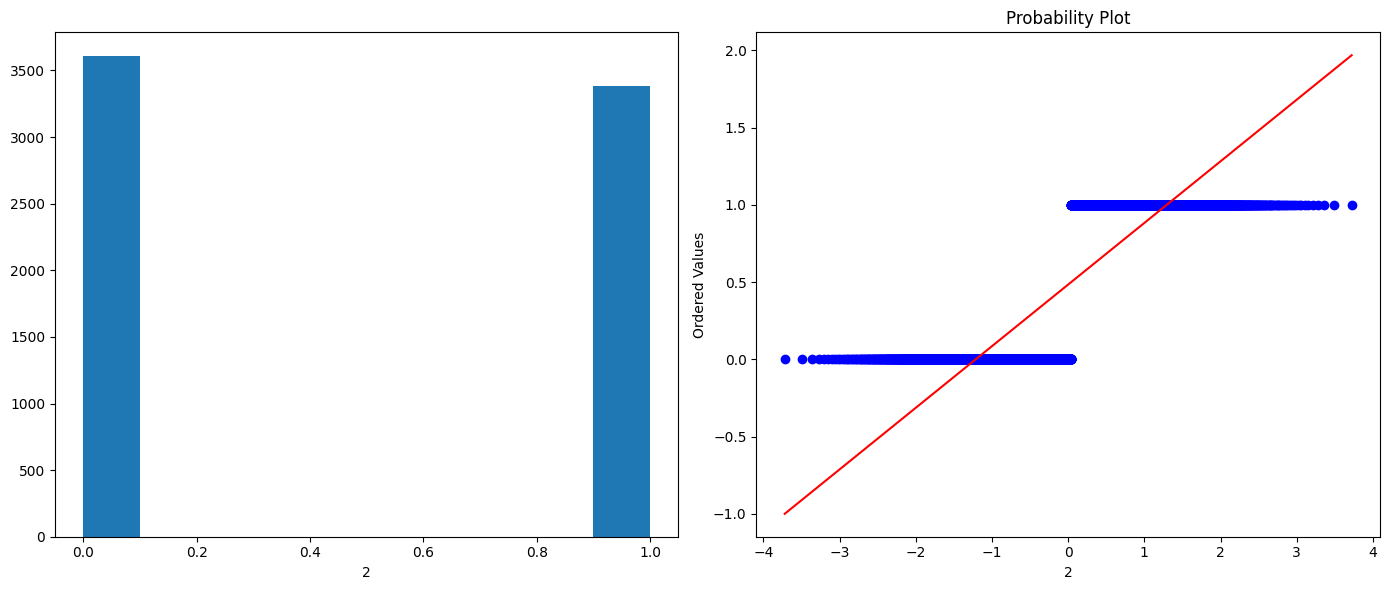

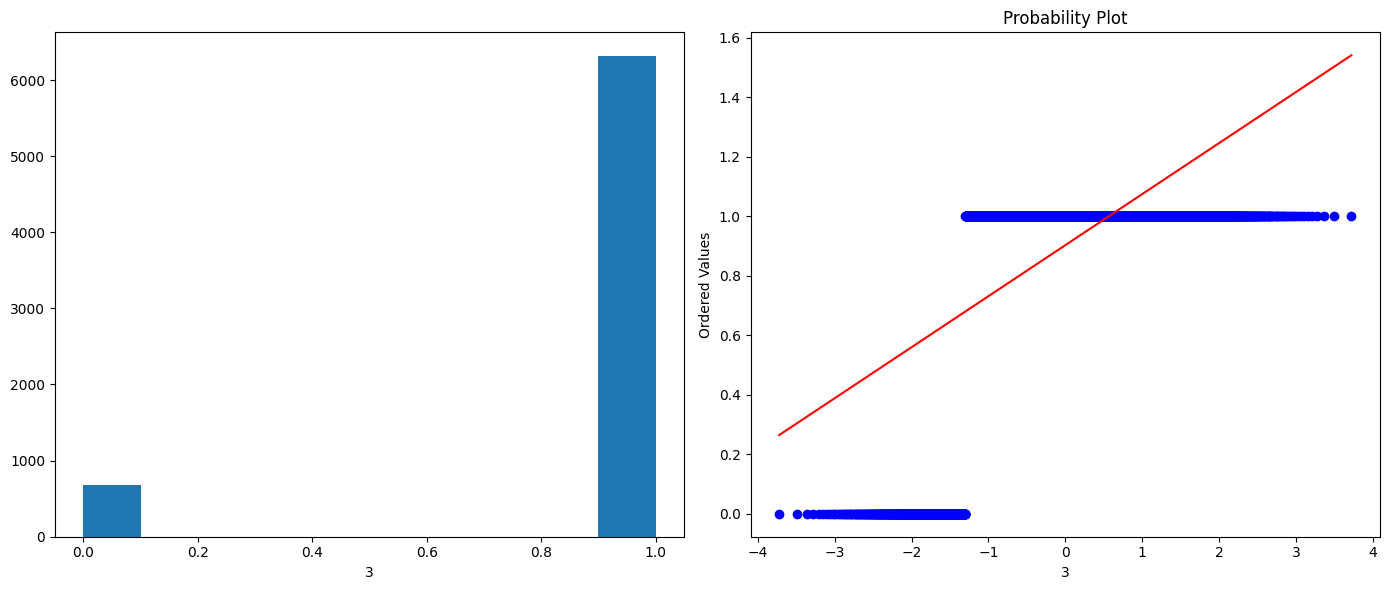

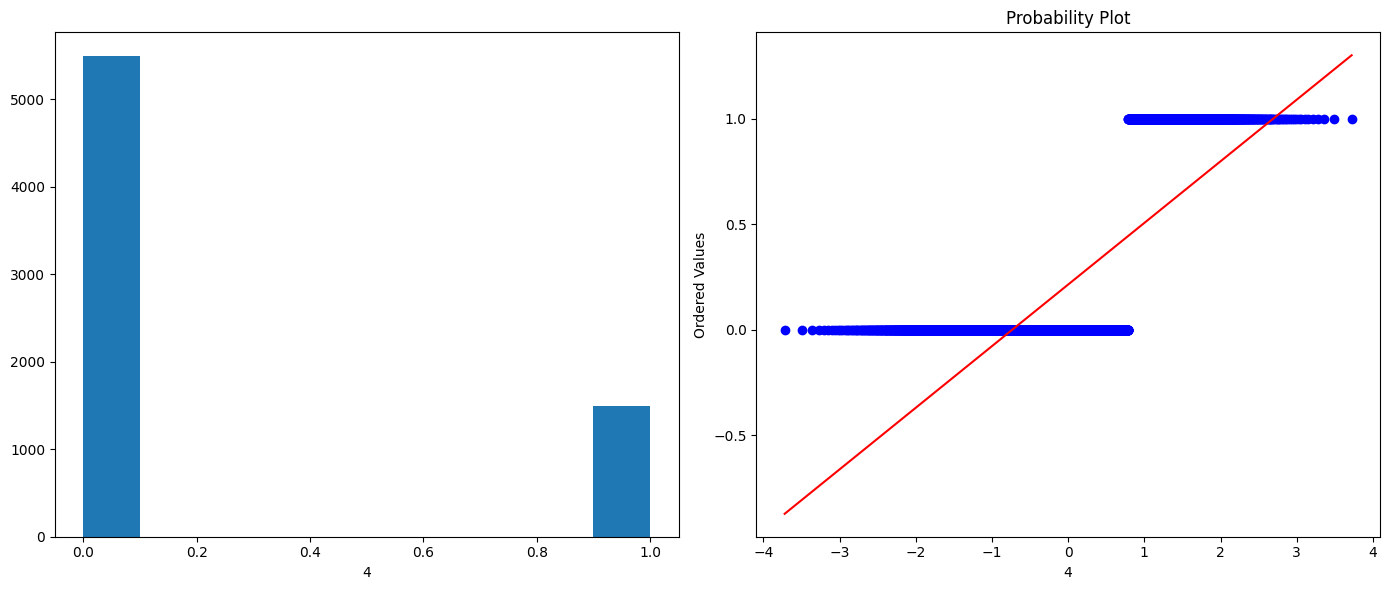

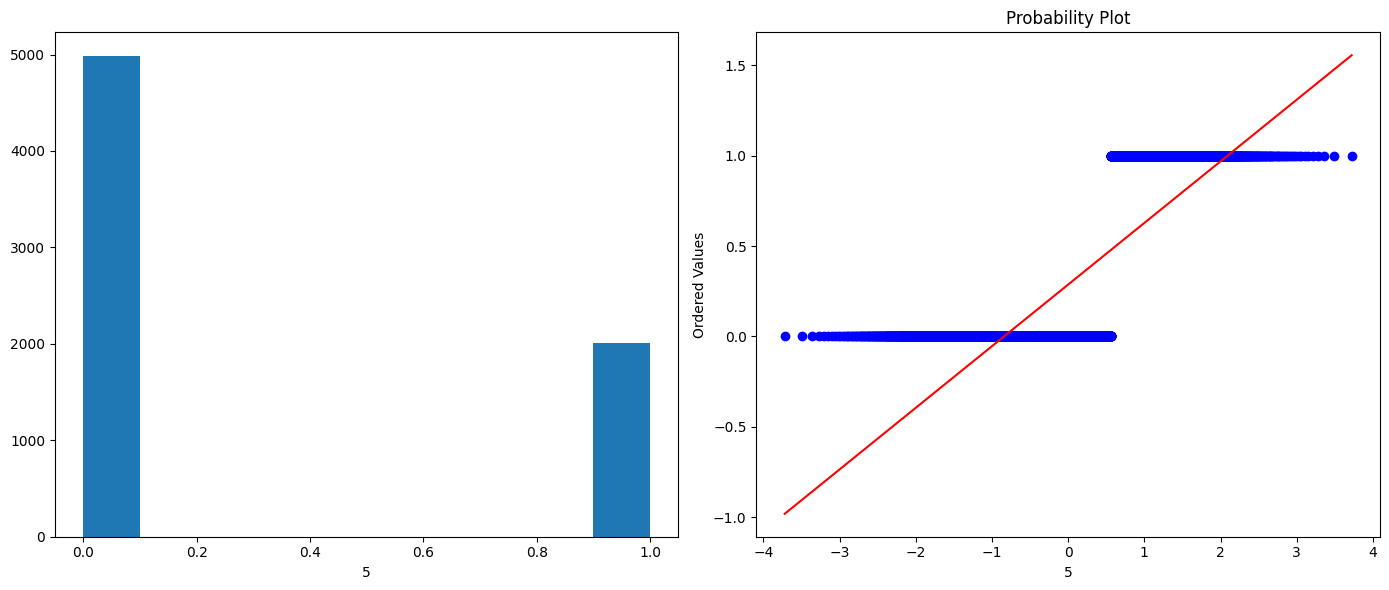

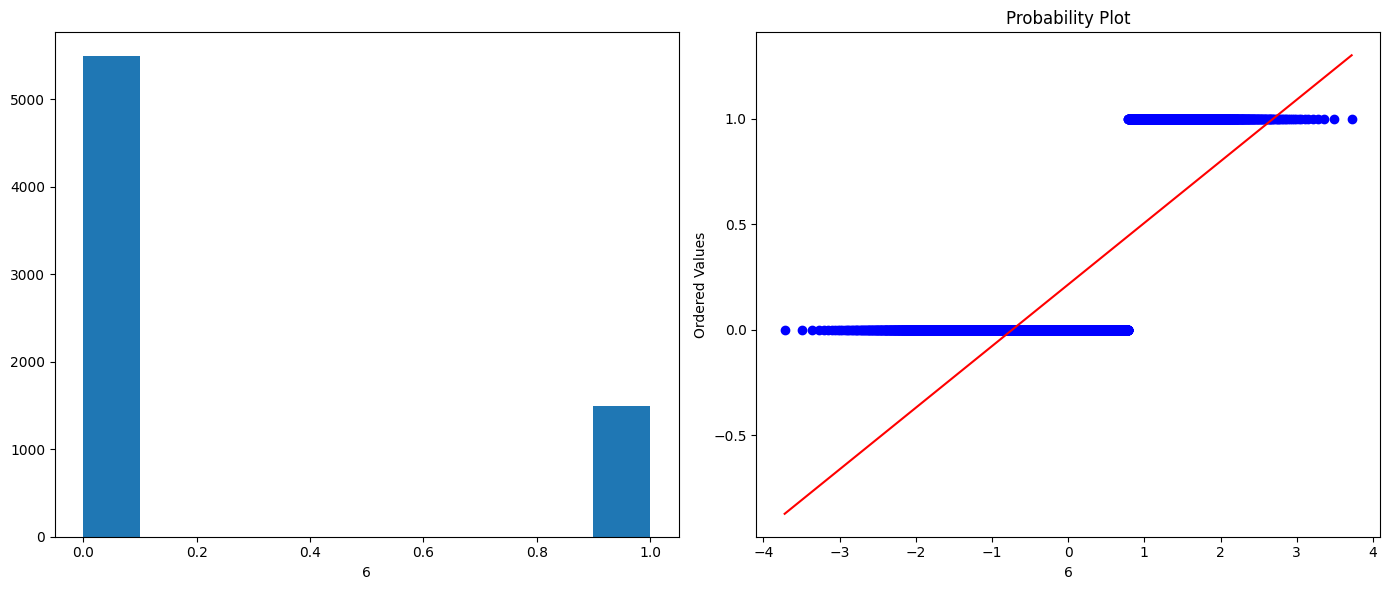

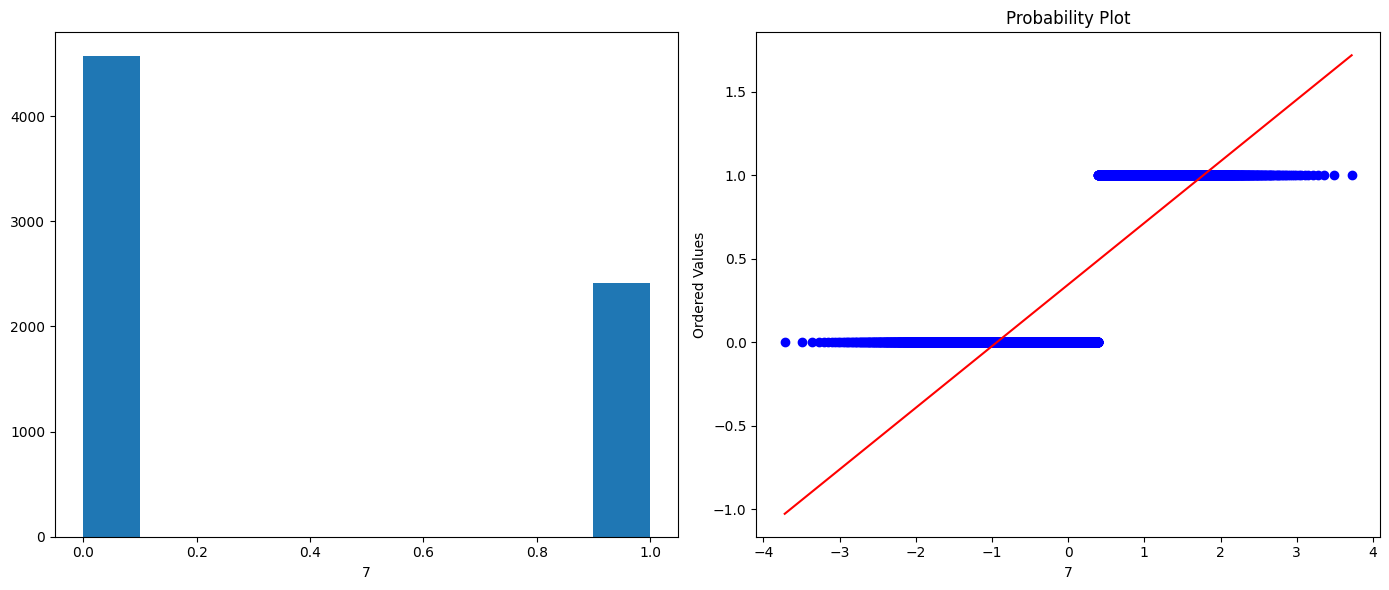

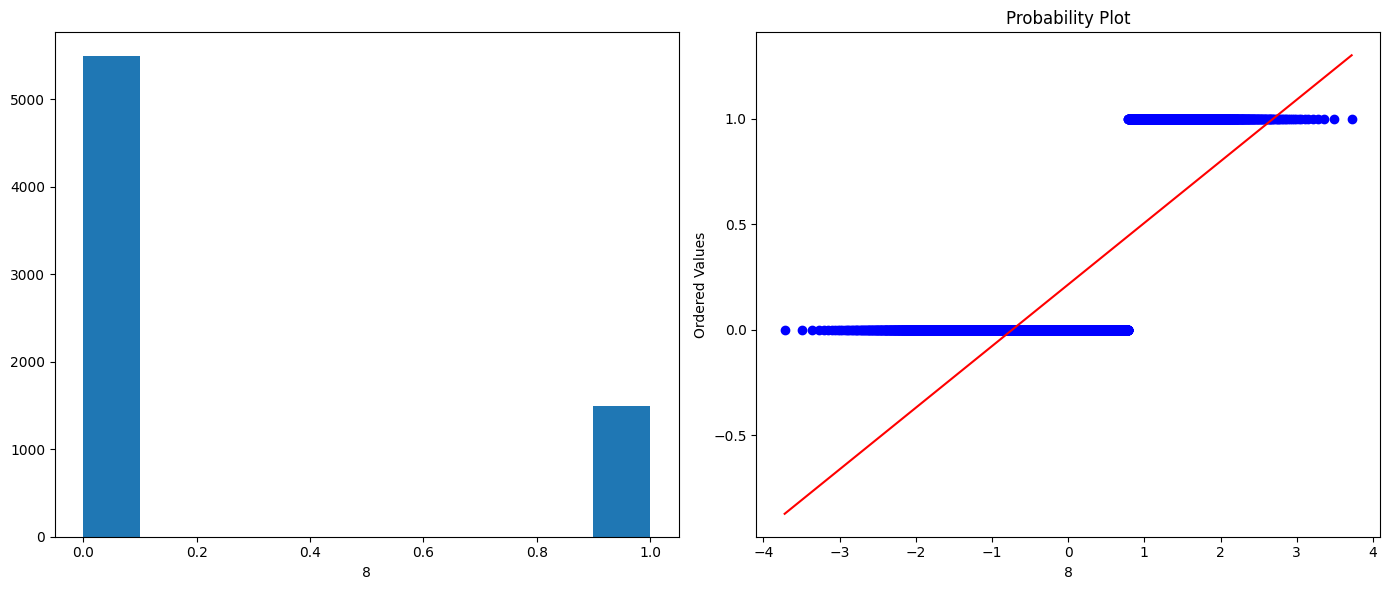

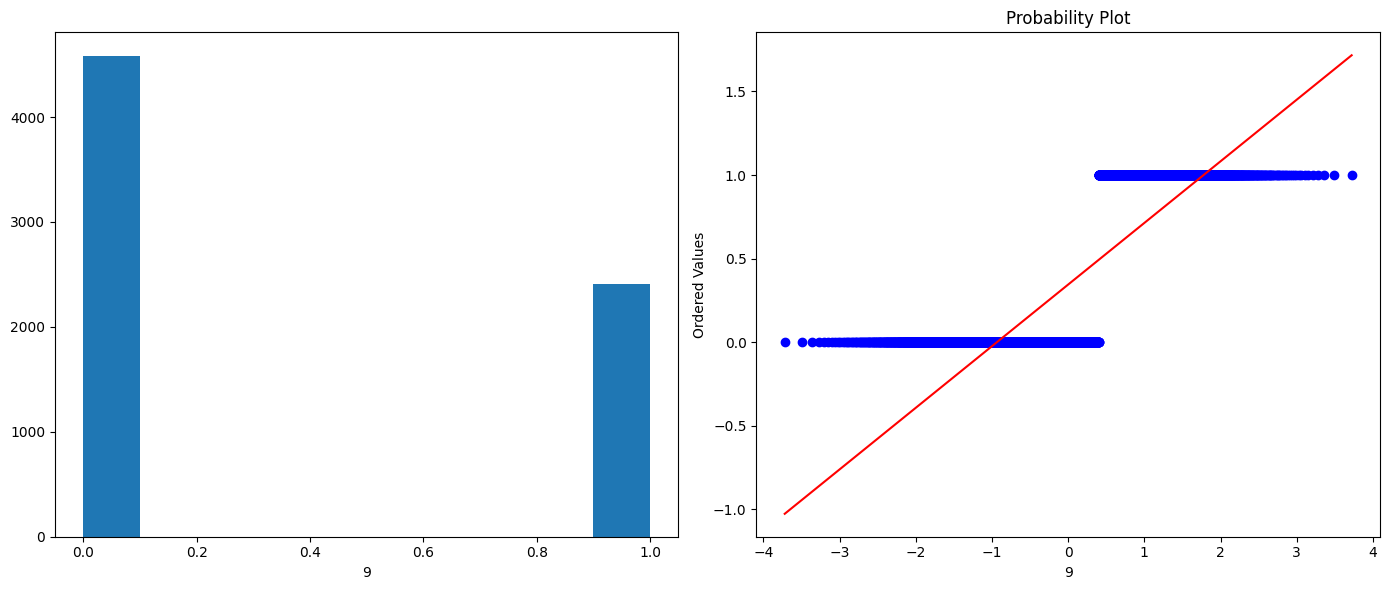

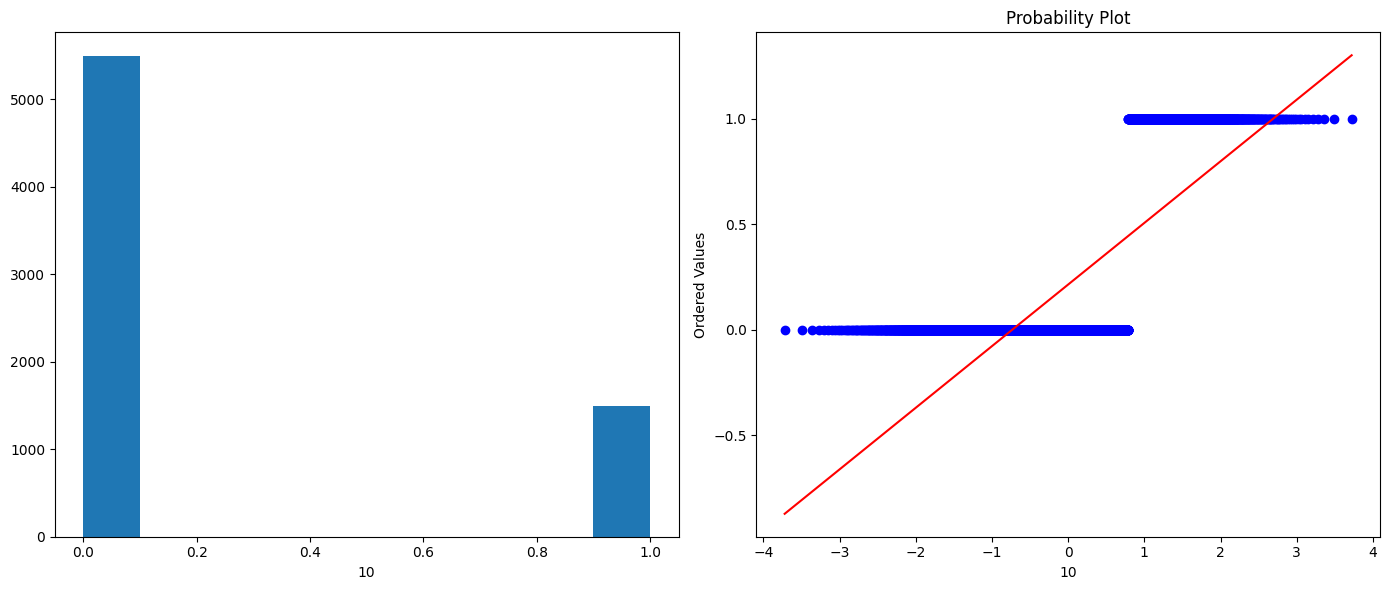

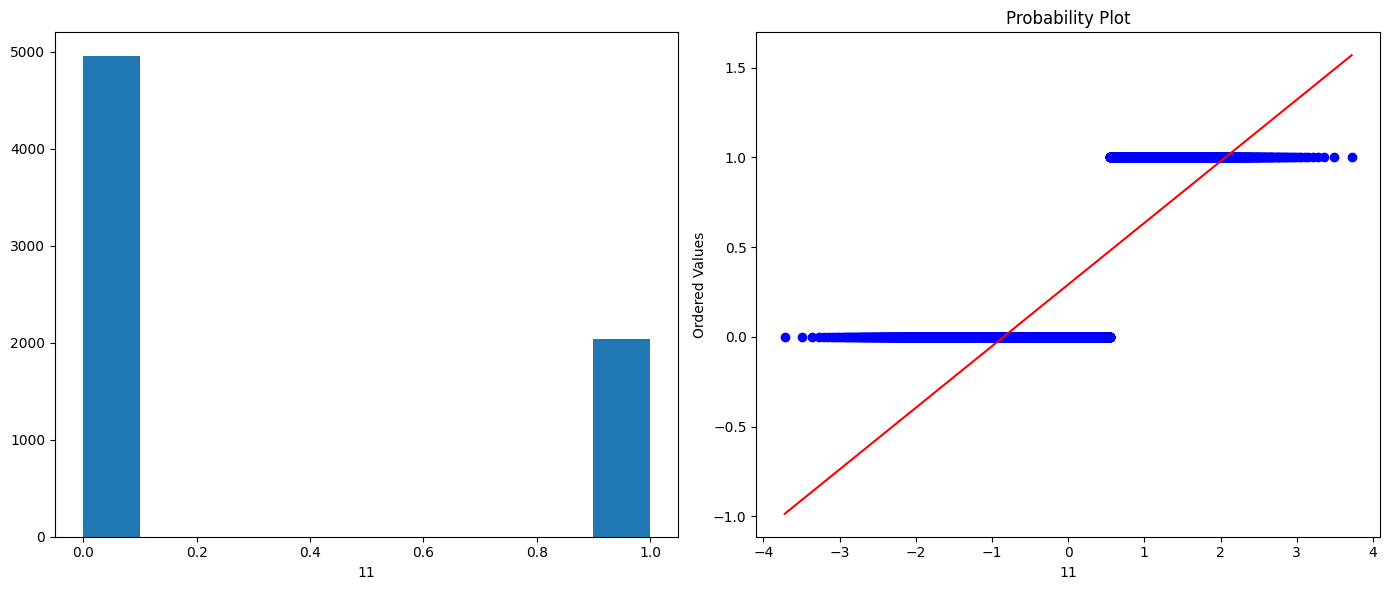

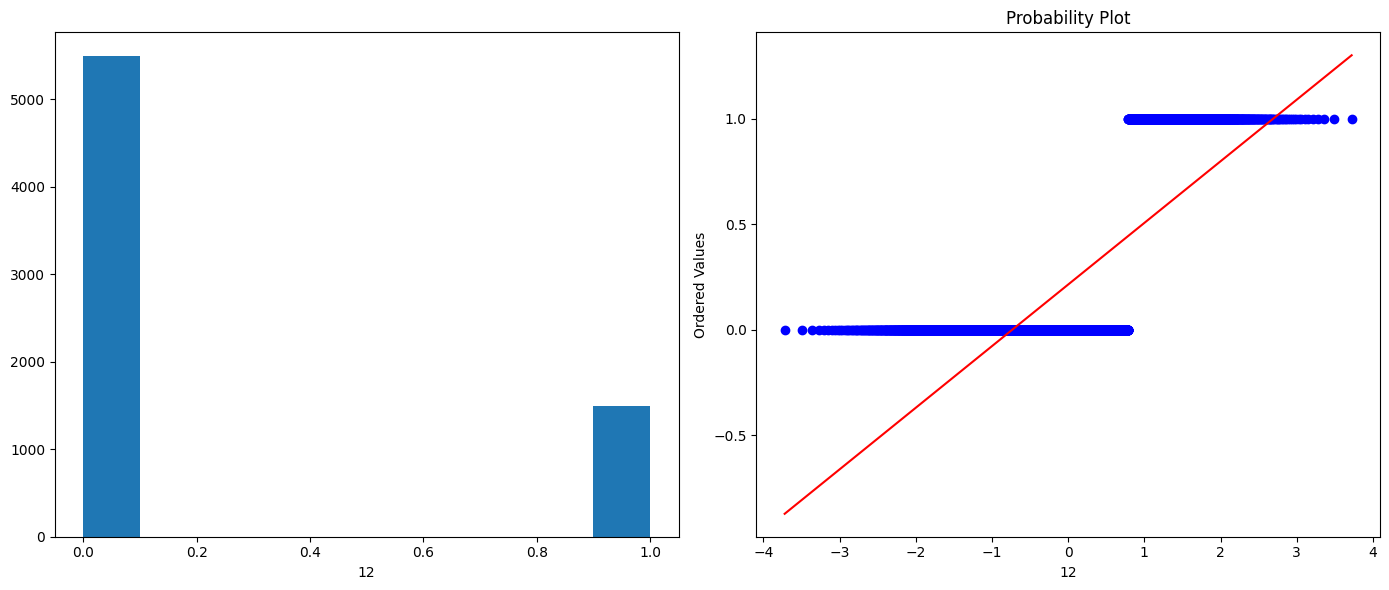

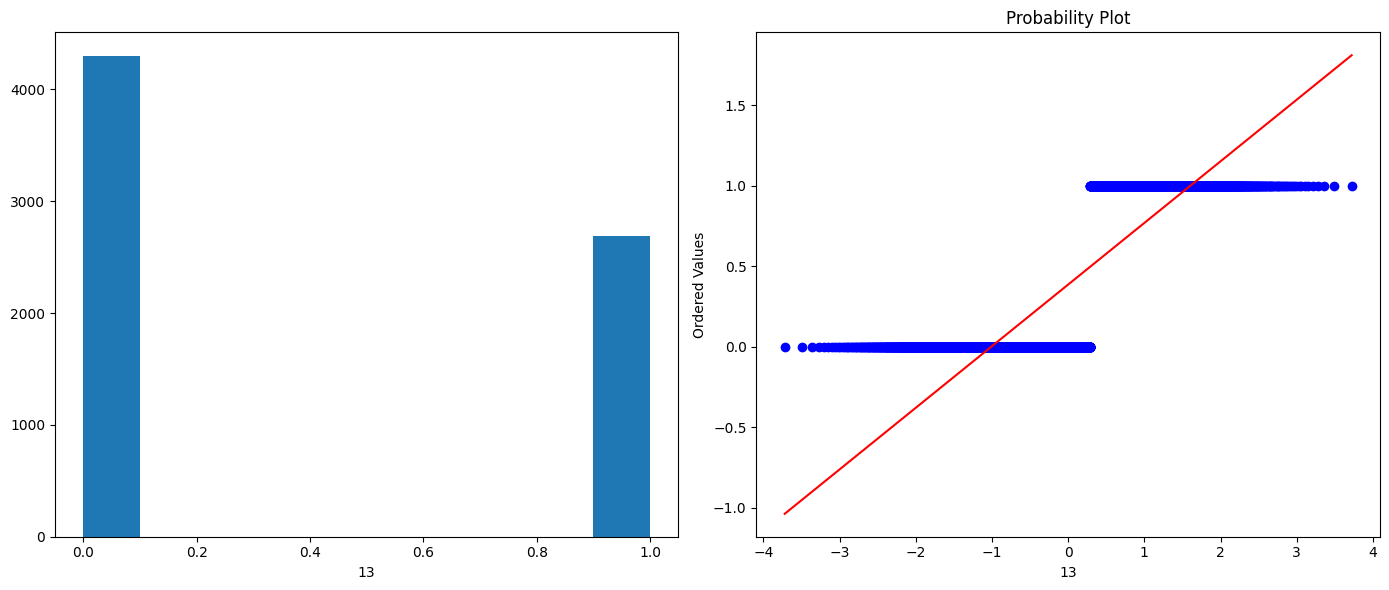

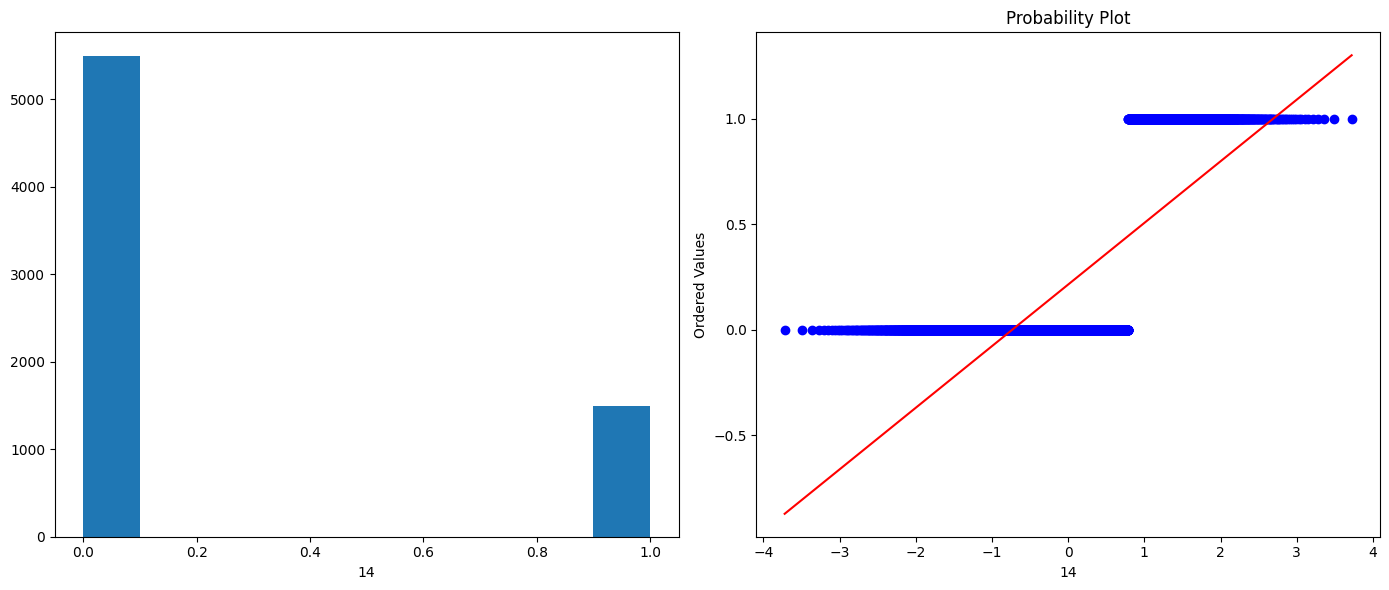

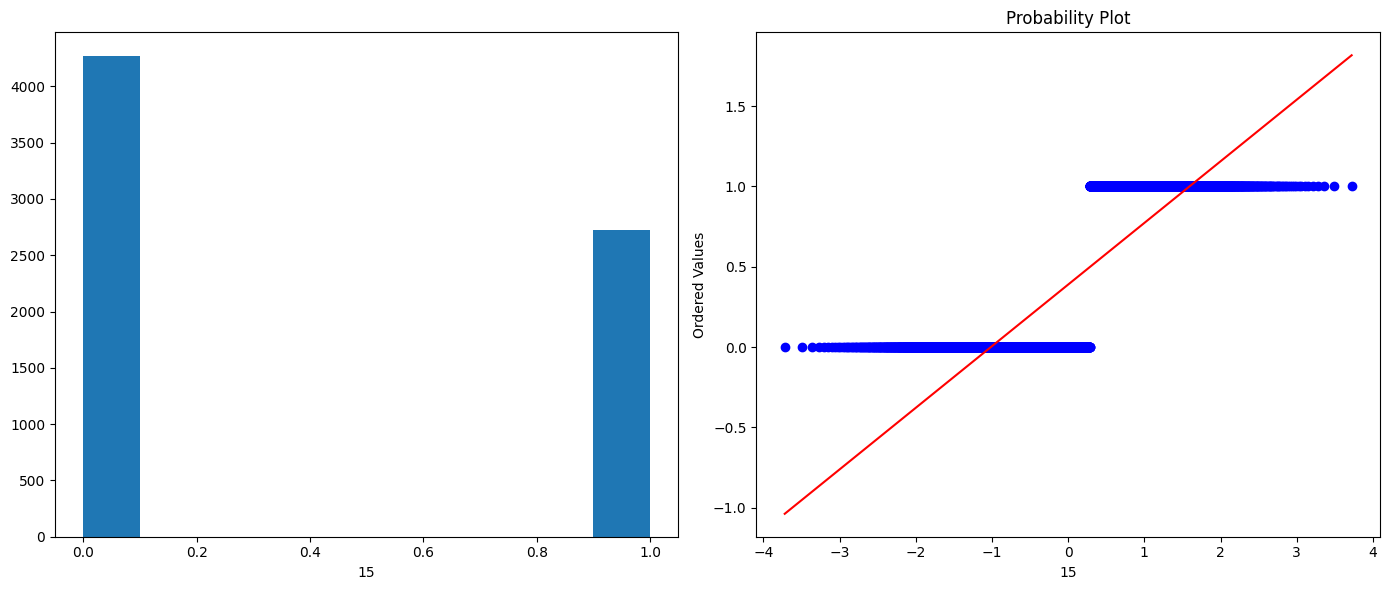

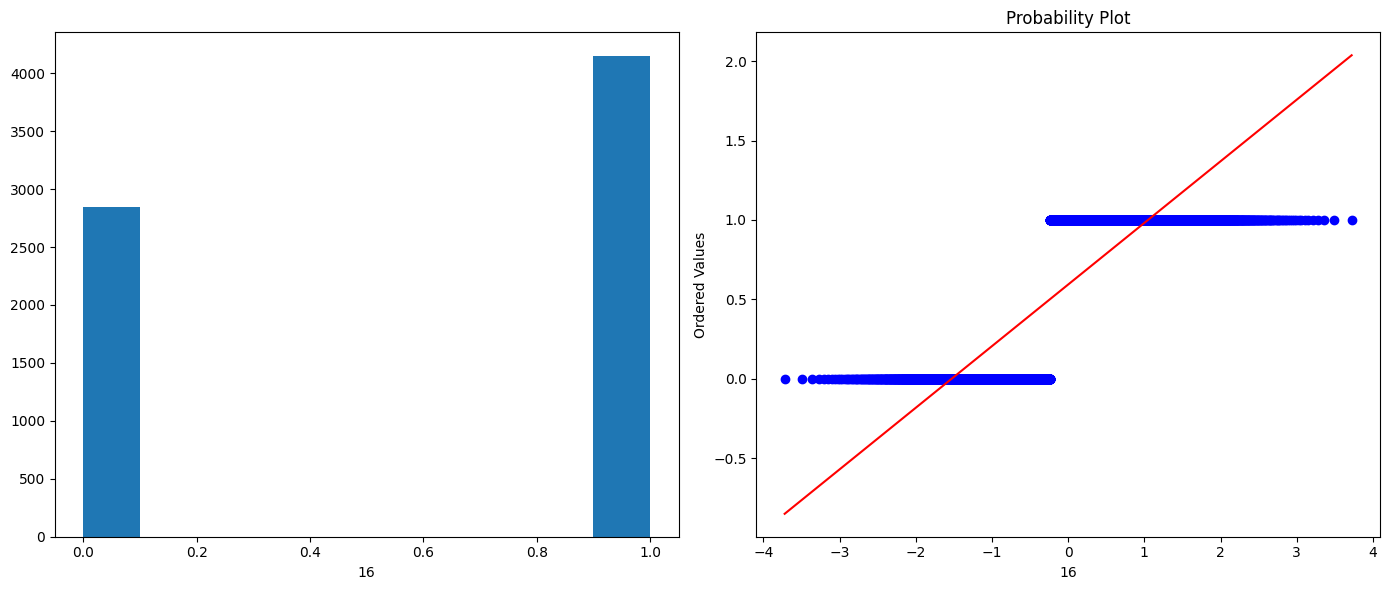

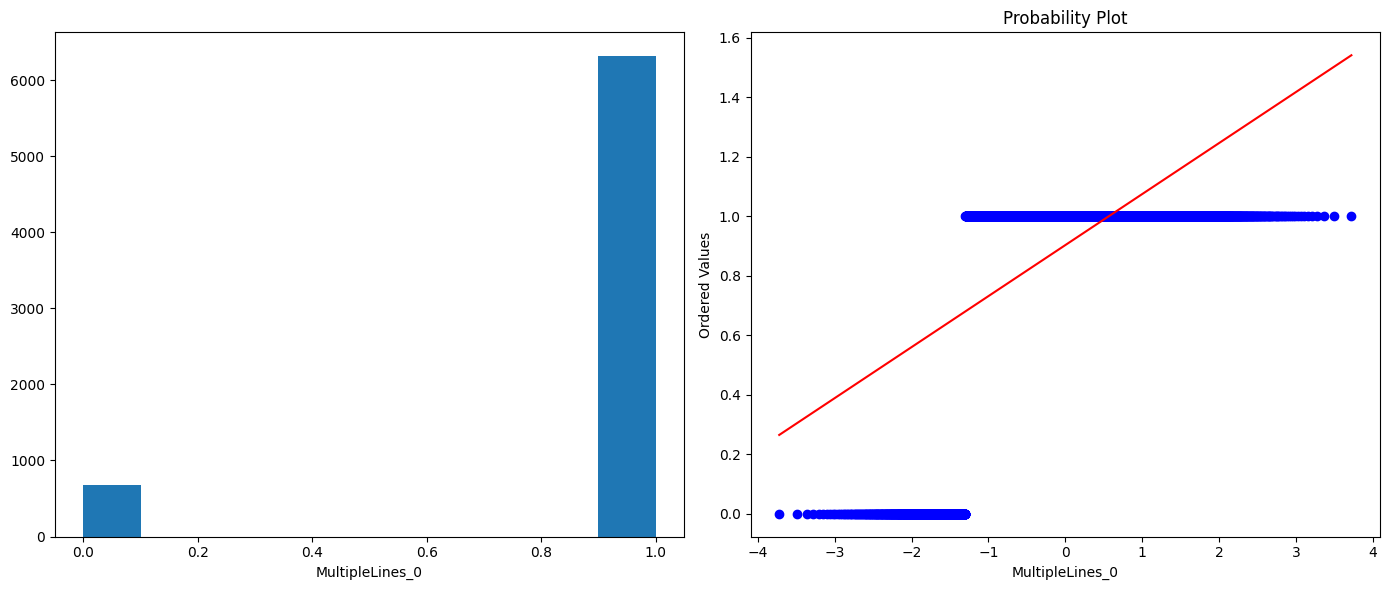

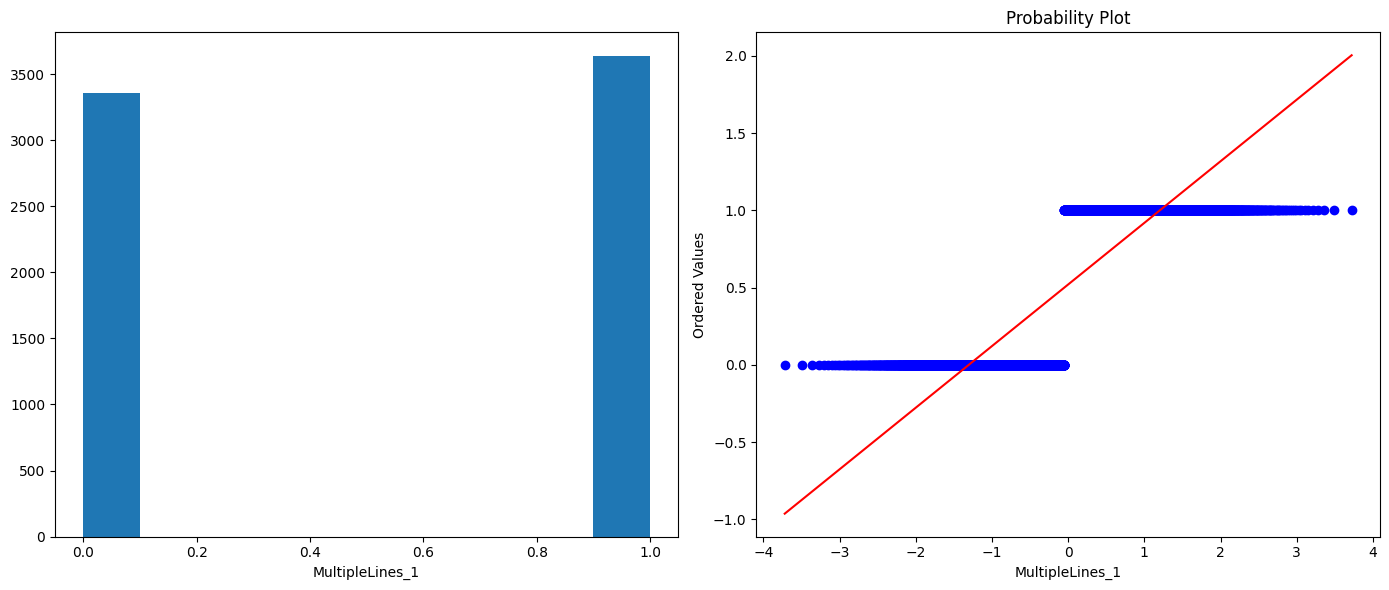

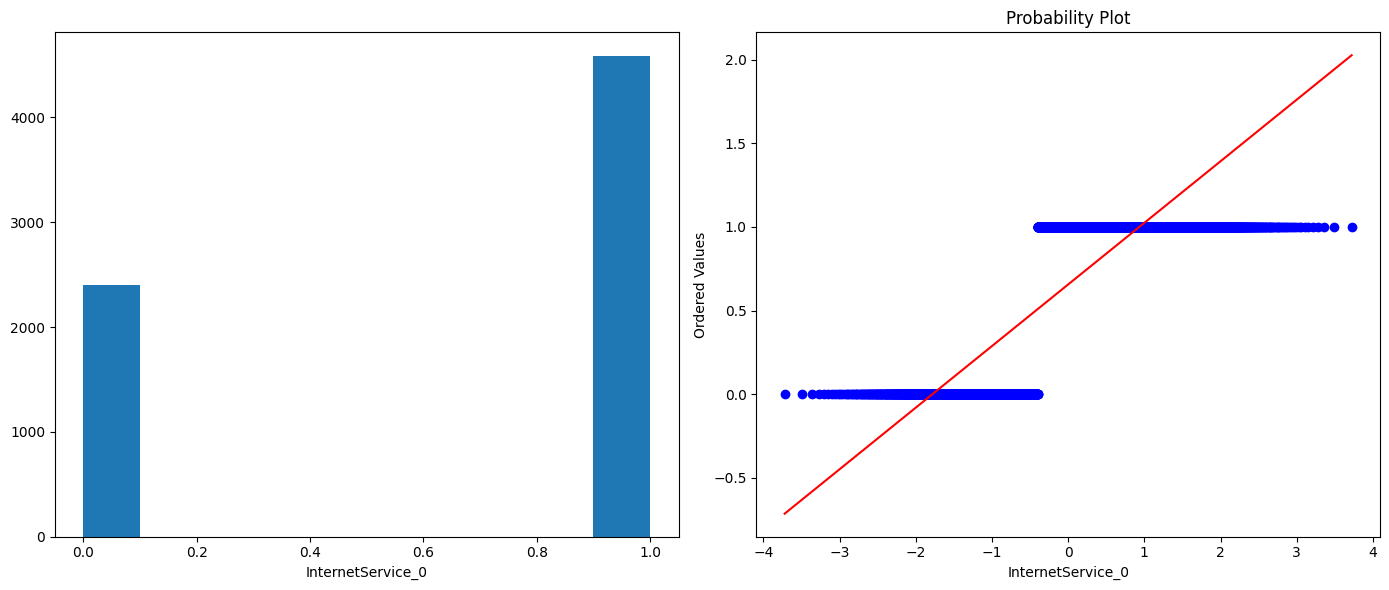

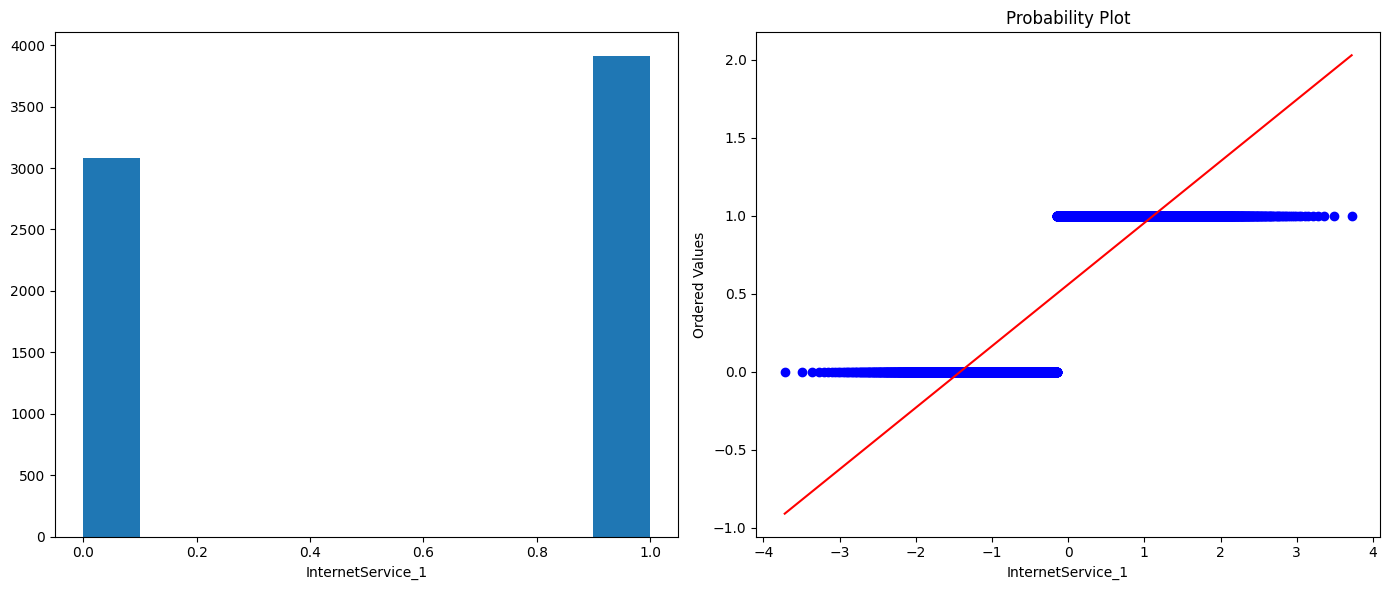

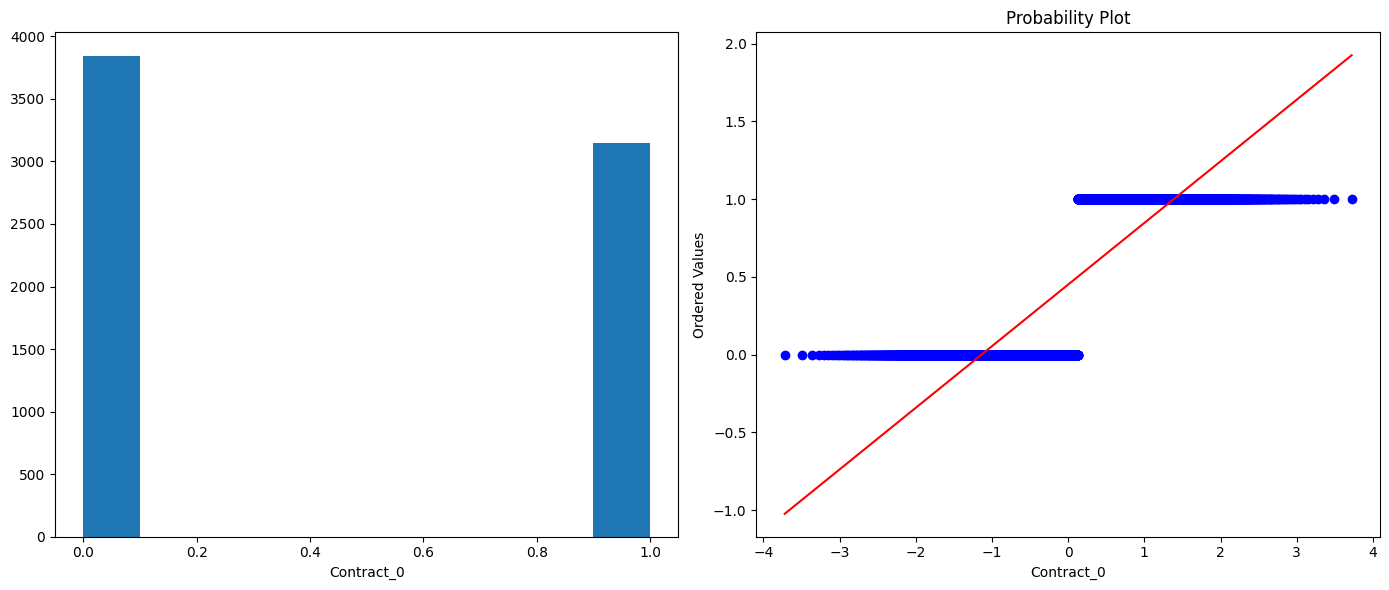

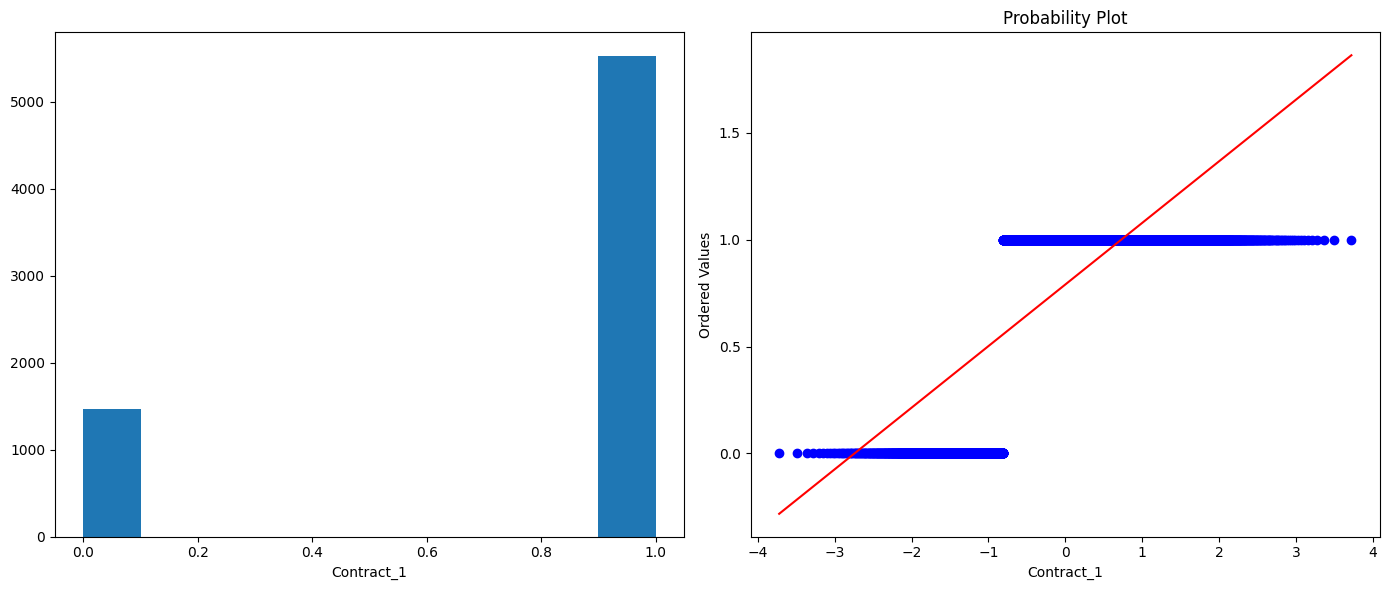

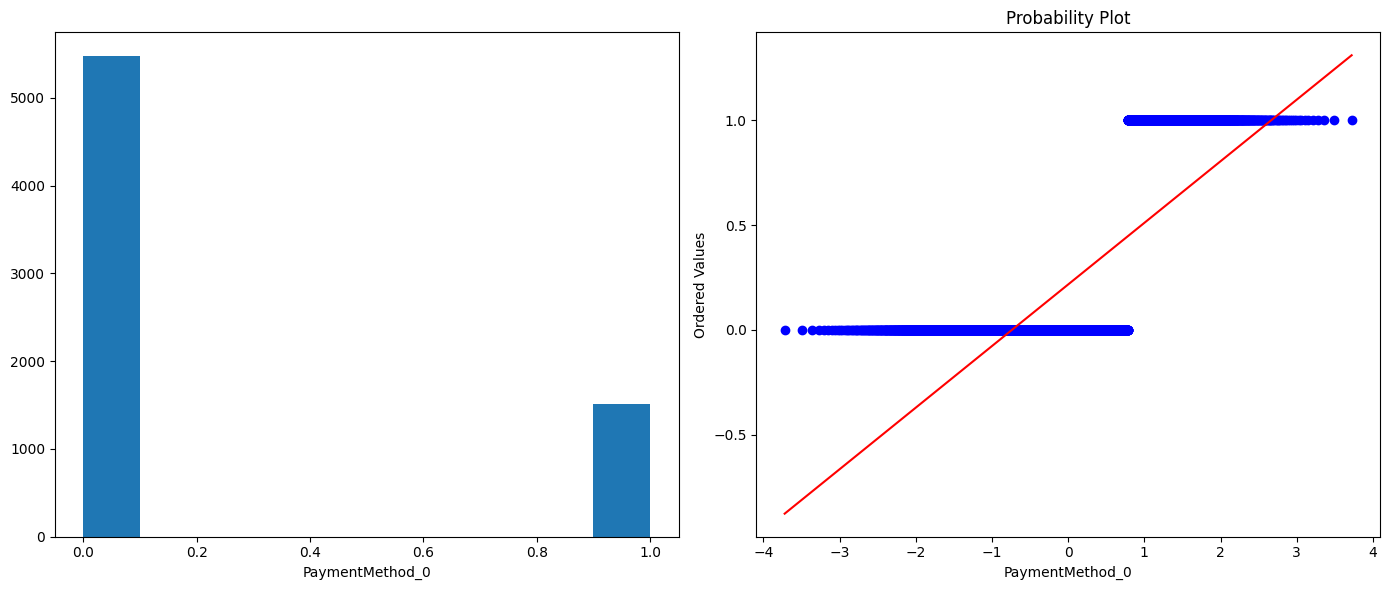

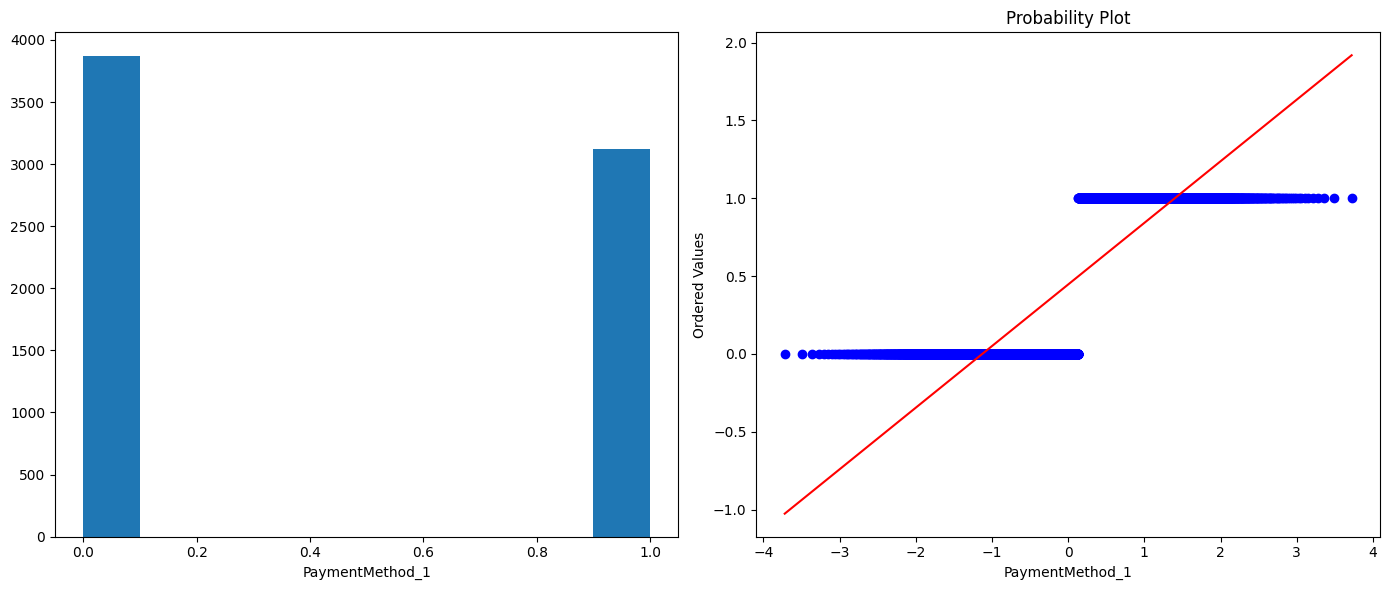

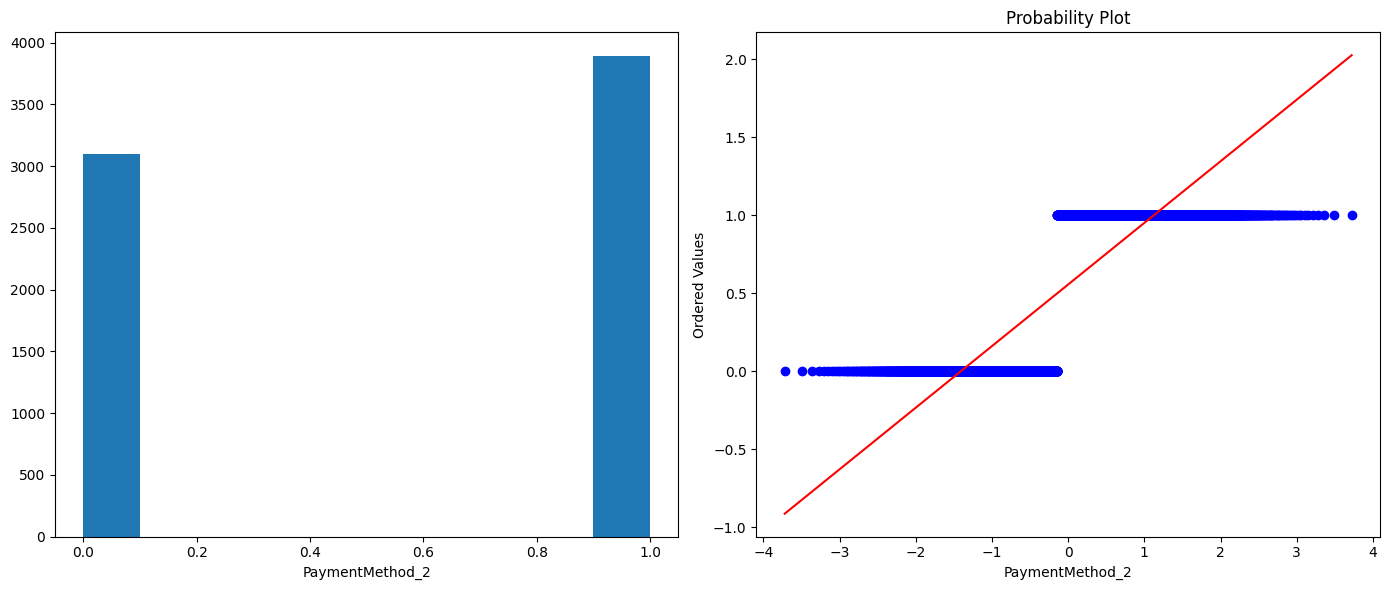

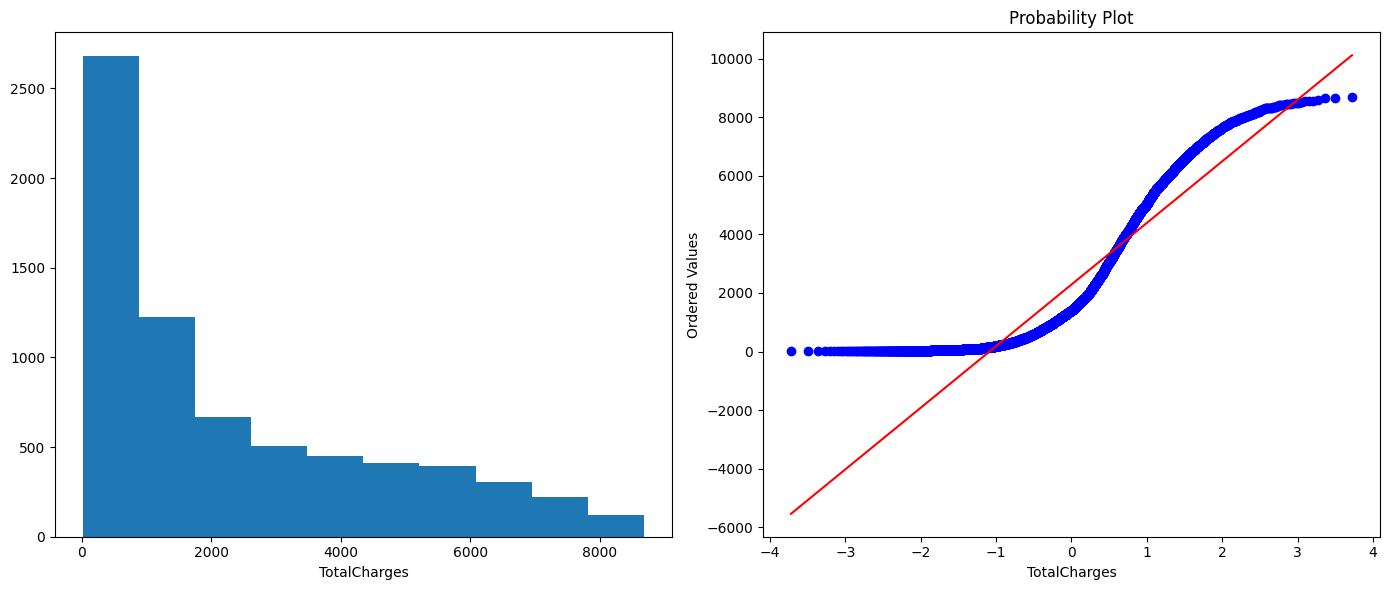

In [270]:
for i in x.columns:
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    
    ax[0].hist(x[i])
    ax[0].set_xlabel(i)
    
    
    stats.probplot(x[i], dist="norm", plot=ax[1])
    ax[1].set_xlabel(i)
    
    plt.tight_layout()
    plt.show()
 

# # Imbalance dataset

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
smote = SMOTE()

In [162]:
x1, y1 = smote.fit_resample(x, y)

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [163]:
y1.value_counts()

0    5136
1    5136
Name: churn, dtype: int64

# # Transformer through PowerTransformer

In [164]:
pt = PowerTransformer()

In [165]:
x1['TotalCharges'] = pt.fit_transform(x1[['TotalCharges']])
x1['MonthlyCharges'] = pt.fit_transform(x1[['MonthlyCharges']])
x1['MonthlyCharges'] = pt.fit_transform(x1[['MonthlyCharges']])

In [166]:
x1

SeniorCitizen  tenure  MonthlyCharges         0         1         2  \
0                  0       1       -1.280678  0.000000  0.000000  1.000000   
1                  0      34       -0.548033  0.000000  1.000000  0.000000   
2                  0       2       -0.643004  0.000000  1.000000  0.000000   
3                  0      45       -0.970065  0.000000  1.000000  0.000000   
4                  0       2       -0.080877  0.000000  0.000000  0.000000   
...              ...     ...             ...       ...       ...       ...   
10267              0      49        1.227736  0.000000  0.962895  0.000000   
10268              0      22        0.662514  0.000000  0.000000  0.000000   
10269              0       3        0.065835  1.000000  0.674093  0.325907   
10270              0      32        1.167960  0.000000  0.236328  0.000000   
10271              0      29        0.559024  0.670449  1.000000  0.670449   

              3         4         5         6  ...  MultipleLines_0  \
0      0.000000  0.000000  0.000000  0.000000  ...                0   
1      1.000000  0.000000  1.000000  0.000000  ...                1   
2      1.000000  0.000000  1.000000  0.000000  ...                1   
3      0.000000  0.000000  1.000000  0.000000  ...                0   
4      1.000000  0.000000  0.000000  0.000000  ...                1   
...         ...       ...       ...       ...  ...              ...   
10267  1.000000  0.037105  0.000000  0.037105  ...                1   
10268  1.000000  0.000000  1.000000  0.000000  ...                1   
10269  1.000000  0.674093  0.325907  0.674093  ...                1   
10270  1.000000  0.000000  0.000000  0.000000  ...                1   
10271  0.329551  0.000000  0.329551  0.000000  ...                1   

       MultipleLines_1  InternetService_0  InternetService_1  Contract_0  \
0                    1                  0                  1           0   
1                    0                  0                  1           1   
2                    0                  0                  1           0   
3                    1                  0                  1           1   
4                    0                  1                  0           0   
...                ...                ...                ...         ...   
10267                1                  1                  0           0   
10268                0                  1                  0           0   
10269                1                  1                  0           0   
10270                1                  1                  0           0   
10271                1                  1                  0           0   

       Contract_1  PaymentMethod_0  PaymentMethod_1  PaymentMethod_2  \
0               1                0                0                1   
1               0                0                1                0   
2               1                0                1                0   
3               0                0                1                1   
4               1                0                0                1   
...           ...              ...              ...              ...   
10267           0                0                0                0   
10268           1                0                0                1   
10269           1                1                0                0   
10270           0                0                0                1   
10271           1                0                0                1   

       TotalCharges  
0         -1.741862  
1          0.399689  
2         -1.262898  
3          0.379661  
4         -1.113647  
...             ...  
10267      1.215337  
10268      0.444667  
10269     -0.916811  
10270      0.790726  
10271      0.603116  

[10272 rows x 30 columns]

# Distribution after Transformtion through PowerTransformtion

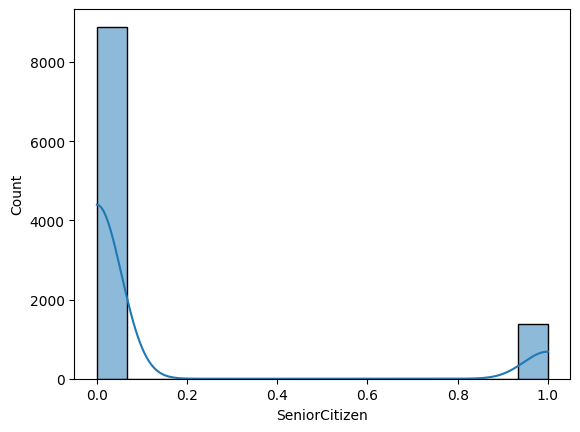

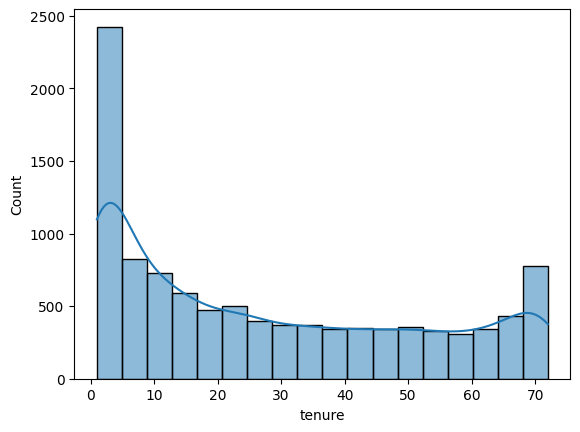

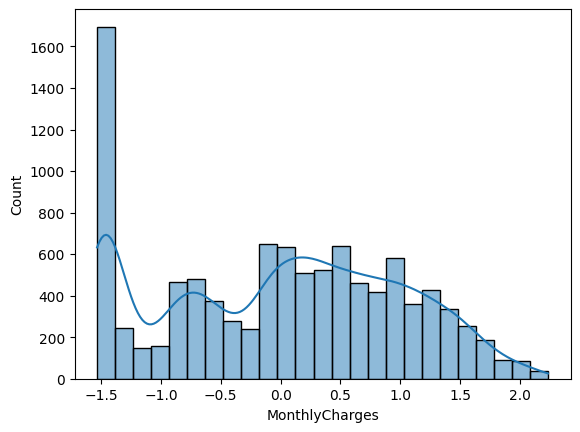

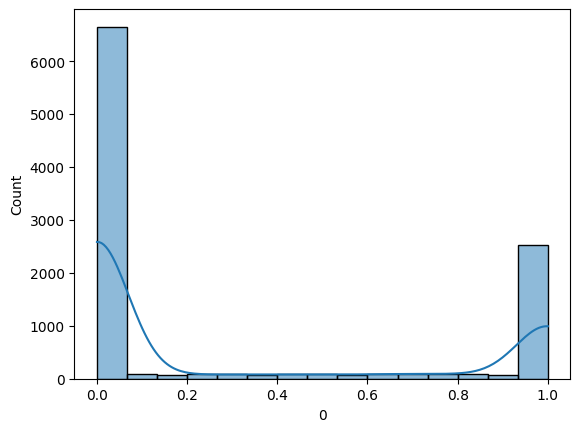

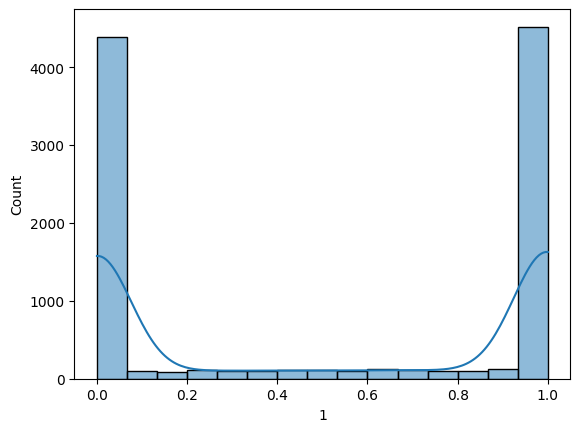

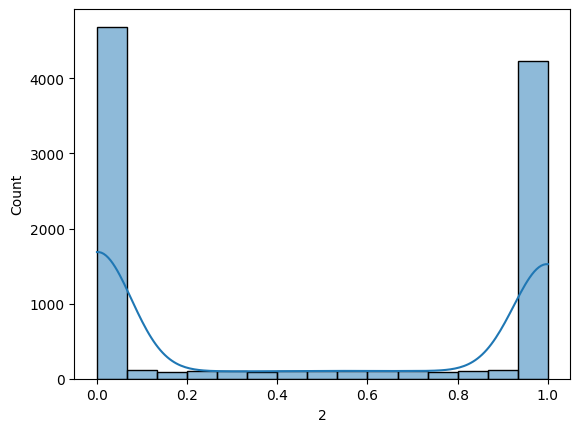

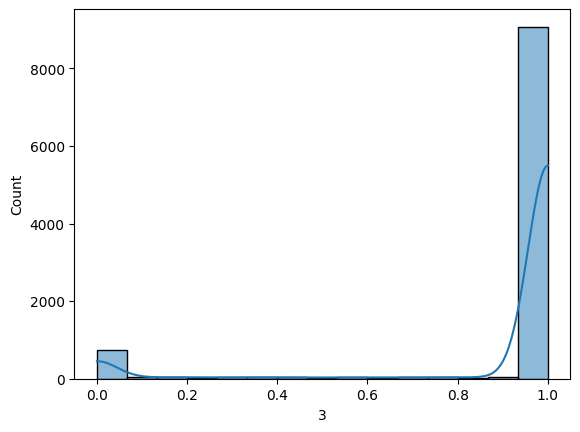

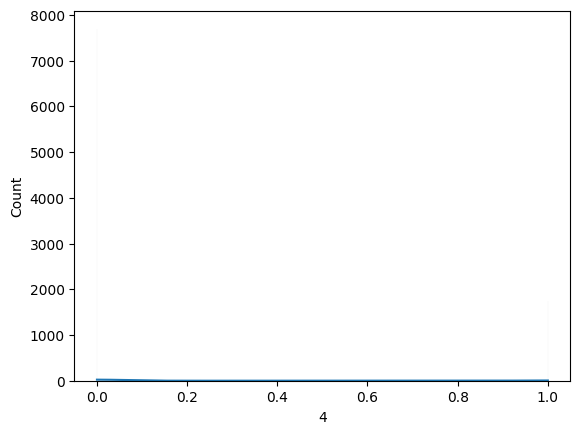

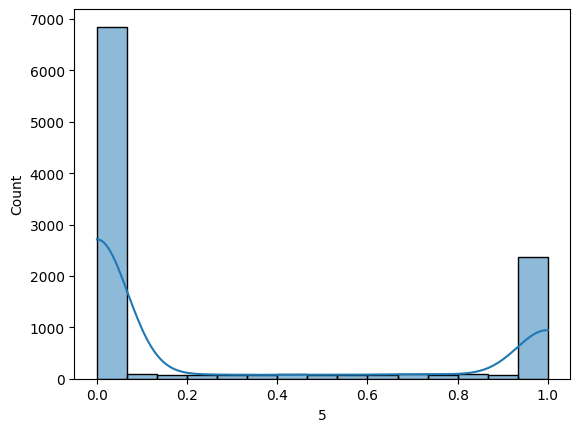

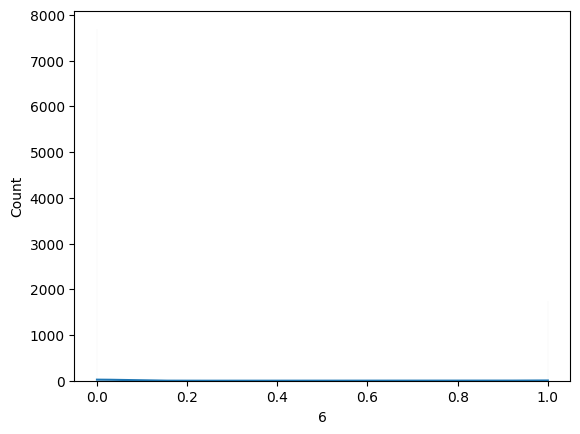

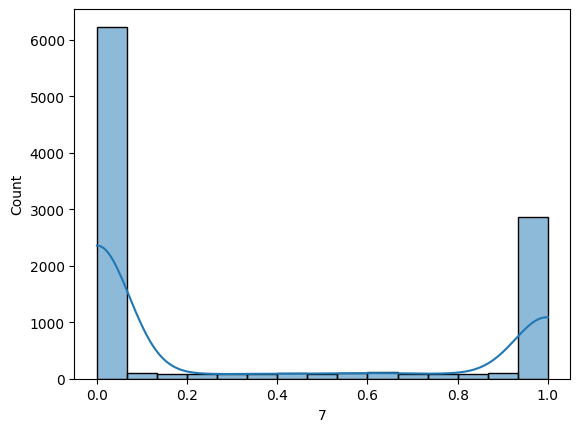

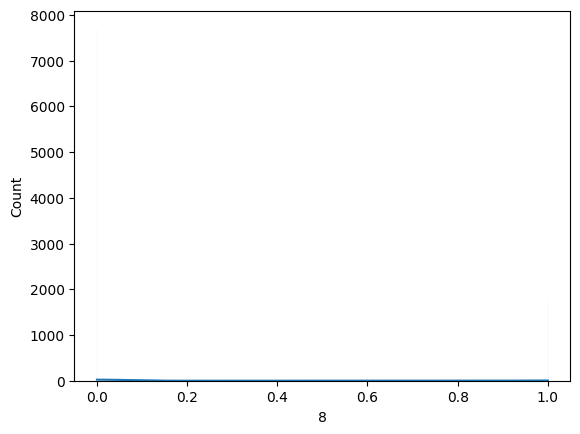

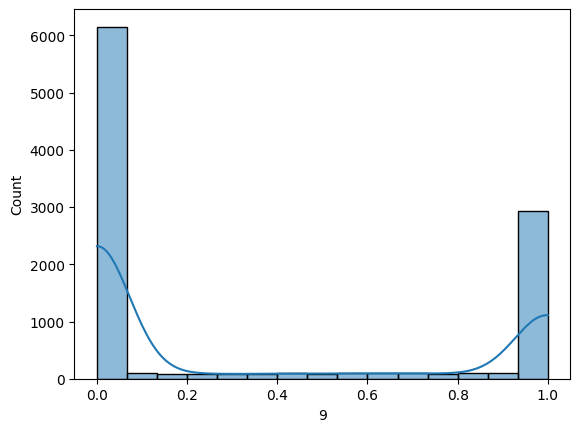

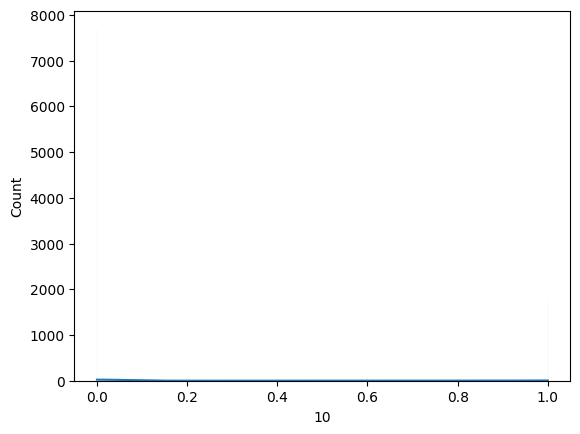

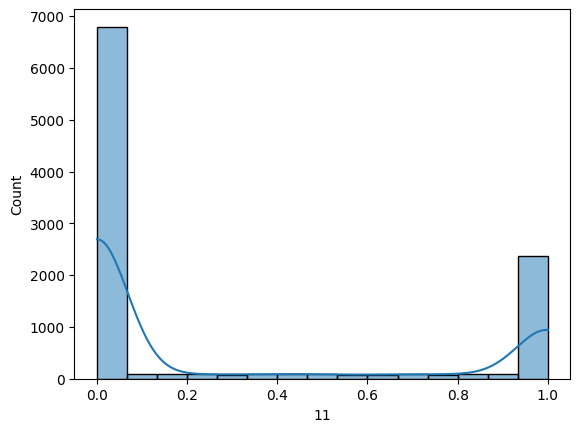

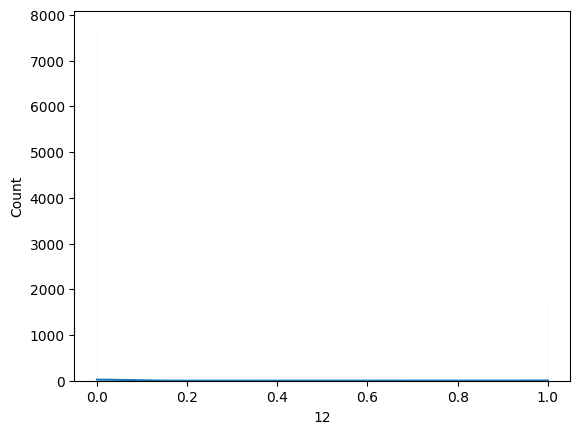

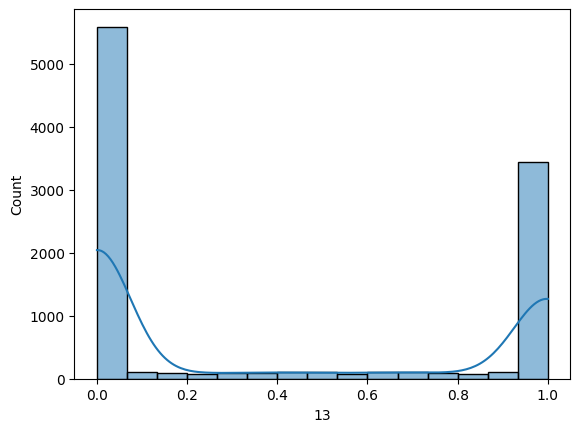

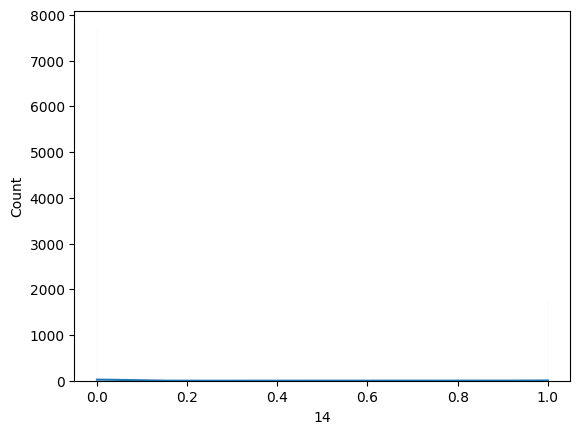

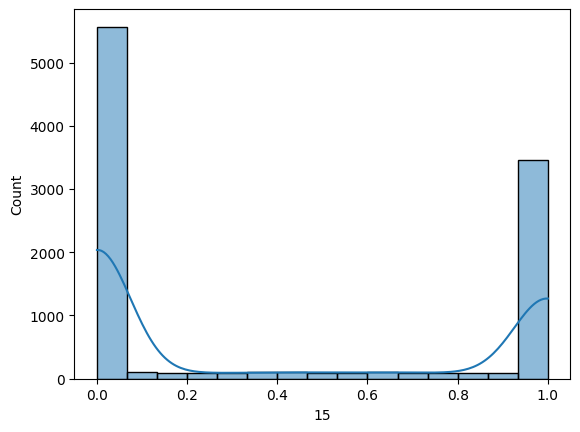

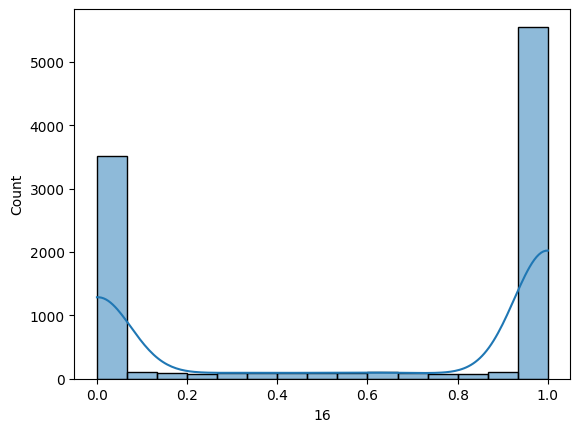

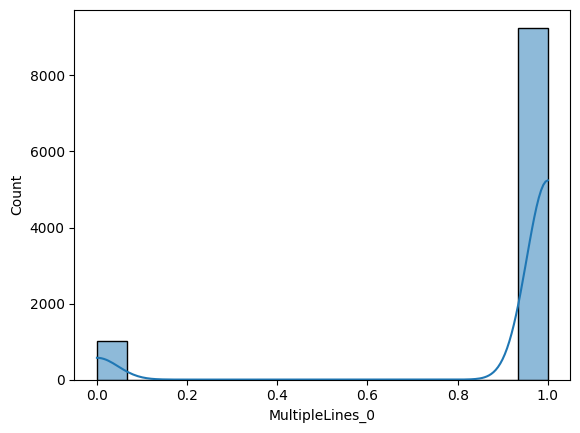

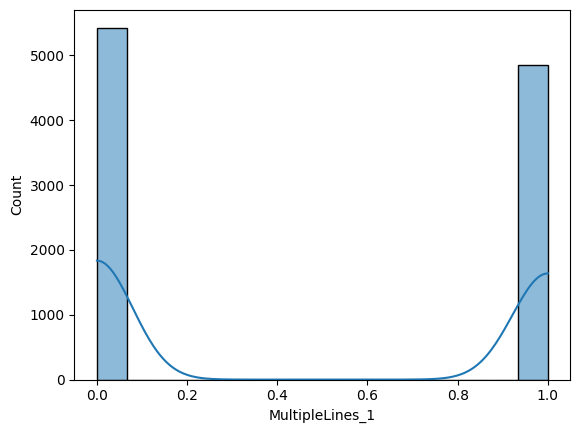

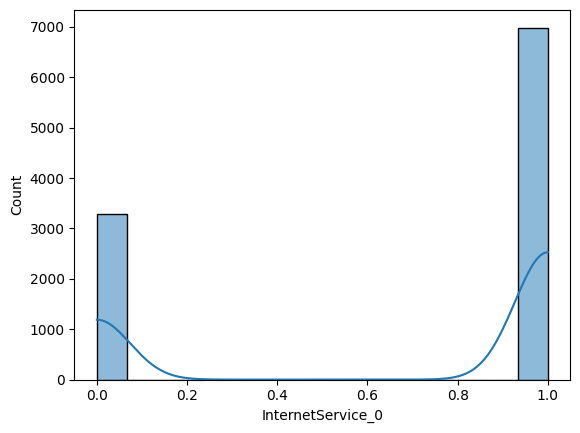

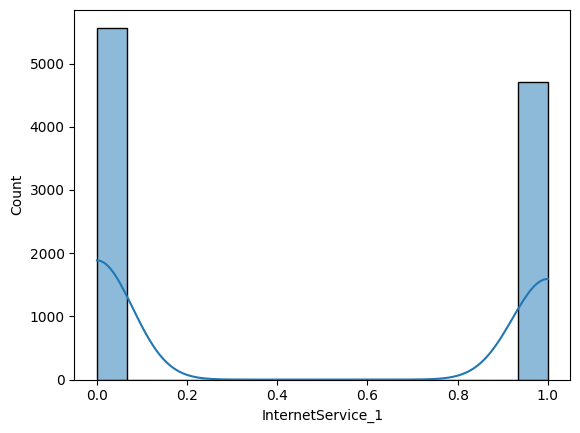

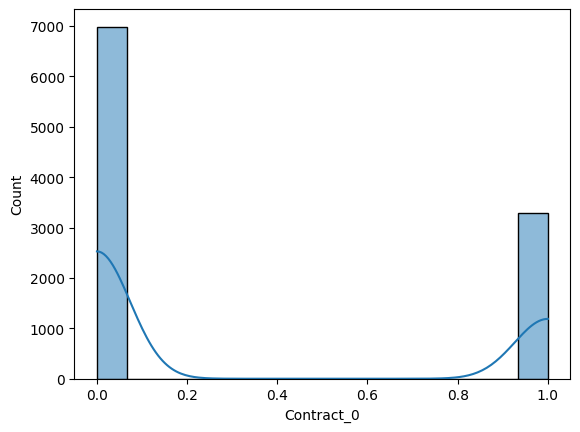

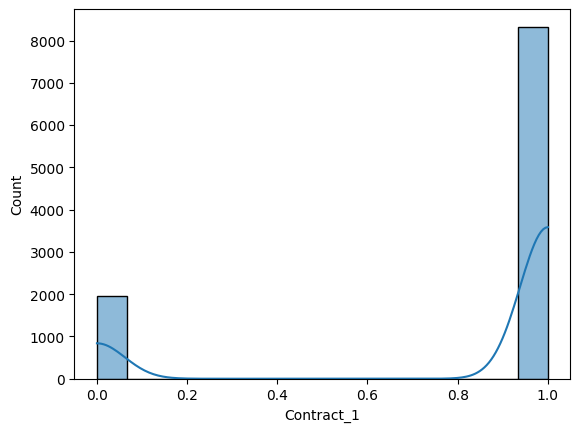

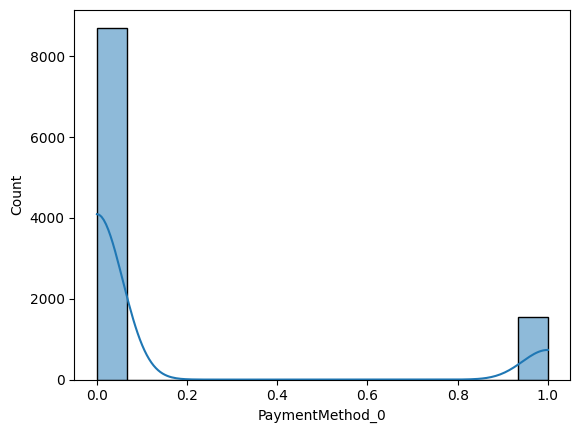

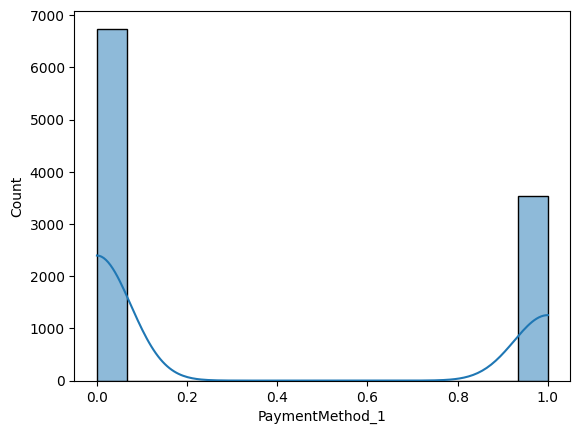

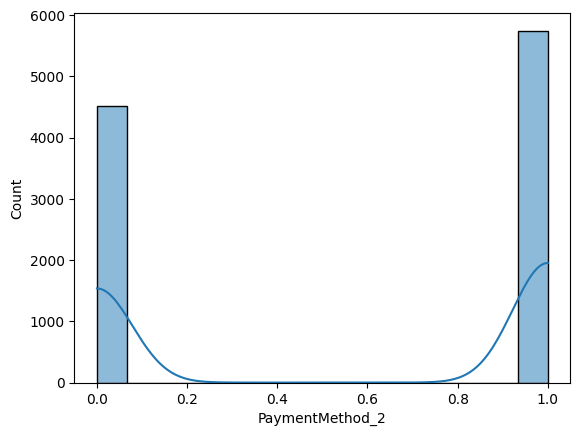

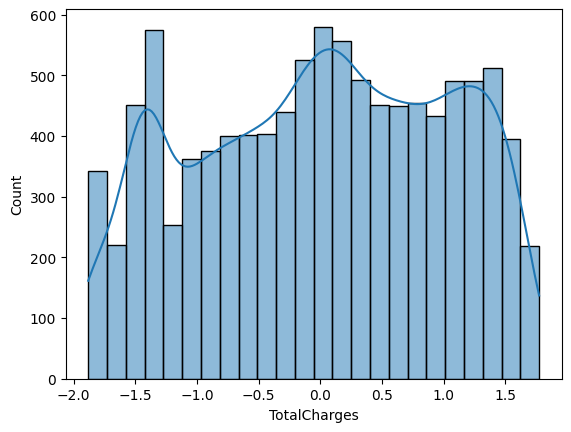

In [167]:
for i in x1.columns:
    sns.histplot(data=x1, x=i, kde=True)
    plt.show()

# # Standard Scaler

In [168]:
from sklearn.preprocessing import RobustScaler

In [169]:
st = RobustScaler()

In [170]:
x_scaled = pd.DataFrame(st.fit_transform(x1))

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [171]:
x_scaled

0         1         2         3         4         5         6   \
0      0.0 -0.465116 -0.828074  0.000000 -0.554915  0.644323 -1.000000   
1      0.0  0.302326 -0.383511  0.000000  0.445085 -0.355677  0.000000   
2      0.0 -0.441860 -0.441138  0.000000  0.445085 -0.355677  0.000000   
3      0.0  0.558140 -0.639596  0.000000  0.445085 -0.355677 -1.000000   
4      0.0 -0.441860 -0.100045  0.000000 -0.554915 -0.355677  0.000000   
...    ...       ...       ...       ...       ...       ...       ...   
10267  0.0  0.651163  0.694010  0.000000  0.407980 -0.355677  0.000000   
10268  0.0  0.023256  0.351038  0.000000 -0.554915 -0.355677  0.000000   
10269  0.0 -0.418605 -0.011021  1.101886  0.119177 -0.029770  0.000000   
10270  0.0  0.255814  0.657738  0.000000 -0.318588 -0.355677  0.000000   
10271  0.0  0.186047  0.288241  0.738758  0.445085  0.314772 -0.670449   

               7         8           9   ...   20   21   22   23   24   25  \
0        0.000000  0.000000    0.000000  ... -1.0  1.0 -1.0  1.0  0.0  0.0   
1        0.000000  1.302531    0.000000  ...  0.0  0.0 -1.0  1.0  1.0 -1.0   
2        0.000000  1.302531    0.000000  ...  0.0  0.0 -1.0  1.0  0.0  0.0   
3        0.000000  1.302531    0.000000  ... -1.0  1.0 -1.0  1.0  1.0 -1.0   
4        0.000000  0.000000    0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...       ...         ...  ...  ...  ...  ...  ...  ...  ...   
10267    7.341354  0.000000    7.341354  ...  0.0  1.0  0.0  0.0  0.0 -1.0   
10268    0.000000  1.302531    0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0   
10269  133.372765  0.424504  133.372765  ...  0.0  1.0  0.0  0.0  0.0  0.0   
10270    0.000000  0.000000    0.000000  ...  0.0  1.0  0.0  0.0  0.0 -1.0   
10271    0.000000  0.429251    0.000000  ...  0.0  1.0  0.0  0.0  0.0  0.0   

        26   27   28        29  
0      0.0  0.0  0.0 -1.072024  
1      0.0  1.0 -1.0  0.210387  
2      0.0  1.0 -1.0 -0.785209  
3      0.0  1.0  0.0  0.198394  
4      0.0  0.0  0.0 -0.695834  
...    ...  ...  ...       ...  
10267  0.0  0.0 -1.0  0.698816  
10268  0.0  0.0  0.0  0.237321  
10269  1.0  0.0 -1.0 -0.577965  
10270  0.0  0.0  0.0  0.444549  
10271  0.0  0.0  0.0  0.332203  

[10272 rows x 30 columns]

# RFE Selector

In [177]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf = RandomForestClassifier()

In [182]:
sfs = SequentialFeatureSelector(k_features='best', estimator=rf, cv=3)

In [183]:
sfs.fit(x_scaled, y1)

SequentialFeatureSelector(cv=3, estimator=RandomForestClassifier(),
                          k_features=(1, 30), scoring='accuracy')

In [184]:
features = list(sfs.k_feature_names_)


In [185]:
selected = x_scaled[features]

In [186]:
selected

1         2         4         5         6           7   \
0     -0.465116 -0.828074 -0.554915  0.644323 -1.000000    0.000000   
1      0.302326 -0.383511  0.445085 -0.355677  0.000000    0.000000   
2     -0.441860 -0.441138  0.445085 -0.355677  0.000000    0.000000   
3      0.558140 -0.639596  0.445085 -0.355677 -1.000000    0.000000   
4     -0.441860 -0.100045 -0.554915 -0.355677  0.000000    0.000000   
...         ...       ...       ...       ...       ...         ...   
10267  0.651163  0.694010  0.407980 -0.355677  0.000000    7.341354   
10268  0.023256  0.351038 -0.554915 -0.355677  0.000000    0.000000   
10269 -0.418605 -0.011021  0.119177 -0.029770  0.000000  133.372765   
10270  0.255814  0.657738 -0.318588 -0.355677  0.000000    0.000000   
10271  0.186047  0.288241  0.445085  0.314772 -0.670449    0.000000   

               9           11          13          15          17   20   23  \
0        0.000000    0.000000    0.000000    0.000000    0.000000 -1.0  1.0   
1        0.000000    0.000000    0.000000    0.000000    0.000000  0.0  1.0   
2        0.000000    0.000000    0.000000    0.000000    0.000000  0.0  1.0   
3        0.000000    0.000000    0.000000    0.000000    0.000000 -1.0  1.0   
4        0.000000    0.000000    0.000000    0.000000    0.000000  0.0  0.0   
...           ...         ...         ...         ...         ...  ...  ...   
10267    7.341354    7.341354    7.341354    7.341354    7.341354  0.0  0.0   
10268    0.000000    0.000000    0.000000    0.000000    0.000000  0.0  0.0   
10269  133.372765  133.372765  133.372765  133.372765  133.372765  0.0  0.0   
10270    0.000000    0.000000    0.000000    0.000000    0.000000  0.0  0.0   
10271    0.000000    0.000000    0.000000    0.000000    0.000000  0.0  0.0   

        24   25   26   27        29  
0      0.0  0.0  0.0  0.0 -1.072024  
1      1.0 -1.0  0.0  1.0  0.210387  
2      0.0  0.0  0.0  1.0 -0.785209  
3      1.0 -1.0  0.0  1.0  0.198394  
4      0.0  0.0  0.0  0.0 -0.695834  
...    ...  ...  ...  ...       ...  
10267  0.0 -1.0  0.0  0.0  0.698816  
10268  0.0  0.0  0.0  0.0  0.237321  
10269  0.0  0.0  1.0  0.0 -0.577965  
10270  0.0 -1.0  0.0  0.0  0.444549  
10271  0.0  0.0  0.0  0.0  0.332203  

[10272 rows x 18 columns]

# # Train Test Split

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train, x_test, y_train, y_test = train_test_split(selected, y1, test_size=0.25, random_state=42, stratify=y1)

In [189]:
y_test.value_counts()

0    1284
1    1284
Name: churn, dtype: int64

In [190]:
y_train.value_counts()

1    3852
0    3852
Name: churn, dtype: int64

# # Model Building 

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [192]:
models = {'Logistic' : LogisticRegression(), 'SVC' : SVC(), 'DecisionTreeClassifier' : DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'GaussianNB': GaussianNB(), 'AdaBoostClassifier': AdaBoostClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier(), 'KNeighborsClassifier': KNeighborsClassifier()}

In [193]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('accuracy_score', accuracy_score(y_train, y_pred_train))
    print('accuracy_score', accuracy_score(y_test, y_pred_test))
    print('..........................................')
    print('roc_auc_score', roc_auc_score(y_train, y_pred_train))
    print('roc_auc_score', roc_auc_score(y_test, y_pred_test))
    print('...............................................')
    print('confusion_matrix_train')
    print(confusion_matrix(y_train, y_pred_train))
    print('confusion_matrix on test')
    print(confusion_matrix(y_test, y_pred_test))
    print('..................................')
    print(classification_report(y_train, y_pred_train))
    print('...............................')
    print(classification_report(y_test, y_pred_test))
    

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Logistic
accuracy_score 0.8120456905503635
accuracy_score 0.8134735202492211
..........................................
roc_auc_score 0.8120456905503635
roc_auc_score 0.8134735202492211
...............................................
confusion_matrix_train
[[3077  775]
 [ 673 3179]]
confusion_matrix on test
[[1010  274]
 [ 205 1079]]
..................................
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3852
           1       0.80      0.83      0.81      3852

    accuracy                           0.81      7704
   macro avg       0.81      0.81      0.81      7704
weighted avg       0.81      0.81      0.81      7704

...............................
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1284
           1       0.80      0.84      0.82      1284

    accuracy                           0.81      2568
   m

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KNeighborsClassifier
accuracy_score 0.8701973001038421
accuracy_score 0.8267133956386293
..........................................
roc_auc_score 0.8701973001038421
roc_auc_score 0.8267133956386292
...............................................
confusion_matrix_train
[[3361  491]
 [ 509 3343]]
confusion_matrix on test
[[1050  234]
 [ 211 1073]]
..................................
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3852
           1       0.87      0.87      0.87      3852

    accuracy                           0.87      7704
   macro avg       0.87      0.87      0.87      7704
weighted avg       0.87      0.87      0.87      7704

...............................
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1284
           1       0.82      0.84      0.83      1284

    accuracy                           0.83   

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# # Cross_val_score

In [194]:
for model_name, model in models.items():
    train_scores = cross_val_score(model, x_train, y_train, cv=5)
    test_scores = cross_val_score(model, x_test, y_test, cv=5)
    print(model_name)
    print('Train Scores:', train_scores.mean())
    print('Test Scores:', test_scores.mean())

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic
Train Scores: 0.8080232097558507
Test Scores: 0.8122989054998067
SVC
Train Scores: 0.5726890954600233
Test Scores: 0.5712615954065882
DecisionTreeClassifier
Train Scores: 0.7955614080922322
Test Scores: 0.7807813957721801
RandomForestClassifier
Train Scores: 0.8393045500897545
Test Scores: 0.8302204928664072
GaussianNB
Train Scores: 0.7745339929376269
Test Scores: 0.7737501991034655
AdaBoostClassifier
Train Scores: 0.8416412011090791
Test Scores: 0.8426817150962144
GradientBoostingClassifier
Train Scores: 0.8504674819016156
Test Scores: 0.8461821436427212


C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier
Train Scores: 0.8068545471400761
Test Scores: 0.8076326787569876


C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# # GradientBoostingClassifier

In [195]:
gd = GradientBoostingClassifier()

In [196]:
max_train = 0.0
min_test = 0.0
random_state = 0.0
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(selected, y1, test_size=0.25, random_state=i, stratify=y1)
    gd.fit(x_train, y_train)
    y_predtrains = gd.predict(x_train)
    y_predtests = gd.predict(x_test)
    accuracy_score_train = accuracy_score(y_train, y_predtrains)
    accuracy_score_test = accuracy_score(y_test, y_predtests)
    if accuracy_score_train > max_train and accuracy_score_test > min_test:
        max_train = accuracy_score_train
        min_test = accuracy_score_test
        random_state = i
        

In [226]:
max_train

1.0

In [227]:
min_test

0.8605919003115264

In [225]:
random_state

0

In [228]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_scaled, y1, test_size=0.25, random_state=0, stratify=y1)

In [229]:
gd1 = AdaBoostClassifier()
gd.fit(x_train0, y_train0)
y_predtrain9 = gd.predict(x_train0)
y_predtest9 = gd.predict(x_test0)

In [230]:
print('accuracy_score', accuracy_score(y_train0, y_predtrain9))
print('accuracy_score', accuracy_score(y_test0, y_predtest9))
print('..........................................')
print('roc_auc_score', roc_auc_score(y_train0, y_predtrain9))
print('roc_auc_score', roc_auc_score(y_test0, y_predtest9))
print('...............................................')
print('confusion_matrix_train')
print(confusion_matrix(y_train0, y_predtrain9))
print('confusion_matrix on test')
print(confusion_matrix(y_test0, y_predtest9))
print('..................................')
print('classification_report on training')
print(classification_report(y_train0, y_predtrain9))
print('...............................')
print('classification_report on test')
print(classification_report(y_test0, y_predtest9))

accuracy_score 0.8752596053997923
accuracy_score 0.8566978193146417
..........................................
roc_auc_score 0.8752596053997923
roc_auc_score 0.8566978193146418
...............................................
confusion_matrix_train
[[3403  449]
 [ 512 3340]]
confusion_matrix on test
[[1118  166]
 [ 202 1082]]
..................................
classification_report on training
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3852
           1       0.88      0.87      0.87      3852

    accuracy                           0.88      7704
   macro avg       0.88      0.88      0.88      7704
weighted avg       0.88      0.88      0.88      7704

...............................
classification_report on test
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1284
           1       0.87      0.84      0.85      1284

    accuracy                           0.86      25

# # cross_val_score

In [231]:
train_scores1 = cross_val_score(gd1, x_train0, y_train0, cv=5)
test_scores1 = cross_val_score(gd1, x_test0, y_test0, cv=5)
print('Train Scores:', train_scores1.mean())
print('Test Scores:', test_scores1.mean())

Train Scores: 0.8481313365414598
Test Scores: 0.842687024521962


# # Randomized search CV

In [232]:
from sklearn.model_selection import RandomizedSearchCV

In [233]:
gd2 = GradientBoostingClassifier()

In [234]:
param_grid1 = {
    'learning_rate': [0.1, 0.01, 0.001],  
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
}

In [235]:
grid_search = RandomizedSearchCV(gd2, param_distributions = param_grid1, cv=3, scoring='accuracy')
grid_search.fit(x_train0, y_train0)

best_params = grid_search.best_params_

In [236]:
best_params

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 3,
 'learning_rate': 0.1}

# # after applying Hyperparameter tuning

In [237]:
gd2 = GradientBoostingClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=3, learning_rate=0.1)

In [238]:
gd2.fit(x_train0, y_train0)
y_predtrains9 = gd2.predict(x_train0)
y_predtests9 = gd2.predict(x_test0)
accuracy_score_train9 = accuracy_score(y_train0, y_predtrains9)
accuracy_score_test9 = accuracy_score(y_test0, y_predtests9)
print('accuracy_score_train', accuracy_score_train9, 'accuracy_score_test', accuracy_score_test9)

accuracy_score_train 0.897196261682243 accuracy_score_test 0.8551401869158879


In [239]:
train_scores2 = cross_val_score(gd2, x_train0, y_train0, cv=5)
test_scores2 = cross_val_score(gd2, x_test0, y_test0, cv=5)
print('Train Scores:', train_scores2.mean())
print('Test Scores:', test_scores2.mean())

Train Scores: 0.8602029378797711
Test Scores: 0.8426877830113545


# RandomForestClassifier

In [207]:
rfc1 = RandomForestClassifier()

In [218]:
max_train = 0.0
min_test = 0.0
random_state = 0
for i in range(1000):
    x_train3, x_test3, y_train3, y_test3 = train_test_split(x_scaled, y1, test_size=0.25, random_state=i, stratify=y1)
    rfc1.fit(x_train3, y_train3)
    y_predtrains1 = rfc1.predict(x_train3)
    y_predtests1 = rfc1.predict(x_test3)
    accuracy_score_train1 = accuracy_score(y_train3, y_predtrains1)
    accuracy_score_test1 = accuracy_score(y_test3, y_predtests1)
    if accuracy_score_train1 > max_train and accuracy_score_test1 > min_test:
        max_train = accuracy_score_train1
        min_test = accuracy_score_test1
        random_state = i
        

In [221]:
max_train

1.0

In [220]:
min_test

0.8605919003115264

In [219]:
random_state

0

In [306]:
rfc2 = RandomForestClassifier(max_depth=8)

In [313]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_scaled, y1, test_size=0.25, random_state=255, stratify=y1)

In [314]:
rfc2.fit(x_train3, y_train3)
y_predtrains2 = rfc2.predict(x_train3)
y_predtests2 = rfc2.predict(x_test3)
accuracy_score_train3 = accuracy_score(y_train3, y_predtrains2)
accuracy_score_test3 = accuracy_score(y_test3, y_predtests2)
print('accuracy_score_train', accuracy_score_train3, 'accuracy_score_test', accuracy_score_test3)

accuracy_score_train 0.8759086188992731 accuracy_score_test 0.8535825545171339


# Confusion_Matrix

In [334]:
print('accuracy_on_traning')
print(confusion_matrix(y_train3, y_predtrains2))

accuracy_on_traning
[[3296  556]
 [ 400 3452]]


In [337]:
print('accuracy_on_test')
print(confusion_matrix(y_test3, y_predtests2))

accuracy_on_test
[[1069  215]
 [ 161 1123]]


# #RandomizedSearchCV

In [243]:
from sklearn.model_selection import RandomizedSearchCV

In [244]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt']  
}

In [245]:
grid_search = RandomizedSearchCV(rfc1, param_distributions = param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train3, y_train3)

best_params = grid_search.best_params_

In [246]:
best_params

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

# # after applying Hyperparameter tuning

In [328]:
rfc4 = RandomForestClassifier(n_estimators=240, min_samples_split=9, min_samples_leaf = 1, max_depth = 9, max_features='sqrt')

In [329]:
rfc4.fit(x_train3, y_train3)
y_predtrains3 = rfc4.predict(x_train3)
y_predtests3 = rfc4.predict(x_test3)
accuracy_score_train7 = accuracy_score(y_train3, y_predtrains3)
accuracy_score_test7 = accuracy_score(y_test3, y_predtests3)
print('accuracy_score_train', accuracy_score_train7, 'accuracy_score_test', accuracy_score_test7)

accuracy_score_train 0.885773624091381 accuracy_score_test 0.8582554517133957


# Confusion Matrix

In [330]:
print('accuracy_on_traning')
print(confusion_matrix(y_train3, y_predtrains3))

accuracy_on_traning
[[3355  497]
 [ 383 3469]]


In [331]:
print('accuracy_on_test')
print(confusion_matrix(y_test3, y_predtests3))

accuracy_on_test
[[1084  200]
 [ 164 1120]]


# classification_report

In [333]:
print('accuracy_on_traning')
print(classification_report(y_train3, y_predtrains3))

accuracy_on_traning
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3852
           1       0.87      0.90      0.89      3852

    accuracy                           0.89      7704
   macro avg       0.89      0.89      0.89      7704
weighted avg       0.89      0.89      0.89      7704



In [332]:
print('accuracy_on_test')
print(classification_report(y_test3, y_predtests3))

accuracy_on_test
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1284
           1       0.85      0.87      0.86      1284

    accuracy                           0.86      2568
   macro avg       0.86      0.86      0.86      2568
weighted avg       0.86      0.86      0.86      2568



# Cross Validation

In [323]:
train_scores3 = cross_val_score(gd2, x_train3, y_train3, cv=5)
test_scores3 = cross_val_score(gd2, x_test3, y_test3, cv=5)
print('Train Scores:', train_scores3.mean())
print('Test Scores:', test_scores3.mean())

Train Scores: 0.8529341716038665
Test Scores: 0.8539710712145692
